# ¿Qué vende un coche?

Hay cientos de anuncios gratuitos de vehículos que se publican cada día en el sitio web de Crankshaft List. Necesitamos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Haremos el siguiente análisis exploratorio de la base de datos entregada:
- Estudiaremos los parámetros más relevantes: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición. Estudiaremos cómo los valores atípicos afectan a la forma y legitimidad de los datos.
- Determinaremos los límites superiores de los valores atípicos, eliminaremos dichos valores y almacénaremos en un DataFrame apartado, y continuaremos nuestro trabajo con los datos filtrados.
- Utilizaremos los datos filtrados para plantear nuevos histogramas. Los compáraremos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Esperamos con esto poder obtener conclusiones de cada histograma.
- Estudiaremos cuántos días los anuncios fueron mostrados (days_listed). Trazaremos un histograma. Calcularemos la media y la mediana. Describiremos la vida útil habitual de un anuncio. Determinaremos cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
- Analizaremos el número de anuncios y el precio medio para cada tipo de vehículo. Trazaremos un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo. Seleccionaremos los dos tipos con un mayor número de anuncios.

Con esto esperamos responder la siguiente pregunta:

¿Qué factores impactan más sobre el precio? 

Tomaremos cada uno de los tipos más populares que hemos detectado en la fase anterior y estudiaremos si el precio depende de la edad, millaje, condición, tipo de transmisión y color.

## Contents <a id='back'></a>

* [1.2 Inicialización](#inicio)
    * [1.2.1 Cargar datos](#carga_datos)
    * [1.2.2 Explorar datos iniciales](#datos_iniciales)
        * [1.2.2.1 La columna de precios](#datos_iniciales_precios)
        * [1.2.2.2 Las columnas de tipo object](#datos_iniciales_object)
        * [1.2.2.3 Las columnas con valores ausentes](#datos_iniciales_nan)
    * [1.2.3 Conclusiones y siguientes pasos](#conclusiones_1_2)
        * [1.2.3.1 La columna 'condition'](#columna_condition)
        * [1.2.3.2 La columna 'type'](#columna_type)
        * [1.2.3.3 La columna 'model'](#columna_model)
* [1.3 Tratar los valores ausentes](#valores_ausentes)
    * [1.3.1 La columna 'is_4wd'](#columna_4wd)
    * [1.3.2 La columna 'odometer'](#columna_odometer)
    * [1.3.3 La columna 'model_year'](#columna_model_year)
    * [1.3.4 La columna 'cylinders'](#columna_cylinders)
    * [1.3.5 La columna 'paint_color'](#columna_paint_color)
* [1.4 Corregir los tipos de datos](#data_correction)
* [1.5 Enriquecer datos](#rich_data)
* [1.6 Comprobar datos limpios](#clean_data)
* [1.7 Estudiar parámetros principales](#main_parameters)
* [1.8 Estudiar y tratar valores atípicos](#weirdos)
* [1.9 Estudiar parámetros principales sin valores atípicos](#clean_data)
* [1.10 Periodo de colocación de los anuncios](#ads_listed)
* [1.11 Precio promedio por cada tipo de vehículo](#average_type)
* [1.12 Factores de precio](#price_factor)
* [1.13 Conclusión general](#conclution)

## Inicialización <a id='inicio'></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos <a id='carga_datos'></a>

In [ ]:
vehicles_prices_dataframes = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales <a id='datos_iniciales'></a>

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [ ]:
print('Presentación de las columnas del DataFrame:')
print(vehicles_prices_dataframes.columns)
print()
print('Tenemos 13 columnas en total.')
print()
print()
print('Revisión del número de líneas del DataFrame:')
print(len(vehicles_prices_dataframes), 'líneas.')

Presentación de las columnas del DataFrame:
Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

Tenemos 13 columnas en total.


Revisión del número de líneas del DataFrame:
51525 líneas.


In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
vehicles_prices_dataframes.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
vehicles_prices_dataframes.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


La tabla tiene 13 columnas, los nombres de cada columna tienen un formato correcto. Lo primero que podemos notar en este DataFrame es que las columnas 'model_year', 'cylinders', 'odometer', 'paint_color' y 'is_4wd' tienen valores ausentes que tendremos que revisar. Si analisamos rápidamente cada columna encontramos lo siguiente:
- price : Esta columna es del tipo int64 y las 10 primeras líneas no muestran mayores problemas. 
- model_year : Esta columna aparece como float64, posiblemente por los valores ausentes, pero de cualquier forma los años no deberían tener números decimales. Los valores ausentes pueden ser encontrados quizás en base al modelo, será importante revisar si la cilindrada, tipo de combustible o transmisión varian según el año del modelo.
- model : Es una columna del tipo object, sería bueno revisar en caso de que tenga duplicados por minúsculas y mayúsculas, o por ortografía. 
- condition : También es una columna del tipo object no parece tener problemas a primera vista. Tendremos que revisar solo por si tiene duplicados.
- cylinders : Es una columna del tipo float64, tiene valores ausentes que se deberían revisar en base al modelo y año.
- fuel : Es una columna del tipo object, sin valores ausentes. Se revisará por si tiene duplicados.
- odometer : Es una columna del tipo float64, tiene valores ausentes que tendrán que ser estudiados. Quizás se podrían completar con la media o mediana del odometer filtrado por condición y modelo.
- transmission : Columna del tipo object, quizás se puede revisar los valores unicos. 
- type : Columna del tipo object. 
- paint_color : Columna del tipo object con valores ausentes. Será necesario revisar a fondo para ver si existe una posibilidad de completar estos valores.
- is_4wd : Columna del tipo float, tiene muchos valores ausentes. Será necesario revisar ya que esta columna debería ser del tipo boleano, con un valor 0 o 1 dependiendo de si es o no 4wd. Podría ser que los ausentes correspondan en realidad a cero.
- date_posted : Columna del tipo object, pero deberiamos transformarla en fecha.
- days_listed : Columna del tipo int64, pero deberiamos transformarla en fecha también para poder utilizarla con date_posted.

#### La columna de precios:  <a id='datos_iniciales_precios'></a>

In [ ]:
print('Como la columna "price" no tiene valores ausentes y tiene números completos, analizaremos los valores de la misma:')
print(vehicles_prices_dataframes['price'].describe())
print()
print('Por otro lado, el valor de la mediana de "price" es:' , vehicles_prices_dataframes['price'].median())

Como la columna "price" no tiene valores ausentes y tiene números completos, analizaremos los valores de la misma:
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Por otro lado, el valor de la mediana de "price" es: 9000.0


Podemos notar que los precios varían mucho, si bien los valores medios rondan los 9.000, el valor máximo es de 375.000. Esto no necesariamente es sorpresa considerando que los autos de lujo cuestan considerablemente más que el auto promedio. Pero, si tendremos que revisar los montos mínimos (1). Esto podría ser una alternativa que ingrese el vendedor para indicar que acepta ofertas. Tendremos que ver cuantos valores con este monto hay y veremos si será necesario reemplazarlo por un valor más real o si es necesario dejarlo como un idicador relevante (por ejemplo si los vehiculos con monto 1 se van más rápido).

#### las columnas de tipo object: <a id='datos_iniciales_object'></a>

Revisaremos ahora las columnas 'model', 'condition', 'fuel', 'transmision', 'type' y las columnas 'date_posted' y 'days_listed'. En estas columna revisaremos las categorías de cada una de ellas, si hay duplicados por mayúscula y minúscula, si hay errores ortográficos o algún dato problématico.

In [ ]:
vehicles_prices_dataframes['model'].sort_values().unique()


array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

Como se puede apreciar hay algunos modelos que se repiten como por ejemplo:
- 'chevrolet camaro', 'chevrolet camaro lt coupe 2d'
- 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew'
- 'ford f-150', 'ford f150', 'ford f150 supercrew cab xlt',
- 'ford f-250', 'ford f250', 'ford f250 super duty', 'ford f-250 sd', 'ford f-250 super duty'
- 'ford f-350 sd', 'ford f350', 'ford f350 super duty'
- 'ford focus', 'ford focus se',
- 'ford fusion', 'ford fusion se'
- 'ford mustang', 'ford mustang gt coupe 2d'

Algunos son evidentes como por ejemplo: 'ford f-150' y 'ford f150'
Otros tendremos que estudiar para saber si son lo mismo o modelos distintos como por ejemplo: 'ford focus' y 'ford focus se'
También creo que podría servir para este estudio, crear una nueva columna que agrupe por marcas.

In [ ]:
vehicles_prices_dataframes['condition'].sort_values().unique()

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

La columna 'condition' esta bastante bien, solo cambiaría 'like new' por 'like_new'.

In [ ]:
vehicles_prices_dataframes['fuel'].sort_values().unique()

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

La columna 'fuel' no tiene valores ausentes y sus datos están en orden.

In [ ]:
vehicles_prices_dataframes['transmission'].sort_values().unique()

array(['automatic', 'manual', 'other'], dtype=object)

La columna 'transmission' no tiene valores ausentes y sus datos están en orden.

In [ ]:
vehicles_prices_dataframes['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

La columna 'type' parece correcta, al estudiar si alguno de estos tipos es lo mismo a otro (formas distintas de llamarlos), encontré que cada uno de estos tipos tiene sus particularidades, o sea no hay duplicados por sinonimos. Si cambiaré 'SUV' por 'suv' y 'mini-van' por 'mini_van'.

In [ ]:
vehicles_prices_dataframes['date_posted'].head(40)
vehicles_prices_dataframes['days_listed'].tail(40)
vehicles_prices_dataframes['days_listed'].max()

271

Se revisaron las dos columnas observando los primeros y últimos 40 valores, los montos parece coherentes a primera vista. El número máximo de días listado parece normal. Como se comentó al principio, las columnas 'date_posted' tiene que ser convertida al tipo fecha. Para sumar o restar la columna 'days_listed' probaremos utilizar el metódo **timedelta(days='days_listed')**.

#### Las columnas con valores ausentes: <a id='datos_iniciales_nan'></a>

Encontramos valores ausentes en las siguientes columnas: 'model_year', 'cylinders', 'odometer', 'paint_color' y 'is_4wd'. Primero revisaremos algunos el número de valores ausente y el porcentaje con respecto al total de líneas.

In [ ]:
print('El número de filas con datos ausentes en la columna "model_year" es:', vehicles_prices_dataframes['model_year'].isna().sum())
print('Porcentaje de valores ausentes =', int((vehicles_prices_dataframes['model_year'].isna().sum() * 100) / vehicles_prices_dataframes['price'].count()),'% en la columna "model_year".')
print()
print('El número de filas con datos ausentes en la columna "cylinders" es:', vehicles_prices_dataframes['cylinders'].isna().sum())
print('Porcentaje de valores ausentes =', int((vehicles_prices_dataframes['cylinders'].isna().sum() * 100) / vehicles_prices_dataframes['price'].count()),'% en la columna "cylinders".')
print()
print('El número de filas con datos ausentes en la columna "odometer" es:', vehicles_prices_dataframes['odometer'].isna().sum())
print('Porcentaje de valores ausentes =', int((vehicles_prices_dataframes['odometer'].isna().sum() * 100) / vehicles_prices_dataframes['price'].count()),'% en la columna "odometer".')
print()
print('El número de filas con datos ausentes en la columna "paint_color" es:', vehicles_prices_dataframes['paint_color'].isna().sum())
print('Porcentaje de valores ausentes =', int((vehicles_prices_dataframes['paint_color'].isna().sum() * 100) / vehicles_prices_dataframes['price'].count()),'% en la columna "paint_color".')
print()
print('El número de filas con datos ausentes en la columna "is_4wd" es:', vehicles_prices_dataframes['is_4wd'].isna().sum())
print('Porcentaje de valores ausentes =', int((vehicles_prices_dataframes['is_4wd'].isna().sum() * 100) / vehicles_prices_dataframes['price'].count()),'% en la columna "is_4wd".')

El número de filas con datos ausentes en la columna "model_year" es: 3619
Porcentaje de valores ausentes = 7 % en la columna "model_year".

El número de filas con datos ausentes en la columna "cylinders" es: 5260
Porcentaje de valores ausentes = 10 % en la columna "cylinders".

El número de filas con datos ausentes en la columna "odometer" es: 7892
Porcentaje de valores ausentes = 15 % en la columna "odometer".

El número de filas con datos ausentes en la columna "paint_color" es: 9267
Porcentaje de valores ausentes = 17 % en la columna "paint_color".

El número de filas con datos ausentes en la columna "is_4wd" es: 25953
Porcentaje de valores ausentes = 50 % en la columna "is_4wd".


La columna con más valores ausentes 50% corresponde a 'is_4wd' que debería ser un tipo bolean, creo que los valores ausentes en realidad corresponde al valor 0, pero queda por ser comprobado.

### Conclusiones y siguientes pasos <a id='conclusiones_1_2'></a>

Nos encontramos con un DataFrame que contiene 13 columnas y 51525 líneas. El nombre de las columnas tiene un formato correcto. Encontramos 5 columnas ('model_year', 'cylinders', 'odometer', 'paint_color' y 'is_4wd') con datos ausentes. Tenemos 3 columnas ('model_year', 'date_posted' y 'days_listed') que tienen tipos de datos incorrectos, la revisaremos y corregiremos esto. Además tenemos la columna 'model' con valores duplicados que tendremos que revisar.
Las columnas 'condition' y 'type' tienen variables cuyos nombres se podrían mejorar, estos son solo correcciones mínimas.
Las columnas 'fuel' y 'transmission' están correctas.

Lo primero que haremos es corregir las columnas 'condition' y 'type' ya que estos detalles se corrigen con una línea de código. Luego revisaremos los duplicados de la columna 'model'. Corregir estos duplicados simplificará nuestra visualización de datos en el futuro. A continuación (en el punto 1.3) revisaremos los valores ausentes. Los porcentajes de datos ausentes son apreciables y podrían influir en nuestro estudio, es por eso que vamos a revisarlos a fondo. Finalmente cambiaremos los tipos de datos para tener un DataFrame más limpio, además nos interesa tener los datos de fechas en el formato DateTime para poder filtrar por fechas de manera segura.

#### La columna 'condition': <a id='columna_condition'></a>

In [ ]:
vehicles_prices_dataframes['condition'] = vehicles_prices_dataframes['condition'].replace('like new', 'like_new')

print('Comprobación:')
print((vehicles_prices_dataframes['condition'] == 'like new').value_counts())

Comprobación:
False    51525
Name: condition, dtype: int64


#### La columna 'type':<a id='columna_type'></a>

In [ ]:
vehicles_prices_dataframes['type'] = vehicles_prices_dataframes['type'].replace('SUV', 'suv')
vehicles_prices_dataframes['type'] = vehicles_prices_dataframes['type'].replace('mini-van', 'mini_van')

print('Comprobación:')
print((vehicles_prices_dataframes['type'] == 'SUV').value_counts())
print((vehicles_prices_dataframes['type'] == 'mini-van').value_counts())

Comprobación:
False    51525
Name: type, dtype: int64
False    51525
Name: type, dtype: int64


#### La columna 'model':<a id='columna_model'></a>

Para revisar los duplicados de la columna 'model' vamos a limpiar todos los duplicados obvios tales como 'ford f-150'y 'ford f150'. Luego vamos a comparar la cylindrada, transmision, si es 4x4, el tipo y la bencina que utiliza el modelo para revisar si estos son duplicados también.

Los duplicados obvios son los siguientes:
1. 'ford f150' y 'ford f-150'
2. 'ford f250'y 'ford f-250'
3. 'ford f250 super duty', 'ford f-250 sd', 'ford f-250 super duty'
4. 'ford f350 super duty' y 'ford f-350 sd'

Guardaremos los valores siguientes como correctos ya que queda más ordenado:
ford f-150, ford f-250, 'ford f-250 sd' y ford f-350 sd

In [ ]:
vehicles_prices_dataframes['model'] = vehicles_prices_dataframes['model'].replace('ford f150', 'ford f-150')
vehicles_prices_dataframes['model'] = vehicles_prices_dataframes['model'].replace('ford f250', 'ford f-250')
vehicles_prices_dataframes['model'] = vehicles_prices_dataframes['model'].replace('ford f250 super duty', 'ford f-250 sd')
vehicles_prices_dataframes['model'] = vehicles_prices_dataframes['model'].replace('ford f-250 super duty', 'ford f-250 sd')
vehicles_prices_dataframes['model'] = vehicles_prices_dataframes['model'].replace('ford f350 super duty', 'ford f-350 sd')

Los valores menos obvios son los siguientes:
- 'chevrolet camaro', 'chevrolet camaro lt coupe 2d'
- 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew'
- 'ford f-150', 'ford f150 supercrew cab xlt',
- 'ford f-250', 'ford f-250 sd'
- 'ford f-350 sd', 'ford f350'
- 'ford focus', 'ford focus se',
- 'ford fusion', 'ford fusion se'
- 'ford mustang', 'ford mustang gt coupe 2d'

In [ ]:
chevrolet_camaro = (vehicles_prices_dataframes.query('model == "chevrolet camaro" and model_year == 2014'))
print(chevrolet_camaro.head())
print()
print('Valores para la cilindrada del Chevrolet Camaro:')
print(chevrolet_camaro['cylinders'].value_counts())
print('Valores para la bencina del Chevrolet Camaro:')
print(chevrolet_camaro['fuel'].value_counts())
print('Valores para la transmissión del Chevrolet Camaro:')
print(chevrolet_camaro['transmission'].value_counts())
print('Valores para saber si el Chevrolet Camaro es o no 4wd:')
print(chevrolet_camaro['is_4wd'].value_counts())

      price  model_year             model  condition  cylinders fuel  \
244   11799      2014.0  chevrolet camaro  excellent        6.0  gas   
405       1      2014.0  chevrolet camaro  excellent        6.0  gas   
1252  16200      2014.0  chevrolet camaro  excellent        6.0  gas   
2845  14788      2014.0  chevrolet camaro  excellent        6.0  gas   
3763  13950      2014.0  chevrolet camaro  excellent        6.0  gas   

      odometer transmission   type paint_color  is_4wd date_posted  \
244    50468.0    automatic  coupe      yellow     NaN  2018-12-30   
405    71310.0    automatic  coupe         NaN     NaN  2018-07-14   
1252   35876.0    automatic  coupe         red     NaN  2018-06-24   
2845       NaN    automatic  coupe      yellow     NaN  2019-03-22   
3763  100952.0    automatic  coupe        grey     NaN  2018-08-24   

      days_listed  
244            39  
405            29  
1252           34  
2845           65  
3763           50  

Valores para la cilindrad

In [ ]:
chevrolet_camaro_lt_coupe_2d = (vehicles_prices_dataframes.query('model == "chevrolet camaro lt coupe 2d" and model_year == 2014'))
print(chevrolet_camaro_lt_coupe_2d.head())
print()
print('Valores para la cilindrada del chevrolet camaro lt coupe 2d:')
print(chevrolet_camaro_lt_coupe_2d['cylinders'].value_counts())
print('Valores para la bencina del chevrolet camaro lt coupe 2d:')
print(chevrolet_camaro_lt_coupe_2d['fuel'].value_counts())
print('Valores para la transmissión del chevrolet camaro lt coupe 2d:')
print(chevrolet_camaro_lt_coupe_2d['transmission'].value_counts())
print('Valores para saber si el chevrolet camaro lt coupe 2d es o no 4wd:')
print(chevrolet_camaro_lt_coupe_2d['is_4wd'].value_counts())

      price  model_year                         model condition  cylinders  \
156   17300      2014.0  chevrolet camaro lt coupe 2d      good        6.0   
3101  16000      2014.0  chevrolet camaro lt coupe 2d      good        6.0   
4117  16000      2014.0  chevrolet camaro lt coupe 2d      good        6.0   
4133  16000      2014.0  chevrolet camaro lt coupe 2d      good        6.0   
4240  16300      2014.0  chevrolet camaro lt coupe 2d      good        NaN   

     fuel  odometer transmission   type paint_color  is_4wd date_posted  \
156   gas   27915.0        other  coupe         red     NaN  2019-01-16   
3101  gas   73289.0        other  coupe       black     NaN  2018-12-12   
4117  gas   73289.0        other  coupe       black     NaN  2019-02-07   
4133  gas   73289.0        other  coupe       black     NaN  2018-09-07   
4240  gas   85926.0    automatic  coupe      silver     NaN  2018-09-03   

      days_listed  
156            25  
3101           37  
4117           24  


De acuerdo a lo investigado, el Chevrolet Camaro del año 2014 tiene una cilindrada de 6.0, 8.0 o 10.0, la bencina que utiliza es gas.  La transmision varia entre automatica y manual. También varia el si tiene o no 4wd.

Si comparamos con Chevrolet Camaro lt coupe 2d del año 2014 tiene una cilindrada de 6.0, la bencina que utiliza es gas.  La transmision varia entre automatica y manual. Finalmente, pareciera que no tiene 4wd.

Revisamos el modelo solo y los años 2014, 2016 y 2018. Los resultados son erraticos con lo cual no podemos concluir que el Chevrolet Camaro y el Chevrolet Camaro Lt Coupe 2d son duplicados. Es mejor dejar estos valores separados.

In [ ]:
print('Chevrolet Silverado')
(print)
chevrolet_silverado = (vehicles_prices_dataframes.query('model == "chevrolet silverado" and model_year == 2014'))
print(chevrolet_silverado.head())
print()
print('Valores para la cilindrada del chevrolet silverado:')
print(chevrolet_silverado['cylinders'].value_counts())
print('Valores para la bencina del chevrolet silverado:')
print(chevrolet_silverado['fuel'].value_counts())
print('Valores para la transmissión del chevrolet silverado:')
print(chevrolet_silverado['transmission'].value_counts())
print('Valores para saber si el chevrolet silverado es o no 4wd:')
print(chevrolet_silverado['is_4wd'].value_counts())
print()
print('Chevrolet Silverado 1500')
(print)
chevrolet_silverado_1500 = (vehicles_prices_dataframes.query('model == "chevrolet silverado 1500" and model_year == 2014'))
print(chevrolet_silverado_1500.head())
print()
print('Valores para la cilindrada del chevrolet silverado 1500:')
print(chevrolet_silverado_1500['cylinders'].value_counts())
print('Valores para la bencina del chevrolet silverado 1500:')
print(chevrolet_silverado_1500['fuel'].value_counts())
print('Valores para la transmissión del chevrolet silverado 1500:')
print(chevrolet_silverado_1500['transmission'].value_counts())
print('Valores para saber si el chevrolet silverado 1500 es o no 4wd:')
print(chevrolet_silverado_1500['is_4wd'].value_counts())
print()
print('chevrolet silverado 1500 crew')
(print)
chevrolet_silverado_1500_crew = (vehicles_prices_dataframes.query('model == "chevrolet silverado 1500 crew" and model_year == 2014'))
print(chevrolet_silverado_1500_crew.head())
print()
print('Valores para la cilindrada del chevrolet silverado 1500 crew:')
print(chevrolet_silverado_1500_crew['cylinders'].value_counts())
print('Valores para la bencina del chevrolet silverado 1500 crew:')
print(chevrolet_silverado_1500_crew['fuel'].value_counts())
print('Valores para la transmissión del chevrolet silverado 1500 crew:')
print(chevrolet_silverado_1500_crew['transmission'].value_counts())
print('Valores para saber si el chevrolet silverado 1500 crew es o no 4wd:')
print(chevrolet_silverado_1500_crew['is_4wd'].value_counts())

Chevrolet Silverado
      price  model_year                model  condition  cylinders fuel  \
2771  21900      2014.0  chevrolet silverado       good        NaN  gas   
3324  17999      2014.0  chevrolet silverado  excellent        8.0  gas   
4215  18980      2014.0  chevrolet silverado  excellent        6.0  gas   
5099  13995      2014.0  chevrolet silverado       good        8.0  gas   
5614  20995      2014.0  chevrolet silverado       good        NaN  gas   

      odometer transmission    type paint_color  is_4wd date_posted  \
2771  149000.0    automatic  pickup      silver     NaN  2019-04-01   
3324       NaN    automatic   truck       green     1.0  2019-01-06   
4215   80000.0    automatic  pickup       white     1.0  2018-10-11   
5099  180521.0    automatic   truck      silver     1.0  2018-10-27   
5614   99884.0    automatic   truck         red     1.0  2018-08-09   

      days_listed  
2771           12  
3324           49  
4215           66  
5099           14  
56

Con los modelos 'chevrolet silverado', 'chevrolet silverado 1500' y 'chevrolet silverado 1500 crew' nuevamente notamos que los valores que podrían darnos una referencia varian notoriamente, con lo cual no podemos arriesgarnos a cambiar los nombres.

In [ ]:
print('ford f-150')
(print)
f_150 = (vehicles_prices_dataframes.query('model == "ford f-150" and model_year == 2014'))
print(f_150.head())
print()
print('Valores para la cilindrada del ford f-150:')
print(f_150['cylinders'].value_counts())
print('Valores para la bencina del ford f-150:')
print(f_150['fuel'].value_counts())
print('Valores para la transmissión del ford f-150:')
print(f_150['transmission'].value_counts())
print('Valores para saber si el ford f-150 es o no 4wd:')
print(f_150['is_4wd'].value_counts())
print()
print('ford f150 supercrew cab xlt')
(print)
f_150_supercrew = (vehicles_prices_dataframes.query('model == "ford f150 supercrew cab xlt" and model_year == 2014'))
print(f_150_supercrew.head())
print()
print('Valores para la cilindrada del ford ford f150 supercrew cab xlt:')
print(f_150_supercrew['cylinders'].value_counts())
print('Valores para la bencina del ford ford f150 supercrew cab xlt:')
print(f_150_supercrew['fuel'].value_counts())
print('Valores para la transmissión del ford ford f150 supercrew cab xlt:')
print(f_150_supercrew['transmission'].value_counts())
print('Valores para saber si el ford ford f150 supercrew cab xlt es o no 4wd:')
print(f_150_supercrew['is_4wd'].value_counts())
print()

ford f-150
     price  model_year       model  condition  cylinders fuel  odometer  \
139  19500      2014.0  ford f-150  excellent        8.0  gas  116000.0   
247  13499      2014.0  ford f-150       good        6.0  gas       NaN   
299  18488      2014.0  ford f-150       good        NaN  gas  104906.0   
390  19500      2014.0  ford f-150  excellent        6.0  gas   95000.0   
631  22500      2014.0  ford f-150  excellent        6.0  gas   95382.0   

    transmission    type paint_color  is_4wd date_posted  days_listed  
139    automatic   truck        grey     1.0  2018-06-26           40  
247    automatic  pickup         NaN     1.0  2019-02-13           20  
299    automatic   truck        blue     NaN  2019-02-12           17  
390    automatic   truck        blue     1.0  2018-09-06           84  
631    automatic  pickup        grey     1.0  2019-02-22           33  

Valores para la cilindrada del ford f-150:
6.0    142
8.0     90
3.0      1
5.0      1
4.0      1
Name: c

Con el tercer caso, encontramos el mismo resultado. No es cambiaremos los nombres a menos que sean duplicados obvios.

In [ ]:
vehicles_prices_dataframes['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-350 sd', 'ford f150 supercrew cab xlt', 'ford f350',
       'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
       'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger',
 

La columnas del tipo object ya no tienen duplicados y los detalles en los nombres fueron corregidos.

## Tratar los valores ausentes <a id='valores_ausentes'></a>

Primero revisaremos cada columna con valores ausentes para tener una visón general de los datos a tratar. Intentaremos también revisar en base a las columnas más relevantes en dónde se encuentran nuestros valores ausentes, para ello utilizaremos la siguiente formula:

In [ ]:
def nan_counting(columns_to_groupby, in_columns):
  nan_counted_data = model_year_filtered_nan.groupby(columns_to_groupby)[in_columns].count()
  return nan_counted_data.sort_values(ascending=False)

Nuestro primer analisis se concentrará en los siguientes puntos:
1. Para 'model_year' veremos si la columna 'model', 'cylinders', 'fuel' y/o 'odometer' influyen en los valores ausentes.
2. Para 'cylinders' veremos si la columna 'model', 'fuel' y/o 'transmision' influyen en los valores ausentes.
3. Para la columna 'odometer' veremos si 'model' y 'model_year' nos sirven para encontrar una media o mediana para los valores ausentes.
4. Para 'paint_color' veremos si hay algún patrón en base a los modelos y años del modelo. 
5. Para la columna 'is_4wd' lo primero que haremos es comprobar si esta tiene algún valor 0. Como está columna es un dato booleano, solo debería tener 1 o 0. Si no tiene ningún cero, quiere decir que nuestros datos ausentes son los 0 que se cargaron mal al DataFrame.

Utilizaremos también para nuestro estudio la base sin valores ausentes para revisar cuanto afectaría no tener estos en nuestra base.

In [ ]:
vehicles_prices_dataframes_dropna = vehicles_prices_dataframes.dropna()
vehicles_prices_dataframes_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14852 entries, 5 to 51515
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14852 non-null  int64  
 1   model_year    14852 non-null  float64
 2   model         14852 non-null  object 
 3   condition     14852 non-null  object 
 4   cylinders     14852 non-null  float64
 5   fuel          14852 non-null  object 
 6   odometer      14852 non-null  float64
 7   transmission  14852 non-null  object 
 8   type          14852 non-null  object 
 9   paint_color   14852 non-null  object 
 10  is_4wd        14852 non-null  float64
 11  date_posted   14852 non-null  object 
 12  days_listed   14852 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 1.6+ MB


### La columna 'is_4wd':<a id='columna_4wd'></a>

Lo primero será comprobar que no tenemos valores 0 en la base de datos en la columna 'is_4wd'. Si no hay valores en cero, quiere decir que la DataFrame tomó los ceros como valores ausentes, y entonces solo debemos reemplazar los NaN por ceros.

In [ ]:
vehicles_prices_dataframes.query('is_4wd == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Como no hay valores en 0 procederemos a cambiar los valores ausentes por cero para limpiar esta columna.

In [ ]:
vehicles_prices_dataframes['is_4wd'].fillna(0)

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

Finalmente, cambiaremos el typo de esta columna de float64 a bool:

In [ ]:
vehicles_prices_dataframes['is_4wd'] = vehicles_prices_dataframes['is_4wd'].astype(bool)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


### La columna 'odometer':<a id='columna_odometer'></a>

In [ ]:
odometer_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['odometer'].isna()]
display(odometer_filtered_nan.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,True,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,True,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,suv,red,True,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,True,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like_new,4.0,gas,NaN,automatic,sedan,NaN,True,2018-07-26,43


Lo primero que analizaremos es el comportamiento de los valores en la columna 'odometer':

In [ ]:
print('Descrpción de valores de la columna odometer:')
print(vehicles_prices_dataframes['odometer'].describe())

Descrpción de valores de la columna odometer:
count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


Como se puede apreciar la distribución varía considerablemente, siendo el mínimo 0 y el máximo 990.000. Sin embargo notamos que tanto la media (115.553) y la mediana (113.000) no tienen una variación muy grande. Vamos a revisar la distribución de los valores ausentes de la columna 'odometer' en la columna 'model_year'.

In [ ]:
odometer_filtered_nan['model_year'].value_counts(normalize=True)

2013.0    0.078034
2014.0    0.073812
2012.0    0.072995
2015.0    0.069999
2011.0    0.068364
2008.0    0.065096
2016.0    0.060466
2010.0    0.053112
2007.0    0.052295
2017.0    0.051614
2018.0    0.046030
2005.0    0.043851
2009.0    0.043715
2006.0    0.043307
2004.0    0.033229
2003.0    0.029416
2002.0    0.022062
2000.0    0.017976
2001.0    0.017704
1999.0    0.010622
1998.0    0.008307
1997.0    0.007490
2019.0    0.007082
1996.0    0.003541
1995.0    0.003268
1993.0    0.002996
1994.0    0.002587
1989.0    0.001907
1986.0    0.001089
1992.0    0.001089
1990.0    0.001089
1991.0    0.000681
1968.0    0.000545
1988.0    0.000545
1966.0    0.000545
1977.0    0.000409
1970.0    0.000409
1983.0    0.000272
1978.0    0.000272
1929.0    0.000136
1960.0    0.000136
1964.0    0.000136
1974.0    0.000136
1976.0    0.000136
1975.0    0.000136
1987.0    0.000136
1973.0    0.000136
1985.0    0.000136
1971.0    0.000136
1980.0    0.000136
1979.0    0.000136
1982.0    0.000136
1908.0    0.

Como se puede apreciar en la distrubución de los años de los modelos en los valores ausentes del odometro. Nos encontramos que en realidad son los valores entre el año 2000 y 2013 que concentran la mayor cantidad de datos. En el año 2000 tenemos 1,8% de valores ausentes en la columna odometro. En el año 2013 en cambio los valores ausentes de la columna odometro llegan a 7,8%. Un porcentaje ya más grande. Un dato no menor, es que la distribución de valores ausentes entre los años 200 y 2019 corresponde al 95% de los valores ausentes de la columna 'odometer'. Estudiaremos el gráfico de el año del modelo en base al kilometraje.

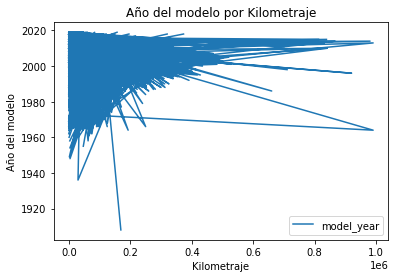

In [ ]:
vehicles_prices_dataframes.plot(x='odometer', y='model_year', title='Año del modelo por Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Año del modelo')
plt.show()

Como se puede apreciar hay varios valores claramente atipicos. Vamos a filtrar nuestro gráfico en base a los años que sabemos que tienen la mayoría de los valores ausentes, o sea entre el año 2000 y el año 2020, y además vamos a cortar los valores atípicos que corresponden más o menos a todos los que tienen más de 200000 en la columna 'odometer':

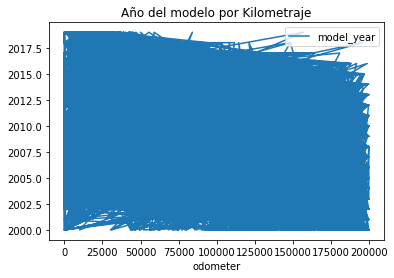

In [ ]:
vehicles_prices_dataframes.query('model_year >= 2000 and model_year <= 2020 and odometer <= 200000').plot(x='odometer', y='model_year', title='Año del modelo por Kilometraje')
plt.show()

Con esto, podemos comprobar que si sacamos una media de la columna 'odometer' entre los años 2000 y 2020, dejando de lado los valores extremos tendremos un valore promedio bastante realista para completar nuestros valores ausentes. Encontraremos este valor:

In [ ]:
print('La media de los valores en la columna "odometer" entre los años 2000 y 2020 quitando los valores extremos es:')
vehicles_prices_dataframes.query('model_year >= 2000 and model_year <= 2020 and odometer <= 200000')['odometer'].mean()

La media de los valores en la columna "odometer" entre los años 2000 y 2020 quitando los valores extremos es:


102373.60171451131

Una alternativa sería buscar la mediana de los  kilometrajes por modelo, tipo en base a los años pero como se aprecia en la tabla siguiente hay demasiados datos que quedan ausentes

In [ ]:
vehicles_prices_dataframes.pivot_table(index='condition', values='odometer', aggfunc='mean').sort_values(by='odometer')

,odometer
condition,
new,43476.056000
like_new,79426.738166
excellent,106687.682258
good,129919.930980
salvage,140919.989796
fair,183062.233577


Otra alternativa sería agrupar solo por modelo o typo para sacar la meadiana, pero creo que nuestra primera opción es la más acertada. Una última alternativa sería agrupar por años. Vemos como se ven nuestras medianas con esta manera:

In [ ]:
def vehicle_age_group(age):
    if 1900 <= age <= 1950:
        return '00-50'
    if 1951 <= age <= 1960:
        return '51-60'
    if 1961 <= age <= 1970:
        return '61-70'
    if 1971 <= age <= 1980:
        return '71-70' 
    if 1981 <= age <= 1990:
        return '81-90'
    if 1991 <= age <= 2000:
        return '91-2000'    
    if 2001 <= age <= 2005:
        return '2001-2005'
    if 2006 <= age <= 2010:
        return '2006-2010'
    if 2011 <= age <= 2015:
        return '2011-2015'
    if 2016 <= age <= 2020:
        return '2016-2020'

Nota: Debido a que habían muy pocas líneas entre 1900 y 1950 se hizo un grupo grande para esos años, con el fin de facilitar el relleno de valores ausentes.

In [ ]:
print('Comprobación de la fórmula:')
print(vehicle_age_group(1934))
print(vehicle_age_group(1992))
print(vehicle_age_group(2004))
print(vehicle_age_group(2018))

Comprobación de la fórmula:
00-50
91-2000
2001-2005
2016-2020


In [ ]:
vehicles_prices_dataframes['model_age_group'] = vehicles_prices_dataframes['model_year'].apply(vehicle_age_group)

print('Value count by model age groups for the DataFrame:')
print(vehicles_prices_dataframes['model_age_group'].value_counts())
print()
mean_per_model_age_group = vehicles_prices_dataframes.pivot_table(index='model_age_group', values='odometer', aggfunc='median')
print('Medianas por model_age_group:')
print(mean_per_model_age_group.sort_values(by='odometer', ascending=False))

Value count by model age groups for the DataFrame:
2011-2015    17163
2006-2010    12571
2016-2020     7946
2001-2005     7066
91-2000       2667
81-90          290
71-70          100
61-70           90
51-60            7
00-50            6
Name: model_age_group, dtype: int64

Medianas por model_age_group:
                 odometer
model_age_group          
91-2000          173850.0
2001-2005        159508.0
2006-2010        138990.5
81-90            103991.5
2011-2015        100233.5
71-70             69493.0
61-70             58067.0
2016-2020         37380.0
51-60             17282.5
00-50             17000.0


Vamos a ver los valores únicos de la nueva columna creada:

Como podemos ver, en nuestra primera estimación, teniamos una media entre los años 2000 y 2020 de 102.374, pero al separar por años del modelo, observamos que la media entre el 2001 y 2005 es de 159.638, en cambio en el 2016 al 2020 es de 45.102. En conclusión es mejor utilizar las medias por decenios.

Vamos a guardar las distriución de los datos en nuestra DataFrame con el fin de compararla una vez que completemos los datos ausentes:

In [ ]:
vehicles_prices_dataframes['model_year'].value_counts(normalize=True)

2013.0    0.074083
2012.0    0.072392
2014.0    0.071974
2011.0    0.070450
2015.0    0.069365
            ...   
1948.0    0.000021
1961.0    0.000021
1936.0    0.000021
1949.0    0.000021
1955.0    0.000021
Name: model_year, Length: 68, dtype: float64

In [ ]:
vehicles_prices_dataframes['model_age_group'].unique()

array(['2011-2015', None, '2001-2005', '2016-2020', '2006-2010', '61-70',
       '91-2000', '81-90', '71-70', '51-60', '00-50'], dtype=object)

Como 'model_year' tiene valores ausentes, esto generará un problema. Lo mejor será crear un DataFrame reducido en el que no tengo los valores ausentes de esa columna para rellenar los valores que se puedan, de la columna 'odometer'.

In [ ]:
model_year_no_naan = vehicles_prices_dataframes.dropna(subset=['model_year'])

In [ ]:
model_year_no_naan['model_age_group'].unique()

array(['2011-2015', '2001-2005', '2016-2020', '2006-2010', '61-70',
       '91-2000', '81-90', '71-70', '51-60', '00-50'], dtype=object)

Crearemos una función para reemplazar nuestros valores ausentes en la columna 'odometer' en base a nuestras medias obtenidas agroupando los 'model_year'.

In [ ]:
def replace_nan_odometer(row):
    model_age_group = row['model_age_group']
    odometer = row['odometer']
    if pd.isna(odometer):
        return mean_per_model_age_group['odometer'][model_age_group]
    else:
        return odometer

In [ ]:
model_year_no_naan['odometer'] = model_year_no_naan.apply(replace_nan_odometer, axis=1)

/tmp/ipykernel_385/3855167825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_year_no_naan['odometer'] = model_year_no_naan.apply(replace_nan_odometer, axis=1)


Obtengo una advertencia acerca de como hacer la nueva asignación, es por eso que comprobaremos que no tenemos valores ausentes en nuestra columna 'odometer':

In [ ]:
model_year_no_naan['odometer'].isna().sum()

0

Nuestra base de model year sin valores ausentes, fue corregida y la columna 'odometer' ya no tiene nan. Vamos a unirla a nuestra base de datos original en una nueva base, veremos cuantos valores ausentes nos quedan:

In [ ]:
vehicles_odometer_less_nan = vehicles_prices_dataframes.join(model_year_no_naan['odometer'], rsuffix='_fixed')
vehicles_odometer_less_nan.loc[vehicles_odometer_less_nan['odometer_fixed'].isna(), 'odometer_fixed'] = vehicles_odometer_less_nan.loc[vehicles_odometer_less_nan['odometer_fixed'].isna(), 'odometer']
vehicles_odometer_less_nan[vehicles_odometer_less_nan['odometer_fixed'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age_group,odometer_fixed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,True,2018-07-24,73,None,NaN
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,suv,silver,True,2018-05-13,57,None,NaN
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,True,2019-01-14,50,None,NaN
586,26000,NaN,toyota rav4,like_new,4.0,gas,NaN,automatic,suv,NaN,True,2018-08-09,29,None,NaN
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,True,2018-10-22,37,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,True,2018-05-10,35,None,NaN
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,True,2018-12-09,23,None,NaN
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,True,2018-10-16,75,None,NaN
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,True,2019-03-16,83,None,NaN


Solo nos quedan 549 líneas con valores ausentes en 'odometer', para estos valores utilizaremos la condición, ya que si el auto es nuevo debería tener menos millaje que si está muy viejo.

In [ ]:
mean_per_condition = vehicles_prices_dataframes.pivot_table(index='condition', values='odometer', aggfunc='median')

In [ ]:
def replace_nan_odometer2(row):
    condition = row['condition']
    odometer = row['odometer']
    if pd.isna(odometer):
        return mean_per_condition['odometer'][condition]
    else:
        return odometer

In [ ]:
vehicles_odometer_less_nan['odometer_fixed'] = vehicles_odometer_less_nan.apply(replace_nan_odometer2, axis=1)

In [ ]:
vehicles_prices_dataframes['odometer'] = vehicles_odometer_less_nan['odometer_fixed']

Comprobemos que nuestra columna no tenga valores ausentes ahora:

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51525 non-null  int64  
 1   model_year       47906 non-null  float64
 2   model            51525 non-null  object 
 3   condition        51525 non-null  object 
 4   cylinders        46265 non-null  float64
 5   fuel             51525 non-null  object 
 6   odometer         51525 non-null  float64
 7   transmission     51525 non-null  object 
 8   type             51525 non-null  object 
 9   paint_color      42258 non-null  object 
 10  is_4wd           51525 non-null  bool   
 11  date_posted      51525 non-null  object 
 12  days_listed      51525 non-null  int64  
 13  model_age_group  47906 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 5.2+ MB


In [ ]:
vehicles_prices_dataframes['model_year'].value_counts(normalize=True)

2013.0    0.074083
2012.0    0.072392
2014.0    0.071974
2011.0    0.070450
2015.0    0.069365
            ...   
1948.0    0.000021
1961.0    0.000021
1936.0    0.000021
1949.0    0.000021
1955.0    0.000021
Name: model_year, Length: 68, dtype: float64

Al revisar la distribución de 'model_year' notamos que no hay cambios visibles en los primeros 5 valores y los últimos 5 valores, con lo que podemos asumir que nuestro reemplazo de valores ausentes funciona correctamente.

### La columna 'model_year':<a id='columna_model_year'></a>

In [ ]:
model_year_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['model_year'].isna()]
print(model_year_filtered_nan)

       price  model_year                       model  condition  cylinders  \
1      25500         NaN                  ford f-150       good        6.0   
20      6990         NaN             chevrolet tahoe  excellent        8.0   
65     12800         NaN                  ford f-150  excellent        6.0   
69      7800         NaN                  ford f-150   like_new        8.0   
72      3650         NaN              subaru impreza  excellent        NaN   
...      ...         ...                         ...        ...        ...   
51464   8890         NaN               ford f-250 sd       good        8.0   
51465  34595         NaN                   gmc yukon  excellent        8.0   
51487   1495         NaN                  ford f-150       fair        6.0   
51488  21900         NaN  chevrolet silverado 3500hd  excellent        8.0   
51508   4950         NaN     chrysler town & country  excellent        6.0   

         fuel  odometer transmission      type paint_color  is_

Observando el listado de valores ausentes de la columna 'model_year', en primera instancia no se observa ningún patrón aparente. Para poder revisar si el modelo tiene alguna influencia revisaremos cuantos valores ausentes en el 'model_year' tenemos por modelo:

In [ ]:
print(nan_counting('model', 'price'))

model
ford f-150                           230
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
buick enclave                         14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: price, Length: 95, dtype: int64


Cuando revisamos dónde se encuentran los valores ausentes, encontramos que la mayoría se encuentra en los ford-150, chevrolet silverado 1500 y ram 1500. Estudiaremos la distribución de los datos para los modelos:

In [ ]:
vehicles_prices_dataframes['model'].value_counts(normalize=True)

ford f-150                           0.064551
chevrolet silverado 1500             0.042135
ram 1500                             0.033964
chevrolet silverado                  0.024668
jeep wrangler                        0.021718
                                       ...   
dodge dakota                         0.004697
kia sorento                          0.004580
acura tl                             0.004580
nissan murano                        0.004561
mercedes-benz benze sprinter 2500    0.000796
Name: model, Length: 95, dtype: float64

In [ ]:
vehicles_prices_dataframes_dropna['model'].value_counts(normalize=True)

ford f-150                  0.094331
chevrolet silverado 1500    0.064234
ram 1500                    0.047670
jeep wrangler               0.041072
chevrolet silverado         0.036561
                              ...   
chevrolet corvette          0.000135
chrysler town & country     0.000135
hyundai sonata              0.000135
chevrolet malibu            0.000135
nissan versa                0.000067
Name: model, Length: 84, dtype: float64

Con esto hemos demostrado que la mayoría de nuestros valores ausentes de 'model_year' se concentran en los 3 modelos más vendidos. Además, vemos que eliminar los valores ausentes sería un error ya que modifican la distribución varia de 3 puntos porcentuales para el caso de for f-150 (el modelo que más aparece) y en los modelos que menos hay también se ve que la distribución varia completamente.Tomaremos el modelo que más datos tiene como base para seguir el estudio, ya que los otros modelos deberían comportarse de la misma manera (cuando encontremos una pre-conclusion, podremos realizar pruebas con los otros modelos relevantes 'Chevrolet Silverado 1500' y 'ram 1500').

En nuestra primera hipotesis mencionamos que el modelo podría servirnos para encontrar los valores ausentes en el 'model_year', ahora comprobaremos esta hipotesis filtrando por el modelo 'ford- f-150', revisando patrones y contando los años para ese modelo:

In [ ]:
ford_f_150 = (vehicles_prices_dataframes.query('model == "ford f-150"'))
print(ford_f_150)
print()
print('Valores para los años del modelo del ford f-150:')
print(ford_f_150['model_year'].value_counts())

       price  model_year       model  condition  cylinders fuel  odometer  \
1      25500         NaN  ford f-150       good        6.0  gas   88705.0   
3       1500      2003.0  ford f-150       fair        8.0  gas  181613.0   
39      8000      2009.0  ford f-150       good        8.0  gas  234000.0   
50      6200      2006.0  ford f-150  excellent        6.0  gas   69698.0   
65     12800         NaN  ford f-150  excellent        6.0  gas  108500.0   
...      ...         ...         ...        ...        ...  ...       ...   
51442  28990      2018.0  ford f-150  excellent        NaN  gas   10152.0   
51457  21995      2015.0  ford f-150   like_new        8.0  gas   72982.5   
51487   1495         NaN  ford f-150       fair        6.0  gas   15804.0   
51497   2995      2001.0  ford f-150       good        8.0  gas  206257.0   
51505   2000      2000.0  ford f-150       good        6.0  gas  122000.0   

      transmission    type paint_color  is_4wd date_posted  days_listed  \


Al realizar un conteo de los valores del model year para el modelo f-150, nos encontramos con que los años varian desde 1954 hasta el año 2013. Este modelo ha sido un exito, pero no nos servirá el modelo para rellenar los valores ausentes. Otro punto importante es que encontramos que la bencina no varia de acuerdo al año con lo que podemos descartarla de nuestra hipotesis para rellenar los datos ausentes. Con la cilindrada, nos pasa algo similar, el valor 8.0 aparece para los año 2003, 2009 y 2013 por lo menos. Revisaremos el 'odometer' para ver su comportamiento de acuerdo al año del modelo.

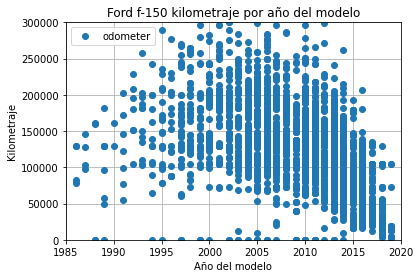

In [ ]:
ford_f_150.plot(x='model_year', y='odometer',style='o', xlim=(1985, 2020), ylim=(0, 300000), grid=True, title='Ford f-150 kilometraje por año del modelo')
plt.xlabel('Año del modelo')
plt.ylabel('Kilometraje')
plt.show()

En nuestro gráfico podemos ver que el kilometraje varía considerablemente para los Ford f-150 de cada año (muchos puntos el mismo año), pero además para la mayoría de los años los valores se encuentran entre los 100.000 a 250.000. Vamos a agrupar los valores de odometer en una nueva columna a ver si podemos esclarecer un poco más los datos. Primero estudiaremos esa columna:

In [ ]:
vehicles_prices_dataframes['odometer'].describe(percentiles = [.125, .25, .375, .5, .625, .75, .875])

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
12.5%     44786.000000
25%       75668.000000
37.5%    101291.000000
50%      110908.000000
62.5%    129000.000000
75%      147821.000000
87.5%    181000.000000
max      990000.000000
Name: odometer, dtype: float64

Como se ve en la columna hay una distribución bastante pareja, de 0 al 25% hay 70.000 y de 25% a 50% 113.000 casi el doble exacto. De 50% a 75% hay menos valores y luego hay un salto grande. Creo que podríamos agrupar de 70.000 en 70.000 para revisar los datos nuevamente. Para ello utilizaremos la siguiente función:

In [ ]:
def odometer_group(odometer):
    if odometer <= 38821:
        return '0 to 38821'
    if 38822 <= odometer <= 70000:
        return '38822 to 70000'
    if 70001 <= odometer <= 94000:
        return '70001 to 94000'
    if 94001 <= odometer <= 113000:
        return '94001 to 113000'
    if 113001 <= odometer <= 133000:
        return '113001 to 133000'
    if 133001 <= odometer <= 155000:
        return '133001 to 155000'
    if 155001 <= odometer <= 187000:
        return '155001 to 187000'
    if 187001 <= odometer <= 990000:
        return '187001 to 990000'

In [ ]:
print('Comprobación de la fórmula:')
print(odometer_group(500))
print(odometer_group(40000))
print(odometer_group(80500))
print(odometer_group(100000))
print(odometer_group(115000))
print(odometer_group(145000))
print(odometer_group(177000))
print(odometer_group(190000))

Comprobación de la fórmula:
0 to 38821
38822 to 70000
70001 to 94000
94001 to 113000
113001 to 133000
133001 to 155000
155001 to 187000
187001 to 990000


In [ ]:
vehicles_prices_dataframes['odometer_grouped'] = vehicles_prices_dataframes['odometer'].apply(odometer_group)

print('Value count by odometer groups for the DataFrame:')
print(vehicles_prices_dataframes['odometer_grouped'].value_counts())

Value count by odometer groups for the DataFrame:
94001 to 113000     9230
113001 to 133000    8535
70001 to 94000      6239
155001 to 187000    5685
133001 to 155000    5479
0 to 38821          5474
38822 to 70000      5463
187001 to 990000    5420
Name: odometer_grouped, dtype: int64


Logramos una distribución bastante pareja. Vamos a revisar ahora como afecta el kilometraje a la fecha del modelo de un vehiculo:

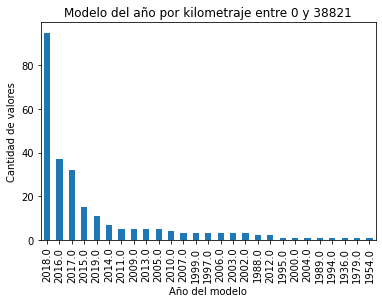

In [ ]:
ford_f_150 = (vehicles_prices_dataframes.query('model == "ford f-150"'))
ford_f_150.query('odometer_grouped == "0 to 38821"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 0 y 38821')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

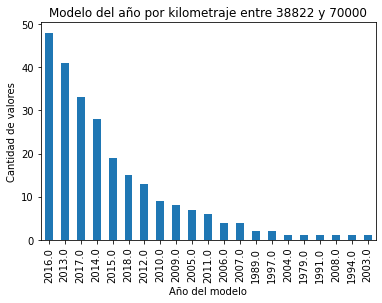

In [ ]:
ford_f_150.query('odometer_grouped == "38822 to 70000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 38822 y 70000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

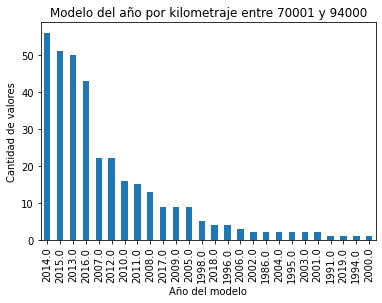

In [ ]:
ford_f_150.query('odometer_grouped == "70001 to 94000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 70001 y 94000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

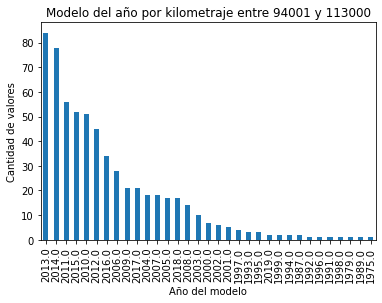

In [ ]:
ford_f_150.query('odometer_grouped == "94001 to 113000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 94001 y 113000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

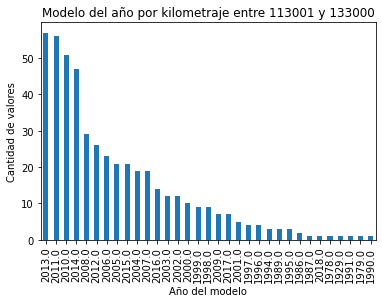

In [ ]:
ford_f_150.query('odometer_grouped == "113001 to 133000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 113001 y 133000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

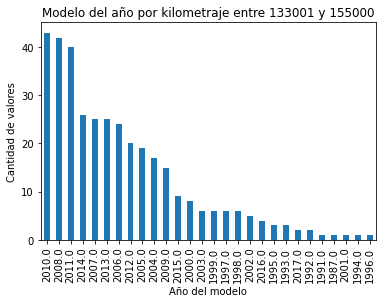

In [ ]:
ford_f_150.query('odometer_grouped == "133001 to 155000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 133001 y 155000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

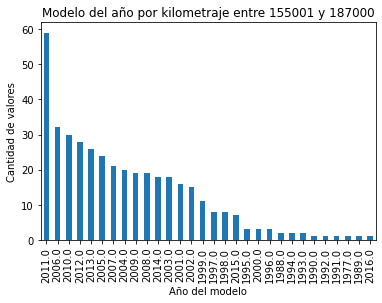

In [ ]:
ford_f_150.query('odometer_grouped == "155001 to 187000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 155001 y 187000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

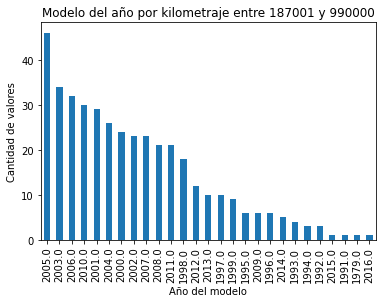

In [ ]:
ford_f_150.query('odometer_grouped == "187001 to 990000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 187001 y 990000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

Con esta categorización de la columna 'odometro' encontramos los siguientes datos:
- 0 to 38821 = 2018
- 38822 to 70000 = 2016
- 70001 to 94000 = 2014
- 94001 to 113000 = 2013
- 155001 to 187000 = 2011
- 187000 to 990000 = 2005

Sin embargo, para los siguientes valores los datos no son tan claros.
- 113001 to 133000
- 133001 to 155000

Vamos a ver que pasa si dividimos más los valores al medio:

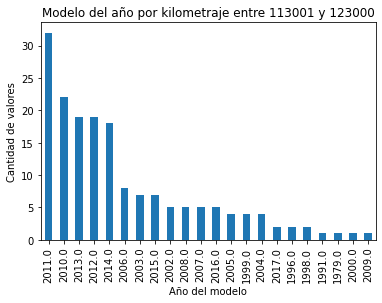

In [ ]:
ford_f_150.query('113001 <= odometer <= 123000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 113001 y 123000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

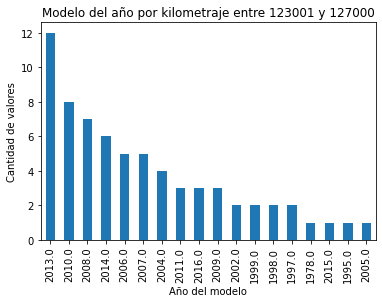

In [ ]:
ford_f_150.query('123001 <= odometer <= 127000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 123001 y 127000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

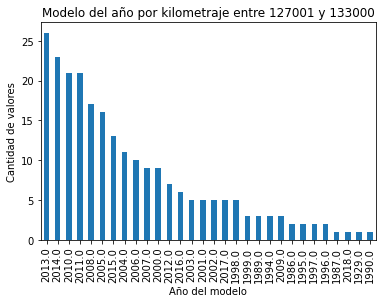

In [ ]:
ford_f_150.query('127001 <= odometer <= 133000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 127001 y 133000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

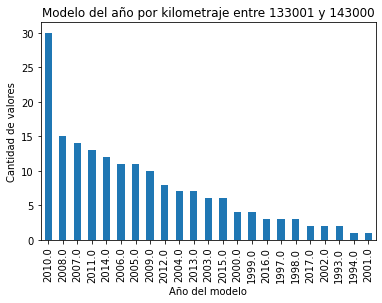

In [ ]:
ford_f_150.query('133001 <= odometer <= 143000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 133001 y 143000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

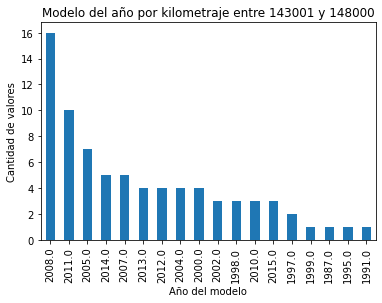

In [ ]:
ford_f_150.query('143001 <= odometer <= 148000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 143001 y 148000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

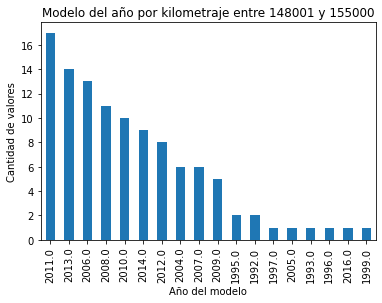

In [ ]:
ford_f_150.query('148001 <= odometer <= 155000')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 148001 y 155000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

Encontramos entonces con datos más acotados que hay años que sobresalen sobre los otros y que podemos utilizar como base para los segmentos:
- 113001 y 123000
- 123001 y 127000
- 127001 y 133000
- 133001 y 143000
- 143001 y 148000
- 148001 y 155000

Tenemos nuestros datos filtrados con valores más claros. Ahora verificaremos que estos sean los mismos para todos los modelos:

In [ ]:
chevrolet_silverado_1500 = (vehicles_prices_dataframes.query('model == "chevrolet silverado 1500"'))
ram_1500 = (vehicles_prices_dataframes.query('model == "ram 1500"'))

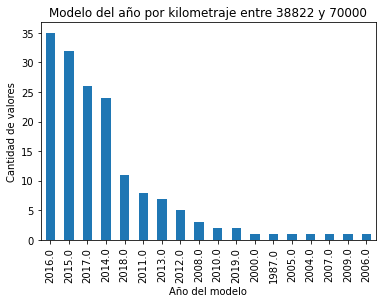

In [ ]:
chevrolet_silverado_1500.query('odometer_grouped == "38822 to 70000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 38822 y 70000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

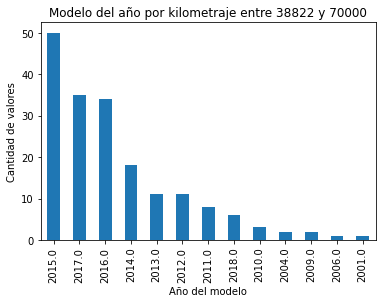

In [ ]:
ram_1500.query('odometer_grouped == "38822 to 70000"')['model_year'].value_counts().plot(kind='bar', title='Modelo del año por kilometraje entre 38822 y 70000')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de valores')
plt.show()

Si bien, comprobamos que la subdivisión de odometer_grouped funciona bien para distintos modelos. Como se puede apreciar en los dos últimos gráficos el año varía dependiendo del modelo. Realizamos pruebas en varios tramos con lo que es mejor, trabajar por modelo.

Vamos a mejorar nuestra subdivisión inicial con los datos corregidos:

In [ ]:
def odometer_group(odometer):
    if odometer <= 38821:
        return '0 to 38821'
    if 38822 <= odometer <= 70000:
        return '38822 to 70000'
    if 70001 <= odometer <= 94000:
        return '70001 to 94000'
    if 94001 <= odometer <= 113000:
        return '94001 to 113000'
    if 113001 <= odometer <= 123000:
        return '113001 to 123000'
    if 123001 <= odometer <= 127000:
        return '123001 to 127000'
    if 127001 <= odometer <= 133000:
        return '127001 to 133000'    
    if 133001 <= odometer <= 143000:
        return '133001 to 143000'    
    if 143001 <= odometer <= 148000:
        return '143001 y 148000'
    if 148001 <= odometer <= 155000:
        return '148001 y 155000'
    if 155001 <= odometer <= 187000:
        return '155001 to 187000'
    if 187001 <= odometer <= 990000:
        return '187001 to 990000'

In [ ]:
vehicles_prices_dataframes['odometer_grouped'] = vehicles_prices_dataframes['odometer'].apply(odometer_group)

print('Value count by odometer groups for the DataFrame:')
print(vehicles_prices_dataframes['odometer_grouped'].value_counts())

Value count by odometer groups for the DataFrame:
94001 to 113000     9230
70001 to 94000      6239
155001 to 187000    5685
0 to 38821          5474
38822 to 70000      5463
187001 to 990000    5420
127001 to 133000    4705
113001 to 123000    2794
133001 to 143000    2688
148001 y 155000     1669
143001 y 148000     1122
123001 to 127000    1036
Name: odometer_grouped, dtype: int64


Crearemos una fórmula para encontrar el año que más aparece dependiendo del modelo del vehiculo y el odometer agrupado:

In [ ]:
def found_max_model_year(odo, car_mod):
    answer = vehicles_prices_dataframes[(vehicles_prices_dataframes['odometer_grouped'] == odo) & (vehicles_prices_dataframes['model'] == car_mod)]
    return(answer['model_year'].value_counts().idxmax())

found_max_model_year("38822 to 70000", "ford f-150")

2016.0

Comprobación de que la función funciona:

In [ ]:
vehicles_prices_dataframes.query('odometer_grouped == "38822 to 70000" and model == "ford f-150"')['model_year'].value_counts().idxmax()

2016.0

Entonces, utilizaremos la siguiente formula para reemplazar los valores ausentes:

In [ ]:
def replace_nan_model_year(row):
    model_year = row['model_year']
    odometer_grouped = row['odometer_grouped']
    model = row['model']
    try:
        if pd.isna(model_year):
            return found_max_model_year(odometer_grouped, model)
        return model_year
    except:
        return float('nan')

Vamor a probar que la formula funcione bien, para ello utilizaremos la primera fila esperando como resultado el año 2014:

In [ ]:
vehicles_prices_dataframes.iloc[1]

price                        25500
model_year                     NaN
model                   ford f-150
condition                     good
cylinders                      6.0
fuel                           gas
odometer                   88705.0
transmission             automatic
type                        pickup
paint_color                  white
is_4wd                        True
date_posted             2018-10-19
days_listed                     50
model_age_group               None
odometer_grouped    70001 to 94000
Name: 1, dtype: object

In [ ]:
replace_nan_model_year(vehicles_prices_dataframes.iloc[1])

2014.0

Aplicaremos la formula a continuación:

In [ ]:
vehicles_prices_dataframes['model_year'] = vehicles_prices_dataframes.apply(replace_nan_model_year, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51523 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         46265 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       42258 non-null  object 
 10  is_4wd            51525 non-null  bool   
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51525 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [ ]:
model_year_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['model_year'].isna()]
print(model_year_filtered_nan)

       price  model_year                        model  condition  cylinders  \
6293    2395         NaN                 chrysler 200  excellent        4.0   
30111  12995         NaN  nissan frontier crew cab sv       good        6.0   

      fuel  odometer transmission   type paint_color  is_4wd date_posted  \
6293   gas  139000.0    automatic  sedan        grey    True  2018-10-22   
30111  gas  102988.0    automatic  truck       white    True  2018-11-29   

       days_listed model_age_group  odometer_grouped  
6293            10            None  133001 to 143000  
30111            7            None   94001 to 113000  


Como se puede apreciar nos quedaron solo dos vehiculos que corresponde al modelo Chrysler 200 y a nissan frontier crew cab sv. Esto sucedió porque, estos modelos tienen solo un vehículo a la venta con las especificaciones dadas. Como son solo dos vehículos vamos a eliminar estas líneas.

In [ ]:
vehicles_prices_dataframes = vehicles_prices_dataframes.dropna(subset=['model_year']).reset_index(drop=True)

In [ ]:
vehicles_prices_dataframes['model_year'].isna().sum()

0

In [ ]:
vehicles_prices_dataframes['model_year'] = vehicles_prices_dataframes['model_year'].astype(int)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         46263 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       42256 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


### La columna 'cylinders':<a id='columna_cylinders'></a>

In [ ]:
cylinders_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['cylinders'].isna()]
print(cylinders_filtered_nan)

       price  model_year              model  condition  cylinders fuel  \
9       9200        2008        honda pilot  excellent        NaN  gas   
36     10499        2013       chrysler 300       good        NaN  gas   
37      7500        2005      toyota tacoma       good        NaN  gas   
59      5200        2006  toyota highlander       good        NaN  gas   
63     30000        1966       ford mustang  excellent        NaN  gas   
...      ...         ...                ...        ...        ...  ...   
51427   3250        2004       toyota camry       good        NaN  gas   
51440  28990        2018         ford f-150  excellent        NaN  gas   
51458   5995        2007        ford fusion  excellent        NaN  gas   
51475   6499        2007           acura tl       good        NaN  gas   
51484   5895        2009   hyundai santa fe  excellent        NaN  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
9      147191.0    automatic      

In [ ]:
vehicles_prices_dataframes.query('model == "ford f-150"')['cylinders'].value_counts(normalize=True)

8.0     0.637832
6.0     0.349714
10.0    0.007068
4.0     0.003702
5.0     0.001010
3.0     0.000673
Name: cylinders, dtype: float64

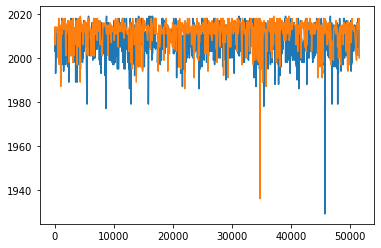

In [ ]:
vehicles_prices_dataframes.query('model == "ford f-150" and cylinders == 8')['model_year'].plot()
vehicles_prices_dataframes.query('model == "ford f-150" and cylinders == 6')['model_year'].plot()
plt.show()

In [ ]:
len(vehicles_prices_dataframes.query('model == "ford f-150"')['cylinders'])

3326

In [ ]:
print('El porcentaje de valores ausentes en la columna cylinders para el modelo ford f-150 es:', vehicles_prices_dataframes.query('model == "ford f-150"')['cylinders'].isna().sum() * 100 / len(vehicles_prices_dataframes.query('model == "ford f-150"')['cylinders']), '%.')

El porcentaje de valores ausentes en la columna cylinders para el modelo ford f-150 es: 10.673481659651232 %.


El porcentaje de valores ausentes es demasiado grande para ingresarlo al valor que más aparece para este modelo. La variación al hacerlo de esta manera es de 10%. Tenemos que buscar alguna forma de acotar esta variación para mantener la integridad de nuestro DataFrame. Verificaremos si el tipo de vehiculo influye en la cilindrada.

In [ ]:
vehicles_prices_dataframes['type'].value_counts(normalize=True)

suv            0.240766
truck          0.239738
sedan          0.235875
pickup         0.135629
coupe          0.044698
wagon          0.029909
mini_van       0.022534
hatchback      0.020321
van            0.012286
convertible    0.008656
other          0.004969
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('type == "suv"')['cylinders'].value_counts(normalize=True)

6.0     0.510688
4.0     0.270101
8.0     0.212235
10.0    0.005724
5.0     0.000805
3.0     0.000447
Name: cylinders, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('type == "truck"')['cylinders'].value_counts(normalize=True)

8.0     0.721836
6.0     0.222242
10.0    0.026878
4.0     0.024353
5.0     0.004329
12.0    0.000180
3.0     0.000180
Name: cylinders, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('type == "sedan"')['cylinders'].value_counts(normalize=True)

4.0     0.734698
6.0     0.221162
8.0     0.021290
5.0     0.015417
10.0    0.005598
3.0     0.001835
Name: cylinders, dtype: float64

Como se puede apreciar, el tipo de vehiculo influye directamente en la cilindrada del mismo.

In [ ]:
vehicles_prices_dataframes.query('type == "suv" and model == "ford f-150"')['cylinders'].value_counts(normalize=True)

8.0    0.8
6.0    0.2
Name: cylinders, dtype: float64

Finalmente encontramos que efectivamente el tipo de vehiculo y el modelo tienen una cilindrada definida, hay excepciones pero son menores. Utilizaremos estas dos columnas para rellenar los valores ausentes de la cilindrada.

In [ ]:
def found_max_cylinder(tipo, car_mod):
    answer = vehicles_prices_dataframes[(vehicles_prices_dataframes['type'] == tipo) & (vehicles_prices_dataframes['model'] == car_mod)]
    return(answer['cylinders'].value_counts().idxmax())

found_max_cylinder("suv", "honda pilot")

6.0

Reemplazaremos a los valores ausentes utilizando la misma fórmula que en el punto 13.3:

In [ ]:
def replace_nan_cylinders(row):
    cylinders = row['cylinders']
    type_1 = row['type']
    model = row['model']
    try:
        if pd.isna(cylinders):
            return found_max_cylinder(type_1, model)
        return cylinders
    except:
        return float('nan')

Vamor a probar que la formula funcione bien, para ello utilizaremos la novena fila esperando como resultado una cilindrada de 6.0:

In [ ]:
vehicles_prices_dataframes.iloc[9]

price                          9200
model_year                     2008
model                   honda pilot
condition                 excellent
cylinders                       NaN
fuel                            gas
odometer                   147191.0
transmission              automatic
type                            suv
paint_color                    blue
is_4wd                         True
date_posted              2019-02-15
days_listed                      17
model_age_group           2006-2010
odometer_grouped    143001 y 148000
Name: 9, dtype: object

In [ ]:
replace_nan_cylinders(vehicles_prices_dataframes.iloc[9])

6.0

Aplicaremos nuestra formula:

In [ ]:
vehicles_prices_dataframes['cylinders'] = vehicles_prices_dataframes.apply(replace_nan_cylinders, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         51508 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       42256 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


In [ ]:
cylinders_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['cylinders'].isna()]
print(cylinders_filtered_nan)

       price  model_year                model  condition  cylinders    fuel  \
6891   21000        2015  jeep grand cherokee   like_new        NaN     gas   
12900   6999        2011         jeep liberty  excellent        NaN     gas   
14353   3000        2005        toyota sienna       fair        NaN     gas   
15984   1800        2000       toyota corolla       fair        NaN     gas   
16603   7800        2001        ford f-350 sd       good        NaN  diesel   
29973   8400        2008    toyota highlander  excellent        NaN     gas   
33806   5500        2002           ford f-150   like_new        NaN     gas   
34605   7000        2012        ford focus se   like_new        NaN     gas   
36104  14995        2000   chevrolet corvette       good        NaN     gas   
36401   1200        2005          ford taurus       good        NaN     gas   
40605  10000        1991           ford f-250  excellent        NaN     gas   
41822  20000        2008           ford f-250  excel

In [ ]:
vehicles_prices_dataframes.query('type == "hatchback" and model == "jeep grand cherokee"')['cylinders'].value_counts(normalize=True)

Series([], Name: cylinders, dtype: float64)

In [ ]:
vehicles_prices_dataframes.query('type == "hatchback"')['cylinders'].value_counts(normalize=True)

4.0     0.951243
8.0     0.021989
6.0     0.020076
10.0    0.004780
3.0     0.001912
Name: cylinders, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('model == "jeep grand cherokee"')['cylinders'].value_counts(normalize=True)

6.0     0.719255
8.0     0.265839
10.0    0.012422
4.0     0.002484
Name: cylinders, dtype: float64

Como se puede apreciar, quedaron 15 valores únicos. Revisé rápidamente como completar estos 15 valores. Por tipo parece ser la opción más segura. Modificaremos nuestra función un poco para completar estos valores:

In [ ]:
def found_max_cylinder_by_type(tipo):
    answer = vehicles_prices_dataframes[vehicles_prices_dataframes['type'] == tipo]
    return(answer['cylinders'].value_counts().idxmax())

found_max_cylinder_by_type("hatchback")

4.0

In [ ]:
def replace_nan_cylinders_exceptions(row):
    cylinders = row['cylinders']
    type_1 = row['type']
    try:
        if pd.isna(cylinders):
            return found_max_cylinder_by_type(type_1)
        return cylinders
    except:
        return float('nan')

In [ ]:
vehicles_prices_dataframes['cylinders'] = vehicles_prices_dataframes.apply(replace_nan_cylinders_exceptions, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         51523 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       42256 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


### La columna 'paint_color':<a id='columna_paint_color'></a>

In [ ]:
paint_color_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['paint_color'].isna()]
print(paint_color_filtered_nan)

       price  model_year                        model  condition  cylinders  \
0       9400        2011                       bmw x5       good        6.0   
3       1500        2003                   ford f-150       fair        8.0   
8      11500        2012                  kia sorento  excellent        4.0   
12     18990        2012                     ram 1500  excellent        8.0   
21      5250        2007                  toyota rav4       good        6.0   
...      ...         ...                          ...        ...        ...   
51500   7995        2011            chevrolet equinox   like_new        4.0   
51501   6595        2011             chevrolet malibu  excellent        4.0   
51504  28900        2017  ford f150 supercrew cab xlt       good        6.0   
51517  11750        2015                 honda accord  excellent        4.0   
51522   6300        2014                nissan altima       good        4.0   

      fuel  odometer transmission    type paint_col

Primero analizaremos la distribución de los colores:

In [ ]:
vehicles_prices_dataframes['paint_color'].value_counts(normalize=True)

white     0.237315
black     0.182033
silver    0.147766
grey      0.119178
blue      0.105902
red       0.104624
green     0.033037
brown     0.028943
custom    0.027286
yellow    0.006035
orange    0.005467
purple    0.002414
Name: paint_color, dtype: float64

No hay novedades acá, el color balnco es el más polular, seguido del negro, los grises, luego el azul y finalmente los rojos. Los otros colores son menos populares. Revisaremos si dependiendo del modelo y del año tenemos algún color que esté más de moda que otro:

In [ ]:
vehicles_prices_dataframes.query('model == "ford f-150" and model_year == 2003')['paint_color'].value_counts(normalize=True)

white     0.338028
red       0.197183
grey      0.126761
black     0.126761
green     0.112676
silver    0.042254
brown     0.028169
orange    0.014085
custom    0.014085
Name: paint_color, dtype: float64

Se ve una preferencia por el blanco, pero el rojo tiene 19%, esto no es menor. Necesitamos algo más concluyente. Podría ser que el modelo y el typo de automovil nos dé una diferencia más relevante. Por ejemplo, no se ven muchos truck naranjos:

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "suv"')['paint_color'].value_counts(normalize=True)

black     0.292308
grey      0.205128
white     0.184615
silver    0.164103
blue      0.082051
brown     0.030769
green     0.025641
red       0.005128
custom    0.005128
purple    0.005128
Name: paint_color, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "truck"')['paint_color'].value_counts(normalize=True)

white    0.333333
grey     0.333333
black    0.333333
Name: paint_color, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "sedan"')['paint_color'].value_counts(normalize=True)

black    0.666667
white    0.333333
Name: paint_color, dtype: float64

Notamos una mejor distribución pero aún no es perfecta. Revisaremos de acuerdo al tipo y el año:

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "truck" and model_year == 2011')['paint_color'].value_counts(normalize=True)

black    1.0
Name: paint_color, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "suv" and model_year == 2011')['paint_color'].value_counts(normalize=True)

grey      0.30
black     0.25
silver    0.15
blue      0.10
white     0.10
brown     0.05
red       0.05
Name: paint_color, dtype: float64

In [ ]:
vehicles_prices_dataframes.query('model == "bmw x5" and type == "sedan" and model_year == 2011')['paint_color'].value_counts(normalize=True)

Series([], Name: paint_color, dtype: float64)

Vamos a probar reemplazar los colores con estas 3 columnas. Si bien para ese modelo no se encontró color para el tipo sedan, podría ser que esto no sea necesario y la distribución es mucho más clara con las tres columnas.

In [ ]:
def found_max_paint_color(year, tipo, car_mod):
    answer = vehicles_prices_dataframes[(vehicles_prices_dataframes['type'] == tipo) & (vehicles_prices_dataframes['model'] == car_mod) & (vehicles_prices_dataframes['model_year'] == year)]
    return(answer['paint_color'].value_counts().idxmax())

found_max_paint_color(2011, "suv", "bmw x5")

'grey'

Reemplazaremos a los valores ausentes utilizando la misma fórmula que en el punto 13.3:

In [ ]:
def replace_nan_colours(row):
    color = row['paint_color']
    type_1 = row['type']
    model = row['model']
    year = row['model_year']
    try:
        if pd.isna(color):
            return found_max_paint_color(year, type_1, model)
        return color
    except:
        return float('nan')

Vamor a probar que la formula funcione bien, para ello utilizaremos la novena fila esperando como resultado una cilindrada de 6.0:

In [ ]:
vehicles_prices_dataframes.iloc[0]

price                          9400
model_year                     2011
model                        bmw x5
condition                      good
cylinders                       6.0
fuel                            gas
odometer                   145000.0
transmission              automatic
type                            suv
paint_color                     NaN
is_4wd                         True
date_posted              2018-06-23
days_listed                      19
model_age_group           2011-2015
odometer_grouped    143001 y 148000
Name: 0, dtype: object

In [ ]:
replace_nan_colours(vehicles_prices_dataframes.iloc[0])

'grey'

Aplicaremos nuestra formula:

In [ ]:
vehicles_prices_dataframes['paint_color'] = vehicles_prices_dataframes.apply(replace_nan_colours, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         51523 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       51313 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


In [ ]:
paint_filtered_nan = vehicles_prices_dataframes[vehicles_prices_dataframes['paint_color'].isna()]
print(paint_filtered_nan)

       price  model_year                       model  condition  cylinders  \
512    16995        2015               jeep wrangler   like_new        6.0   
646    14500        2018           volkswagen passat  excellent        4.0   
660    14800        2009               jeep wrangler  excellent        4.0   
974     7700        2008                      bmw x5  excellent        6.0   
1442   34995        2013                   ford f350   like_new        8.0   
...      ...         ...                         ...        ...        ...   
50269  14500        1995  chevrolet silverado 3500hd       good        8.0   
50826   6000        2001                      bmw x5  excellent        6.0   
50941   4300        2008                toyota prius       good        4.0   
51383   3495        2005                jeep liberty       good        6.0   
51415   7495        2011                   ford edge       good        6.0   

         fuel  odometer transmission       type paint_color  is

Nos quedan solo 210 valores ausentes, que limpiaremos por tipo y modelo, y los que queden solo por tipo. De esta manera, nos aseguraremos de que los datos sean lo más cercanos a la realidad posible.

In [ ]:
def found_max_paint_color_by_type_model(tipo, car_mod):
    answer = vehicles_prices_dataframes[(vehicles_prices_dataframes['type'] == tipo) & (vehicles_prices_dataframes['model'] == car_mod)]
    return(answer['paint_color'].value_counts().idxmax())

found_max_paint_color_by_type_model("suv", "bmw x5")

'black'

In [ ]:
def found_max_paint_color_by_type_only(tipo):
    answer = vehicles_prices_dataframes[vehicles_prices_dataframes['type'] == tipo]
    return(answer['paint_color'].value_counts().idxmax())

found_max_paint_color_by_type_only("suv")

'black'

Si bien podriamos hacer una formula para reemplazar todos los valores ausentes. Me interesa saber cuantos se pueden completar con 'found_max_paint_color_by_type_model', y luego si es necesario aplicar la última formula.

In [ ]:
def replace_nan_paint_exceptions_1(row):
    paint = row['paint_color']
    type_1 = row['type']
    model = row['model']
    try:
        if pd.isna(paint):
            return found_max_paint_color_by_type_model(type_1, model)
        return paint
    except:
        return float('nan')

In [ ]:
vehicles_prices_dataframes['paint_color'] = vehicles_prices_dataframes.apply(replace_nan_paint_exceptions_1, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         51523 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       51505 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


Como se puede apreciar solo 18 líneas se rellenaran con nuestro método menos certero, esto es solo un 0.04% de los datos!

In [ ]:
def replace_nan_paint_exceptions_2(row):
    paint = row['paint_color']
    type_1 = row['type']
    try:
        if pd.isna(paint):
            return found_max_paint_color_by_type_only(type_1)
        return paint
    except:
        return float('nan')

In [ ]:
vehicles_prices_dataframes['paint_color'] = vehicles_prices_dataframes.apply(replace_nan_paint_exceptions_2, axis=1)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51523 non-null  int64  
 1   model_year        51523 non-null  int64  
 2   model             51523 non-null  object 
 3   condition         51523 non-null  object 
 4   cylinders         51523 non-null  float64
 5   fuel              51523 non-null  object 
 6   odometer          51523 non-null  float64
 7   transmission      51523 non-null  object 
 8   type              51523 non-null  object 
 9   paint_color       51523 non-null  object 
 10  is_4wd            51523 non-null  bool   
 11  date_posted       51523 non-null  object 
 12  days_listed       51523 non-null  int64  
 13  model_age_group   47906 non-null  object 
 14  odometer_grouped  51523 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.6+ MB


## Corregir los tipos de datos<a id='data_correction'></a>

Vamos a corregir las siguientes columnas:
- cylinders pasará de float a int64
- odometer pasará de float a int64
- date_posted pasará de object a DateTime

Vamos a corregir primero cylinders y odometer ya que son una línea de código.
Importante, tanto 'model_year' como 'days_listed' no es necesario pasarlos a DateTime, como son valores enteros los podemos sumar o restar cuando lo necesitemos.

In [ ]:
vehicles_prices_dataframes['cylinders'] = vehicles_prices_dataframes['cylinders'].astype(int)

In [ ]:
vehicles_prices_dataframes['odometer'] = vehicles_prices_dataframes['odometer'].astype(int)

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             51523 non-null  int64 
 1   model_year        51523 non-null  int64 
 2   model             51523 non-null  object
 3   condition         51523 non-null  object
 4   cylinders         51523 non-null  int64 
 5   fuel              51523 non-null  object
 6   odometer          51523 non-null  int64 
 7   transmission      51523 non-null  object
 8   type              51523 non-null  object
 9   paint_color       51523 non-null  object
 10  is_4wd            51523 non-null  bool  
 11  date_posted       51523 non-null  object
 12  days_listed       51523 non-null  int64 
 13  model_age_group   47906 non-null  object
 14  odometer_grouped  51523 non-null  object
dtypes: bool(1), int64(5), object(9)
memory usage: 5.6+ MB


In [ ]:
vehicles_prices_dataframes['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [ ]:
vehicles_prices_dataframes['date_posted'] = pd.to_datetime(vehicles_prices_dataframes['date_posted'], format='%Y-%m-%d')

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51523 non-null  int64         
 1   model_year        51523 non-null  int64         
 2   model             51523 non-null  object        
 3   condition         51523 non-null  object        
 4   cylinders         51523 non-null  int64         
 5   fuel              51523 non-null  object        
 6   odometer          51523 non-null  int64         
 7   transmission      51523 non-null  object        
 8   type              51523 non-null  object        
 9   paint_color       51523 non-null  object        
 10  is_4wd            51523 non-null  bool          
 11  date_posted       51523 non-null  datetime64[ns]
 12  days_listed       51523 non-null  int64         
 13  model_age_group   47906 non-null  object        
 14  odometer_grouped  5152

Logramos pasar nuestra columna 'date_posted' correctamente a DateTime64. Ahora demostraremos que podemos realizar cálculos sin problemas con las columnas 'model_year' y 'days_listed'.

In [ ]:
vehicles_prices_dataframes['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [ ]:
print(vehicles_prices_dataframes['date_posted'].iloc[0] - pd.Timedelta(days=vehicles_prices_dataframes['model_year'].iloc[0]))

2012-12-20 00:00:00


In [ ]:
print(vehicles_prices_dataframes['date_posted'].iloc[0] + pd.Timedelta(days=vehicles_prices_dataframes['days_listed'].iloc[0]))

2018-07-12 00:00:00


Como se puede observar hemos sumado y restado sin problemas tanto los años como días. Vamos a enriquecer nuestros datos ahora.

## Enriquecer datos<a id='rich_data'></a>

De la columna 'date_posted' podemos sacar los días, meses, años e incluso horas en que se ingresó el anuncio, el tiempo, para este DataFrame nos saldrá en 0, por lo que no crearemos esa columna, solo la vamos a mostrar a modo de evidencia.

In [ ]:
vehicles_prices_dataframes['ads_weekday'] = vehicles_prices_dataframes['date_posted'].dt.weekday
vehicles_prices_dataframes['ads_weekday'].head()

0    5
1    4
2    3
3    4
4    1
Name: ads_weekday, dtype: int64

In [ ]:
vehicles_prices_dataframes['ads_month'] = vehicles_prices_dataframes['date_posted'].dt.month
vehicles_prices_dataframes['ads_month'].head()

0     6
1    10
2     2
3     3
4     4
Name: ads_month, dtype: int64

In [ ]:
vehicles_prices_dataframes['ads_year'] = vehicles_prices_dataframes['date_posted'].dt.year
vehicles_prices_dataframes['ads_year'].head()

0    2018
1    2018
2    2019
3    2019
4    2019
Name: ads_year, dtype: int64

In [ ]:
print('Para obtener el tiempo (en formato HH:MM:SS) podriamos utilizar la siguiente formula:')
print(vehicles_prices_dataframes['date_posted'].dt.time.head())
print()
print('Para obtener solo las horas en que el anuncio se creó, en cambio utilizariamos la siguiente formula:')
print(vehicles_prices_dataframes['date_posted'].dt.hour.head())

Para obtener el tiempo (en formato HH:MM:SS) podriamos utilizar la siguiente formula:
0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: date_posted, dtype: object

Para obtener solo las horas en que el anuncio se creó, en cambio utilizariamos la siguiente formula:
0    0
1    0
2    0
3    0
4    0
Name: date_posted, dtype: int64


Un dato que si podemos obtener es cuantos años tenía el vehiculo al momento en que se ingresó el anuncio. Esto lo lograremos restando el año del modelo al año en que el anuncio fue ingresado:

In [ ]:
vehicles_prices_dataframes['car_years'] = vehicles_prices_dataframes['ads_year'] - vehicles_prices_dataframes['model_year']
vehicles_prices_dataframes['car_years'].head()

0     7
1     4
2     6
3    16
4     2
Name: car_years, dtype: int64

In [ ]:
vehicles_prices_dataframes[vehicles_prices_dataframes['car_years'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age_group,odometer_grouped,ads_weekday,ads_month,ads_year,car_years
19,13990,2018,hyundai elantra,excellent,4,gas,31932,automatic,sedan,red,True,2018-08-25,27,2016-2020,0 to 38821,5,8,2018,0
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493,other,pickup,black,True,2018-10-13,36,2016-2020,0 to 38821,5,10,2018,0
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899,other,pickup,silver,True,2019-02-28,30,2016-2020,0 to 38821,3,2,2019,0
99,39950,2018,chevrolet silverado,excellent,8,gas,18500,automatic,truck,white,True,2018-08-05,16,2016-2020,0 to 38821,6,8,2018,0
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168,other,pickup,white,True,2019-03-29,70,2016-2020,0 to 38821,4,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51440,28990,2018,ford f-150,excellent,8,gas,10152,automatic,truck,white,True,2018-06-13,47,2016-2020,0 to 38821,2,6,2018,0
51444,15999,2018,chevrolet malibu,excellent,4,gas,50502,automatic,sedan,black,True,2018-07-28,8,2016-2020,38822 to 70000,5,7,2018,0
51445,33990,2019,ram 1500,excellent,8,gas,9000,automatic,truck,white,True,2019-01-25,36,2016-2020,0 to 38821,4,1,2019,0
51485,1495,2018,ford f-150,fair,6,gas,15804,manual,truck,white,True,2018-09-18,56,None,0 to 38821,1,9,2018,0


Importante a tener en consideración, tenemos 2300 valores dónde el vehiculo tiene 0 años. Esto nos causará un problema al querer obtener el millaje promedio por año. Para los valores con 0 años entonces haremos la divición por el número de meses y multiplicaremos por doce para obtener el promedio.

In [ ]:
vehicles_prices_dataframes['odometer']/vehicles_prices_dataframes['ads_month'] * 12

0        290000.000000
1        106446.000000
2        660000.000000
3        726452.000000
4        242709.000000
             ...      
51518    105763.200000
51519    198000.000000
51520    139636.363636
51521    239268.000000
51522    258000.000000
Length: 51523, dtype: float64

In [ ]:
vehicles_prices_dataframes['miles_per_year'] = ""

def miles_average(row):
    car_years = row['car_years']
    miles_per_year = row['miles_per_year']
    odometer = row['odometer']
    ads_month = row['ads_month']
    try:
        if car_years > 0:
            return odometer/car_years
        return (odometer/ads_month) * 12
    except:
        return float('nan')

In [ ]:
print(vehicles_prices_dataframes.iloc[0])
print()
print('Para la línea 0, deberiamos obtener 20714, que es 145000 dividido por los años del auto 7:')
print(miles_average(vehicles_prices_dataframes.iloc[0]))
print()
print(vehicles_prices_dataframes.iloc[19])
print()
print('Para la línea 19, deberiamos obtener 47898, que es 31932 dividido por los meses del auto 8 multiplicado por 12, ya que este vehiculo tiene 0 años:')
print(miles_average(vehicles_prices_dataframes.iloc[19]))

price                              9400
model_year                         2011
model                            bmw x5
condition                          good
cylinders                             6
fuel                                gas
odometer                         145000
transmission                  automatic
type                                suv
paint_color                        grey
is_4wd                             True
date_posted         2018-06-23 00:00:00
days_listed                          19
model_age_group               2011-2015
odometer_grouped        143001 y 148000
ads_weekday                           5
ads_month                             6
ads_year                           2018
car_years                             7
miles_per_year                         
Name: 0, dtype: object

Para la línea 0, deberiamos obtener 20714, que es 145000 dividido por los años del auto 7:
20714.285714285714

price                             13990
model_year               

In [ ]:
vehicles_prices_dataframes['miles_per_year'] = vehicles_prices_dataframes.apply(miles_average, axis=1)

In [ ]:
vehicles_prices_dataframes['miles_per_year'].isna().sum()

0

In [ ]:
vehicles_prices_dataframes.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age_group,odometer_grouped,ads_weekday,ads_month,ads_year,car_years,miles_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,grey,True,2018-06-23,19,2011-2015,143001 y 148000,5,6,2018,7,20714.285714
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,None,70001 to 94000,4,10,2018,4,22176.250000
2,5500,2013,hyundai sonata,like_new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,2011-2015,94001 to 113000,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,red,True,2019-03-22,9,2001-2005,155001 to 187000,4,3,2019,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2016-2020,70001 to 94000,1,4,2019,2,40451.500000


In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51523 non-null  int64         
 1   model_year        51523 non-null  int64         
 2   model             51523 non-null  object        
 3   condition         51523 non-null  object        
 4   cylinders         51523 non-null  int64         
 5   fuel              51523 non-null  object        
 6   odometer          51523 non-null  int64         
 7   transmission      51523 non-null  object        
 8   type              51523 non-null  object        
 9   paint_color       51523 non-null  object        
 10  is_4wd            51523 non-null  bool          
 11  date_posted       51523 non-null  datetime64[ns]
 12  days_listed       51523 non-null  int64         
 13  model_age_group   47906 non-null  object        
 14  odometer_grouped  5152

Con el fin de facilitar las cosas más adelante vamos a crear algunos diccionarios:

In [ ]:
vehicles_prices_dataframes['condition'].value_counts()

excellent    24772
good         20144
like_new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [ ]:
print('Diccionario para condition:')
condition_dict = {
    'salvage' : 0,
    'fair' : 1,
    'good' : 2,
    'excellent' : 3,
    'like_new' : 4,
    'new' : 5
}
print(condition_dict)
print()
print('Diccionario para weekday:')
weekday_dict = {
    0 : 'Lunes',
    1 : 'Martes',
    2 : 'Miercoles',
    3 : 'Jueves',
    4 : 'Viernes',
    5 : 'Sábado',
    6 : 'Domingo'
}
print(weekday_dict)
print()
print('Diccionario para months:')
months_dict = {
    1 : 'Enero',
    2 : 'Febrero',
    3 : 'Marzo',
    4 : 'Abril',
    5 : 'Mayo',
    6 : 'Junio',
    7 : 'Julio',
    8 : 'Agosto',
    9 : 'Septiembre',
    10 : 'Octubre',
    11 : 'Noviembre',
    12 : 'Diciembre'
}
print(months_dict)
print()

Diccionario para condition:
{'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like_new': 4, 'new': 5}

Diccionario para weekday:
{0: 'Lunes', 1: 'Martes', 2: 'Miercoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}

Diccionario para months:
{1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}



Finalmente, vamos a crear una columna para la marca del vehiculo. Esto nos facilitará las cosas en el futuro, ya que recordemos que tenemos muchos modelos presentes.

In [ ]:
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['model']

In [ ]:
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace('acura tl', 'Acura')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace('bmw x5', 'BMW')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace('buick enclave', 'Buick')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace('cadillac escalade', 'Cadillac')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze','chevrolet equinox', 'chevrolet impala', 'chevrolet malibu','chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse'], 'Chevrolet')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['chrysler 200', 'chrysler 300', 'chrysler town & country'], 'Chrysler')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['dodge charger', 'dodge dakota', 'dodge grand caravan'], 'Dodge')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-350 sd', 'ford f150 supercrew cab xlt', 'ford f350','ford focus', 'ford focus se', 'ford fusion', 'ford fusion se','ford mustang', 'ford mustang gt coupe 2d', 'ford ranger','ford taurus'], 'Ford')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['gmc acadia', 'gmc sierra', 'gmc sierra 1500','gmc sierra 2500hd', 'gmc yukon'], 'gmc')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['honda accord', 'honda civic','honda civic lx', 'honda cr-v', 'honda odyssey', 'honda pilot'], 'Honda')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['hyundai elantra', 'hyundai santa fe', 'hyundai sonata'], 'Hyundai')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['jeep cherokee', 'jeep grand cherokee', 'jeep grand cherokee laredo', 'jeep liberty', 'jeep wrangler', 'jeep wrangler unlimited'], 'Jeep')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['kia sorento', 'kia soul'], 'Kia')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace('mercedes-benz benze sprinter 2500', 'Mercedes-Benz')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['nissan altima','nissan frontier', 'nissan frontier crew cab sv', 'nissan maxima', 'nissan murano', 'nissan rogue', 'nissan sentra', 'nissan versa'], 'Nissan')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['ram 1500', 'ram 2500', 'ram 3500'], 'Ram')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['subaru forester', 'subaru impreza', 'subaru outback'], 'Subaru')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['toyota 4runner','toyota camry', 'toyota camry le', 'toyota corolla','toyota highlander', 'toyota prius', 'toyota rav4', 'toyota sienna', 'toyota tacoma', 'toyota tundra'], 'Toyota')
vehicles_prices_dataframes['brand'] = vehicles_prices_dataframes['brand'].replace(['volkswagen jetta', 'volkswagen passat'], 'Vokswagen')

In [ ]:
vehicles_prices_dataframes['brand'].sort_values().unique()


array(['Acura', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia',
       'Mercedes-Benz', 'Nissan', 'Ram', 'Subaru', 'Toyota', 'Vokswagen',
       'gmc'], dtype=object)

Vamos a cambiar los nombres de 'ads_weekday' y 'ads_month' por 'ads_weekday_id' y 'ads_month_id' respectivamente, ya que las columnas tiene los códigos.

In [ ]:
vehicles_prices_dataframes = vehicles_prices_dataframes.rename(columns={"ads_weekday": "ads_weekday_id", "ads_month": "ads_month_id"}, errors='raise')

Ahora, vamos a crear nuestras nuevas columnas con códigos o glosa dependiendo del caso:

In [ ]:
vehicles_prices_dataframes['condition_id'] = vehicles_prices_dataframes['condition'].replace(condition_dict)
vehicles_prices_dataframes['ads_weekday'] = vehicles_prices_dataframes['ads_weekday_id'].replace(weekday_dict)
vehicles_prices_dataframes['ads_month'] = vehicles_prices_dataframes['ads_month_id'].replace(months_dict)

Finalmente, vamos a reorganizar las columnas de nuestra base de datos para que hagan más sentido al momento de explorarla.

In [ ]:
vehicles_prices_dataframes = vehicles_prices_dataframes[['price', 'brand', 'model', 'model_year', 'type', 'transmission', 'cylinders', 'fuel', 'is_4wd', 'paint_color', 'condition', 'condition_id', 'car_years', 'odometer', 'odometer_grouped', 'miles_per_year', 'date_posted', 'ads_year', 'ads_month', 'ads_month_id', 'ads_weekday', 'ads_weekday_id', 'days_listed']]

## Comprobar datos limpios<a id='clean_data'></a>

Ahora que tenemos nuestra DataFrame limpia de valores ausentes y con nuevas columnas. Vamos a comenzar a estudiar este caso más a fondo.

In [ ]:
vehicles_prices_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51523 non-null  int64         
 1   brand             51523 non-null  object        
 2   model             51523 non-null  object        
 3   model_year        51523 non-null  int64         
 4   type              51523 non-null  object        
 5   transmission      51523 non-null  object        
 6   cylinders         51523 non-null  int64         
 7   fuel              51523 non-null  object        
 8   is_4wd            51523 non-null  bool          
 9   paint_color       51523 non-null  object        
 10  condition         51523 non-null  object        
 11  condition_id      51523 non-null  int64         
 12  car_years         51523 non-null  int64         
 13  odometer          51523 non-null  int64         
 14  odometer_grouped  5152

In [ ]:
vehicles_prices_dataframes.describe()

,price,model_year,cylinders,condition_id,car_years,odometer,miles_per_year,ads_year,ads_month_id,ads_weekday_id,days_listed
count,51523.000000,51523.000000,51523.000000,51523.000000,51523.000000,51523.000000,5.152300e+04,51523.000000,51523.000000,51523.000000,51523.000000
mean,12132.637172,2009.838810,6.122198,2.637541,8.468664,115198.782330,2.108816e+04,2018.307474,6.628341,3.005493,39.555965
std,10040.905535,6.190549,1.657488,0.712454,6.203813,60485.927369,3.525499e+04,0.461452,3.474117,1.997754,28.204152
min,1.000000,1908.000000,3.000000,0.000000,-1.000000,0.000000,0.000000e+00,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,2.000000,4.000000,75647.500000,1.068747e+04,2018.000000,3.000000,1.000000,19.000000
50%,9000.000000,2011.000000,6.000000,3.000000,7.000000,110908.000000,1.530050e+04,2018.000000,7.000000,3.000000,33.000000
75%,16842.500000,2014.000000,8.000000,3.000000,12.000000,147821.000000,2.242857e+04,2019.000000,10.000000,5.000000,53.000000
max,375000.000000,2019.000000,12.000000,5.000000,110.000000,990000.000000,1.884000e+06,2019.000000,12.000000,6.000000,271.000000


In [ ]:
vehicles_prices_dataframes.head()

,price,brand,model,model_year,type,transmission,cylinders,fuel,is_4wd,paint_color,...,odometer,odometer_grouped,miles_per_year,date_posted,ads_year,ads_month,ads_month_id,ads_weekday,ads_weekday_id,days_listed
0,9400,BMW,bmw x5,2011,suv,automatic,6,gas,True,grey,...,145000,143001 y 148000,20714.285714,2018-06-23,2018,Junio,6,Sábado,5,19
1,25500,Ford,ford f-150,2014,pickup,automatic,6,gas,True,white,...,88705,70001 to 94000,22176.250000,2018-10-19,2018,Octubre,10,Viernes,4,50
2,5500,Hyundai,hyundai sonata,2013,sedan,automatic,4,gas,True,red,...,110000,94001 to 113000,18333.333333,2019-02-07,2019,Febrero,2,Jueves,3,79
3,1500,Ford,ford f-150,2003,pickup,automatic,8,gas,True,red,...,181613,155001 to 187000,11350.812500,2019-03-22,2019,Marzo,3,Viernes,4,9
4,14900,Chrysler,chrysler 200,2017,sedan,automatic,4,gas,True,black,...,80903,70001 to 94000,40451.500000,2019-04-02,2019,Abril,4,Martes,1,28


Tenemos nuestra nueva DataFrame, limpia de valores ausentes, ordenanda y ya podemos visualizar algunos puntos a tener en cuenta, para nuestro estudio. Para revisar que valores influyen en el precio del vehículo, primero analizaremos la columna precio. 
1. price:
Como se puede apreciar, la columna precio tiene una media de 12.132, sin embargo su mediana es de 9.000 esto indica que tenemos montos extremos que valdría la pena revisar. Si vemos el valor mínimo, este es de un 1 (cosa rara, a menos que fuera chatarra) y el valor máximo es de 375.000 muy por encima de la media. Revisaremos esta columna a fondo para determinar si es mejor segmentar los valores quitando los extremos para obtener resultados más claros.
2. car_years:
Los años del vehículo al momento de ser vendido, puede ser un buen indicador. Me media es de 8.5 años, mientras que la mediana es de 7 años. Quizás hay un patrón. Al revisar los años mínimos nos encontramos con -1 año que claramente es un error y el máximo 110 años, que si bien es posible (ya que hay autos muy antiguos, incluso vintage) esto claramente sería una excepción y tomarlo en consideración podría variar nuestros datos.
3. miles_per_year:
La columna de millaje promedio por año, es interesante ya que la media (2.1) difiere de la mediana (1.5), esto debe ser debido a excepciones de nuevo. El mínimo corresponde a 0, o sea un auto nuevo (habría que confirmar que el año del vehiculo también es cero), si no, lo más probable es que el dato no sea fiable, ya que uno al menos debería mover el auto de la tienda a su casa. Esta columna hay que revisarla bastante porque el monto máximo es de 1.8 o sea menor que la media y que el percentil de 75% que es 2.2. 
4. cylinders:
La columna de cilindrada tiene la media y mediana casi igual en 6. Esto indica que por lo menos a primera vista tenemos un patrón bastante claro.
5. condition:
Es interesante que la columna de condition_id nos presenta una media y mediana simila 4 (good), lo que nos presentaría un segundo patrón estable.

Vamos a revisar estás columnas más a fondo antes de continuar.

## Estudiar parámetros principales:<a id='main_parameters'></a>
Los parámetros que revisaremos son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Primero sacaremos algunos datos de nuestra base:

In [ ]:
total_ads = len(vehicles_prices_dataframes['price'])
print('La cantidad de anuncios totales en nuestra base de datos es:', total_ads)
print()
total_brands = len(vehicles_prices_dataframes['brand'].value_counts())
print('La cantidad de marcas en nuestra base de datos es:', total_brands)
print()
total_models = len(vehicles_prices_dataframes['model'].value_counts())
print('La cantidad de modelos en nuestra base de datos es:', total_models)
print()
print('Otro dato importante es que los anuncios se realizaron entre el año', vehicles_prices_dataframes['date_posted'].min(), 'y el año', vehicles_prices_dataframes['date_posted'].max(), '.')
print()
print('Entonces, la cantidad de anuncios promedio realizados por marca en un año es de:', total_ads / total_brands)
print()
print('Y, la cantidad de anuncios promedio realizados por modelo en un año es de:', total_ads / total_models)

La cantidad de anuncios totales en nuestra base de datos es: 51523

La cantidad de marcas en nuestra base de datos es: 19

La cantidad de modelos en nuestra base de datos es: 95

Otro dato importante es que los anuncios se realizaron entre el año 2018-05-01 00:00:00 y el año 2019-04-19 00:00:00 .

Entonces, la cantidad de anuncios promedio realizados por marca en un año es de: 2711.7368421052633

Y, la cantidad de anuncios promedio realizados por modelo en un año es de: 542.3473684210526


Con estos datos en mente, ya podemos comenzar a hacer algunas revisiones de la tabla.

In [ ]:
def pivot(df, ind, val, func):
    return df.pivot_table(index=ind, values=val, aggfunc=func)

In [ ]:
pivot(vehicles_prices_dataframes, 'brand', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
brand,,,
Acura,6474.500000,1527982,236
BMW,10695.891386,2855803,267
Buick,11439.612546,3100135,271
Cadillac,17032.059006,5484323,322
Chevrolet,14333.427104,152091995,10611
Chrysler,8189.653524,6854740,837
Dodge,8067.058167,10124158,1255
Ford,12697.651989,160904646,12672


Teniendo en consideración que el promedio de anuncios por marca es del orden de 2700 por modelo, podemos ver de inmediato que tanto Chevrolet como Ford sobrepasan con creces el promedio (están por encima de los 10.000). Luego nos encontramos con un grupo que está más en el promedio (Toyota, Honda, Jeep, Nissan, Ram y GMC). Finalmente, tenmos tres marcas por debajo del promedio Dodge, Hyundai y Subaru. El resto de las marcas se encuentra por debajo de los 900 anuncios. Estos es relevante porque entonces claramente, la distribución no es pareja y por consiguiente tenemos que investigar más a fondo antes de sacar cualquier conclusión. Esto se evidencia si lo graficamos de la siguiente manera:

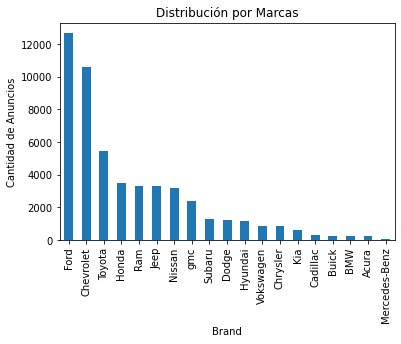

In [ ]:
vehicles_prices_dataframes['brand'].value_counts().plot(kind='bar', title='Distribución por Marcas')
plt.xlabel('Brand')
plt.ylabel('Cantidad de Anuncios')
plt.show()

In [ ]:
pivot(vehicles_prices_dataframes, 'model', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
model,,,
acura tl,6474.500000,1527982,236
bmw x5,10695.891386,2855803,267
buick enclave,11439.612546,3100135,271
cadillac escalade,17032.059006,5484323,322
chevrolet camaro,13284.961353,5499974,414
...,...,...,...
toyota sienna,9046.838906,2976410,329
toyota tacoma,15473.817412,12796847,827


Si en cambio, revisamos la misma tabla anterior pero agrupada por modelos, vemos que a primera vista al menos, los datos están mejor agrupados. Nuestro promedio de anuncios por modelo es del orden de 540, vemos que tenemos (en los 10 datos visibles) vemos que el menor de los datos es de 236 y el mayor 827. Vamos a revisar esta columna un poco más, pero parece ser una subdivisión mejor que la marca para trabajar. Pero al graficarlo, podemos notar algunos datos bastante relevantes:

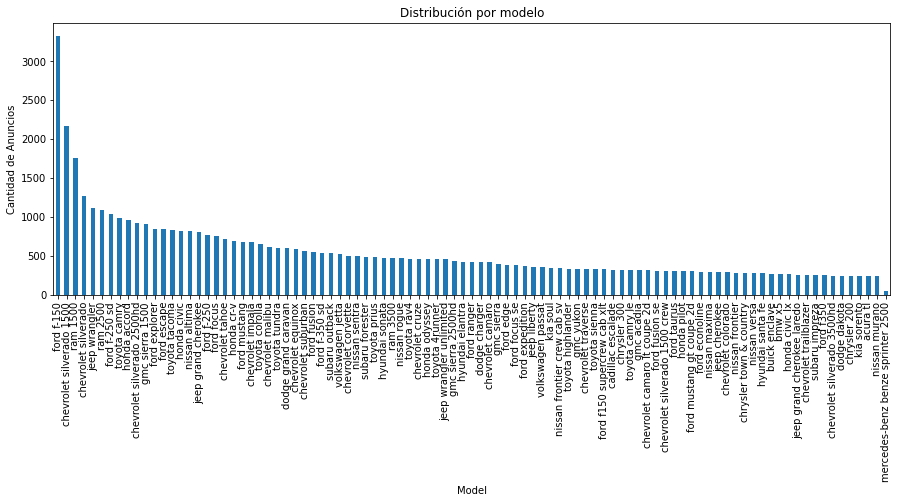

In [ ]:
vehicles_prices_dataframes['model'].value_counts().plot(kind='bar', title='Distribución por modelo' , figsize=(15, 5))
plt.xlabel('Model')
plt.ylabel('Cantidad de Anuncios')
plt.show()

El modelo Ford f-150 se escapa de los datos en comparación al resto. Hay algunos vehiculos que tienen muchisimos más anuncios que el resto. Valdría la pena revisar, ya que se ve una media que ronda los 500, sin embargo tenemos 6 modelos que superan los 1000 y 3 que superan los 1500. Un dato interesante es que si bien Ram como marca se encuentra en el número 5 en cantidad de anuncios, el modelo Ram 1500 es el tercer favorito superando a otras marcas.

AxesSubplot(0.125,0.125;0.775x0.755)


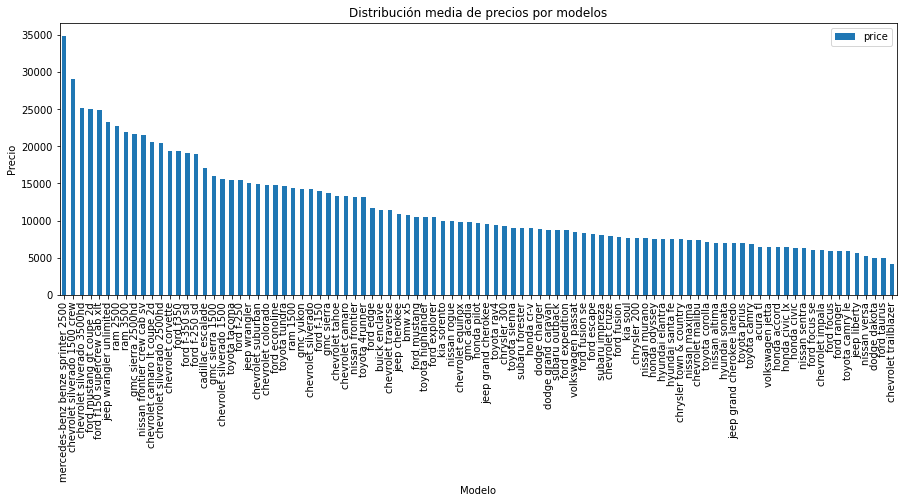

In [ ]:
models_stat = pivot(vehicles_prices_dataframes, 'model', 'price', 'mean')
print(models_stat.sort_values(by=['price'], ascending=False).plot(kind='bar', title='Distribución media de precios por modelos' , figsize=(15, 5)))
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


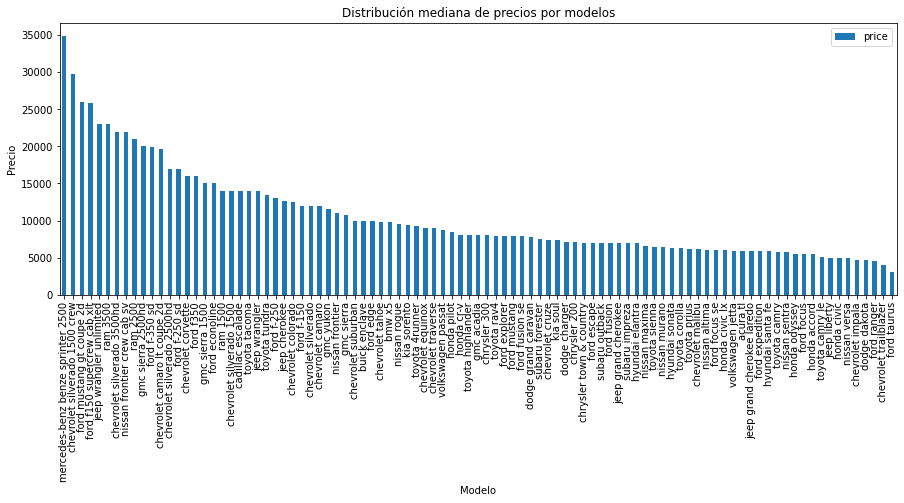

In [ ]:
models_stat_median = pivot(vehicles_prices_dataframes, 'model', 'price', 'median')
print(models_stat_median.sort_values(by=['price'], ascending=False).plot(kind='bar', title='Distribución mediana de precios por modelos', figsize=(15, 5)))
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

Al graficar nuestra tabla de precios por modelo, tanto la media como la mediana nos muestra unos montos bastante elevados (35 y 30 mil) en comparación la normal que sería entre los 5000 y 10.000. Estos podrían corresponder a excepciones como podría ser un auto muy elegante o vintage. Para poder visualizar mejor estos datos observaremos otro tipo de gráfico, esperamos que nos aclare la situación:

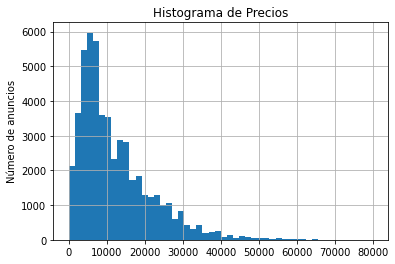

In [ ]:
vehicles_prices_dataframes['price'].hist(bins=50, range=(0,80000))
plt.title('Histograma de Precios')
plt.ylabel('Número de anuncios')
plt.show()

Al revisar el histograma del precio, podemos apreciar de inmediato que la mayoría de los vehiculos se venden por menos de 10.000. Se puede notar un pico a la altura de los 12.000 más o menos. Luego la cantidad va decreciendo bastante rápido y a partir de los 35.000 ya comienzan a ser valores anécdoticos.

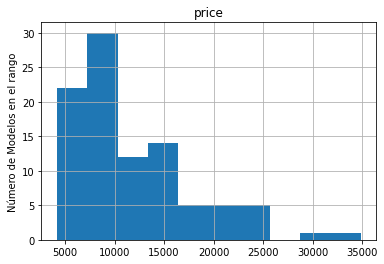

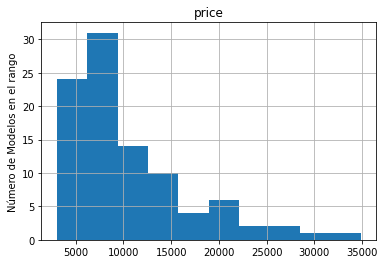

In [ ]:
models_stat.hist('price')
plt.ylabel('Número de Modelos en el rango')
plt.show()
models_stat_median.hist('price')
plt.ylabel('Número de Modelos en el rango')
plt.show()

Al ver comparar el histograma de la media, versus el de la mediana notamos que la mediana suavisa los datos de la derecha un poco. Esto nos indica que si bien no se ven tan claramente en los gráficos de más arriba, igual hay valores irregulares que nos podrían molestar para sacar conclusiones acertadas. 

Por otro lado, las barras del lado derecho son bajas, ya que son pocas las medianas de precio que superan los 15.000. Hemos notado la misma tendencia en el gráfico de barras de arriba. Pero este histograma nos ayuda a cuantificar estas "pocas" y nos muestra cómo se correlaciona esta cantidad con el resto de los datos.

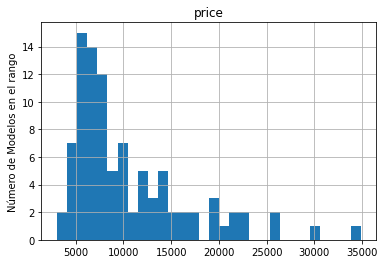

In [ ]:
models_stat_median.hist('price', bins=30)
plt.ylabel('Número de Modelos en el rango')
plt.show()

Si aumentamos el número de contenedores se va evidenciando que a partir de los 15.000 los valores son cada vez más escasos. Pasado los 25.000 son claramente excepcionales y al rededor de los 20.000 hay un grupo de valores que surge. El pique con un poco más de 14 modelos se encuentra en el rango de los 6.500 bajando a saltos. Primero a los 14, luego 12 y cae más o menos a los 5. Luego varia un poco entre los 6 y los 2. El gráfico entre los 4.000 y 15.000 hace bastante sentido.

In [ ]:
pivot(vehicles_prices_dataframes, 'type', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
type,,,
bus,17135.666667,411256,24
convertible,14575.881166,6500843,446
coupe,14353.442901,33055979,2303
hatchback,6868.513849,7191334,1047
mini_van,8193.177433,9512279,1161
offroad,14292.294393,3058551,214
other,10989.714844,2813367,256
pickup,16057.410418,112209184,6988


El tipo de vehiculo muestra una distribución bastante pareja en lo que a cantidad de anuncios se refiere. Algunos valores por debajo de los mil podrían agruparse en other ya que esa columna existe, de hecho la media de los precios de los tipos menos vendidos no sobrepasa los 18.0000 y en general se encuentra entre los 10.000 y 14.000. En esta agrupación destaca los vehiculos sedan y hatchback que tienen medias por debajo de los 7.000, siendo las medias más bajas del grupo. Vamos a revisar algunos gráficos.

Vamos a crear unas fórmulas en base a los gráficos que ya tenemos creados:

In [ ]:
def bar(df, column_by):
    return (df.sort_values(by=[column_by], ascending=False).plot(kind='bar', title='Distribución mediana de precios', figsize=(15, 5)))

In [ ]:
def hist(df, column_by):
    return df.hist(column_by, bins=30)

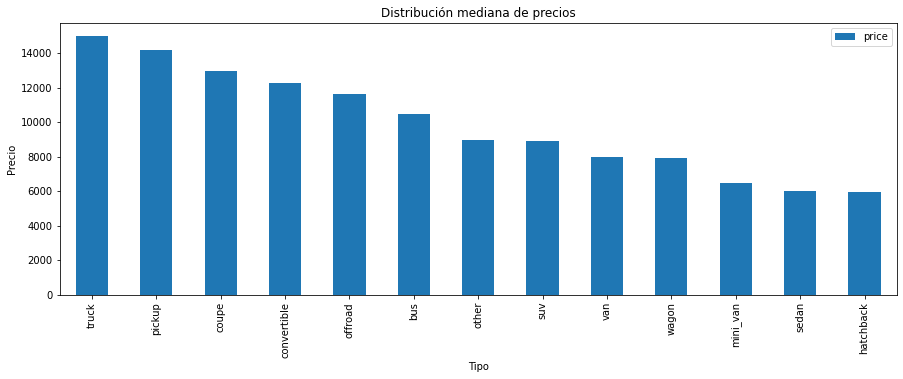

In [ ]:
type_stat_median = pivot(vehicles_prices_dataframes, 'type', 'price', 'median')
bar(type_stat_median, 'price')
plt.xlabel('Tipo')
plt.ylabel('Precio')
plt.show()

El gráfico nos presenta una imagen más clara de la distribución de precios por tipo. Vamos a revisar el histograma para el tipo a ver si encontramos algo más:

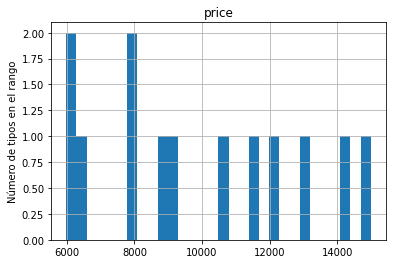

In [ ]:
hist(type_stat_median, 'price')
plt.ylabel('Número de tipos en el rango')
plt.show()

El histograma nos presenta una visualización interesante. Encontramos una distribución pareja con solo dos picos de justo el doble que el resto a la altura de los 6.000 y 8.000. Estos podrían corresponder efectivamente a los tipos sedan y hatchback por u lado y van y wagon por el otro que son los tipos más populares. 

In [ ]:
pivot(vehicles_prices_dataframes, 'car_years', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
car_years,,,
-1,12000.000000,12000,1
0,24576.198782,56500681,2299
1,21215.512605,47968274,2261
2,19731.319283,59450465,3013
3,18819.519743,64343938,3419
...,...,...,...
69,44900.000000,44900,1
71,21000.000000,21000,1


Esta columna tendrá que ser revisada más a fondo y quizás agrupar por años. Se ven varios valores de 1 anuncio. Quizás con un gráfico podamos revisar mejor las variaciones. Es interesante notar que hay varios vehículos con 0 años a la venta.

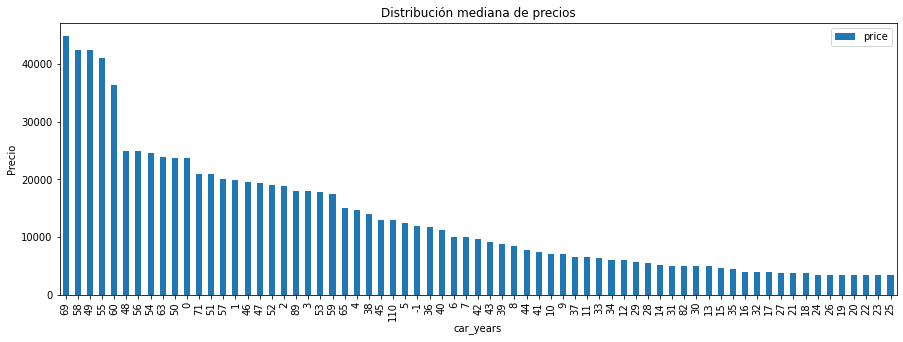

In [ ]:
car_years_stat_median = pivot(vehicles_prices_dataframes, 'car_years', 'price', 'median')
bar(car_years_stat_median, 'price')
plt.xlabel('car_years')
plt.ylabel('Precio')
plt.show()

En el gráfico podemos ver más claramente una distribución, más bien extraña. Los valores más altos se encuentran en vehículos muy viejos (probablemente en muy buenas condiciones. Dentro del rango de valores por sobre los 20.000 se encuentran los vehiculos con 0 años. Hay varios valores que se encuentran por debajo de los 10.000, estos podrían ser valores únicos ya que se encuentran por ejemplo los -1 años (que sabemos es solo un valor).

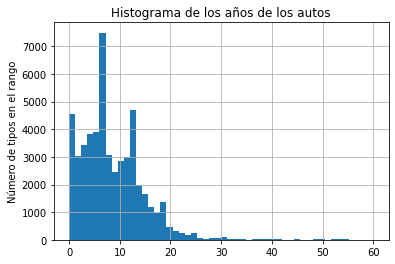

In [ ]:
vehicles_prices_dataframes['car_years'].hist(bins=50, range=(0,60))
plt.title('Histograma de los años de los autos')
plt.ylabel('Número de tipos en el rango')
plt.show()

El histograma nos presenta un pico grande a los 0 años, luego otro a los 6 y un último a los 12. A partir de los 25 años los valores ya son anecdoticos.

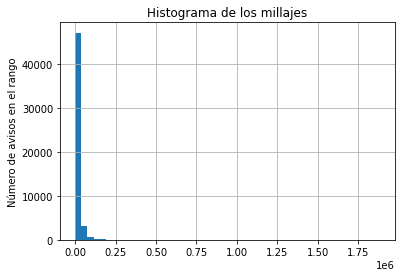

In [ ]:
vehicles_prices_dataframes['miles_per_year'].hist(bins=50)
plt.title('Histograma de los millajes')
plt.ylabel('Número de avisos en el rango')
plt.show()

Notamos un valor de más de 40000 en el rango de las 0 millas, mientras que el siguiente valor más alto es como de 70. La diferencia es demasiado grande.

In [ ]:
pivot(vehicles_prices_dataframes, 'cylinders', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
cylinders,,,
3,8571.911765,291445,34
4,7838.594486,121411990,15489
5,6686.818841,1845562,276
6,12374.105815,215990017,17455
8,15890.319747,281481124,17714
10,7326.811935,4051727,553
12,19000.000000,38000,2


En cuanto a la cylindrada, notamos que son 3 los valores relevantes: 4, 6 y 8 cilindros. Hay que revisar, ya que por ejemplo la media más alta la tiene los 12 cilindros, son solo 2 anuncios, pero valdría la pena revisarlo.

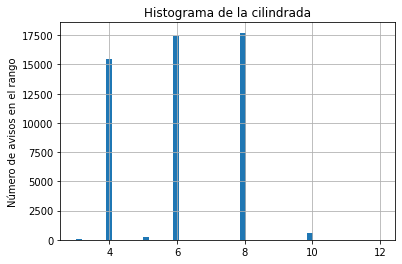

In [ ]:
vehicles_prices_dataframes['cylinders'].hist(bins=50)
plt.title('Histograma de la cilindrada')
plt.ylabel('Número de avisos en el rango')
plt.show()

Las únicas cilindradas relevantes son 4, 6 y 8.

En nuestro histograma en cambio, notamos una distribución pareja en los valores, con un pico único a la altura de los 6.000.

In [ ]:
pivot(vehicles_prices_dataframes, 'condition', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
condition,,,
excellent,12807.090142,317257237,24772
fair,3386.502178,5442109,1607
good,10877.333946,219113015,20144
like_new,16677.445593,79084447,4742
new,26050.300699,3725193,143
salvage,4242.295652,487864,115


Finalmente, para la condición podemos ver que tenemos muchos datos para excellent y good, sin embargo la media de like_new es la más alta. 

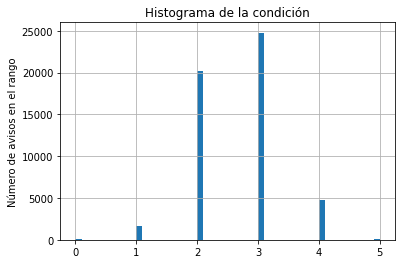

In [ ]:
vehicles_prices_dataframes['condition_id'].hist(bins=50)
plt.title('Histograma de la condición')
plt.ylabel('Número de avisos en el rango')
plt.show()

Podemos notar que la mayoría de los valores se encuentran en los códigos 5 (excellent) y 4 (good).

## Estudiar y tratar valores atípicos:<a id='weirdos'></a>

Con los resultados anteriores, revisaremos la columna precio más a fondo.

In [ ]:
vehicles_prices_dataframes['price'].describe()

count     51523.000000
mean      12132.637172
std       10040.905535
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16842.500000
max      375000.000000
Name: price, dtype: float64

Al revisar la columna 'price' más a fondo, notamos que la media es 12.132 mientras que la mediana es de 9.000. Está diferencia ya nos indica que hay valores excepcionales. Otro punto importante es que la desviación estándar es de 10.040, esto concuerda con nuestras observaciones y nos indica que efectivamente deben haber anomalías que revisar.

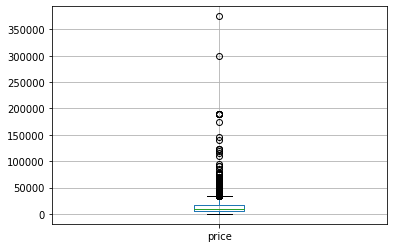

In [ ]:
vehicles_prices_dataframes.boxplot(column='price')
plt.show()

Casi no se ve nuestra caja, se ven varios valores atípicos algunos por sobre los 350.000. Vamos a cambiar la escala de gráfico para mejorar la visualización.

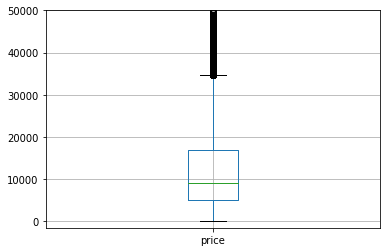

In [ ]:
vehicles_prices_dataframes.boxplot(column='price')
plt.ylim(-1500, 50000)
plt.show()

Ya se ve un poco mejor, pero podemos notar que los bigotes resultantes son asimétricos. Vamos a agregar nuestros cuartiles al gráfico para poder revisar un poco más a fondo:

In [ ]:
Q1 = vehicles_prices_dataframes['price'].quantile(0.25)
Q3 = vehicles_prices_dataframes['price'].quantile(0.75)
print("First quartile:", Q1)
print("Third quartile:", Q3) 

First quartile: 5000.0
Third quartile: 16842.5


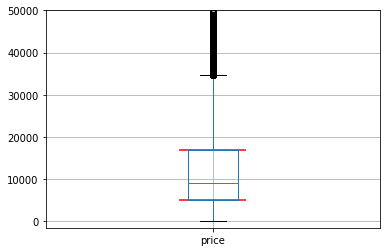

In [ ]:
vehicles_prices_dataframes.boxplot(column='price')
plt.ylim(-1500, 50000)
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.show()

Como se puede apreciar, las líneas de los cuartiles coinciden con los bordes de la caja. El bigote inferior está en cero y comprobaremos si el valor teorico coincide con el valor trasado para el bigote superior.

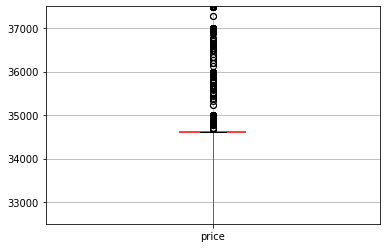

In [ ]:
IQR = Q3 - Q1
vehicles_prices_dataframes.boxplot(column='price')
plt.ylim(32500, 37500)
plt.hlines(y=(Q3+1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.show()

En este caso, podemos notar que para el bigote superior los valores teoricos y trasados coinciden. 

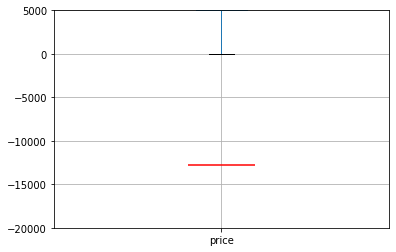

In [ ]:
vehicles_prices_dataframes.boxplot(column='price')
plt.ylim(-20000, 5000)
plt.hlines(y=(Q1-1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.show()

Como se puede apreciar el valor teorico del bigote inferior se encuentra muy por debajo del valor trasado que está en el cero. Esto quiere decir que nuestros datos están concetrados en los valores más pequeños.

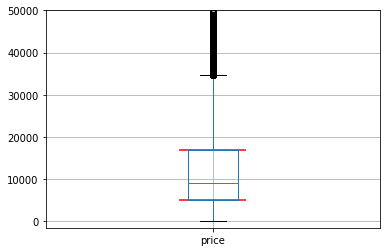

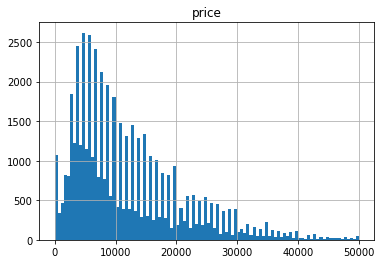

In [ ]:
vehicles_prices_dataframes.boxplot(column='price')
plt.ylim(-1500, 50000)
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.show()

vehicles_prices_dataframes.hist('price', bins=100, range=(0, 50000))
plt.show()

Si comparamos nuestra diagrama de cajas con un histograma dentro de los mismos rangos, nuestros datos comienzan a tomar más sentido. Como habías visto en la descripción de la columna precio, la media es casi el doble de la mediana, lo que se confirma con el diagrama de cajas que muestra una cola larga de valores por encima de nuestro bigote superior.

Antes de realizar una base de datos sin valores atípicos, vamos a estudiar los datos que tienen los valores más altos. 

In [ ]:
vehicles_prices_dataframes.sort_values(by='price' ,ascending=False).head(10)

,price,brand,model,model_year,type,transmission,cylinders,fuel,is_4wd,paint_color,...,odometer,odometer_grouped,miles_per_year,date_posted,ads_year,ads_month,ads_month_id,ads_weekday,ads_weekday_id,days_listed
12503,375000,Nissan,nissan frontier,1999,pickup,automatic,6,gas,True,blue,...,115000,113001 to 123000,6052.631579,2018-05-19,2018,Mayo,5,Sábado,5,21
11358,300000,Ram,ram 2500,2015,truck,automatic,6,diesel,True,grey,...,104230,94001 to 113000,34743.333333,2018-10-15,2018,Octubre,10,Lunes,0,39
33432,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,black,...,151248,148001 y 155000,30249.600000,2019-02-05,2019,Febrero,2,Martes,1,102
30632,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,black,...,129000,127001 to 133000,32250.000000,2018-07-21,2018,Julio,7,Sábado,5,42
1668,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,white,...,151248,148001 y 155000,30249.600000,2019-03-20,2019,Marzo,3,Miercoles,2,21
27374,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,black,...,151248,148001 y 155000,37812.000000,2018-09-25,2018,Septiembre,9,Martes,1,72
1309,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,black,...,151248,148001 y 155000,30249.600000,2019-03-02,2019,Marzo,3,Sábado,5,56
34387,189000,Ford,ford f-150,2014,truck,automatic,6,gas,True,black,...,151248,148001 y 155000,30249.600000,2019-02-02,2019,Febrero,2,Sábado,5,28
34204,175000,gmc,gmc sierra 2500hd,2004,truck,automatic,8,diesel,True,grey,...,149000,148001 y 155000,10642.857143,2018-08-25,2018,Agosto,8,Sábado,5,57
41746,145000,Toyota,toyota tundra,2008,truck,automatic,8,gas,True,red,...,140000,133001 to 143000,14000.000000,2018-06-16,2018,Junio,6,Sábado,5,29


Lo primero que podemos notar en nuestros valores extremos es que la marca Ford, en específico el Ford F-150 se repite mucho, 6 de 10 corresponde a este modelo. Por otro lado, el tipo también se repite 9 de los 10 corresponden a Truck. Vamos a revisar estos dos casos un poco más a fondo.

In [ ]:
muestra_ford_f150 = vehicles_prices_dataframes.query('model == "ford f-150"')
muestra_truck = vehicles_prices_dataframes.query('type == "truck"')
print('la cantidad de anuncios de modelos ford f-150 es:', len(muestra_ford_f150))
print('la cantidad de anuncios de tipos truck es:', len(muestra_truck))

la cantidad de anuncios de modelos ford f-150 es: 3326
la cantidad de anuncios de tipos truck es: 12352


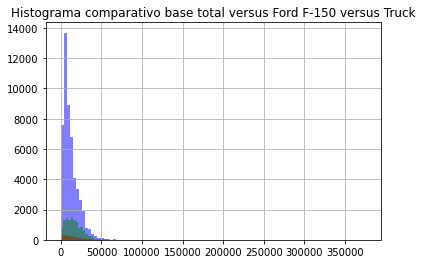

In [ ]:
vehicles_prices_dataframes['price'].hist(bins=100, color='blue', alpha=0.5)
muestra_ford_f150['price'].hist(bins=100, color='red', alpha=0.7)
muestra_truck['price'].hist(bins=100, color='green', alpha=0.5)
plt.title('Histograma comparativo base total versus Ford F-150 versus Truck')
plt.show()

Al mirar esta comparación sin ningún rango, podemos apreciar que a partir de los 100.000 ya son solo valores excepcionales, miremos entonces los datos más de cerca.

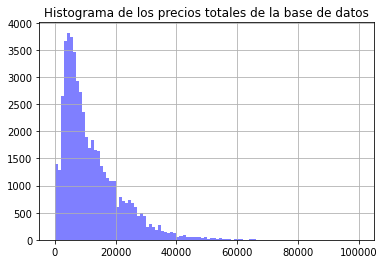

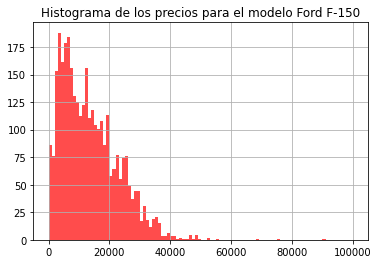

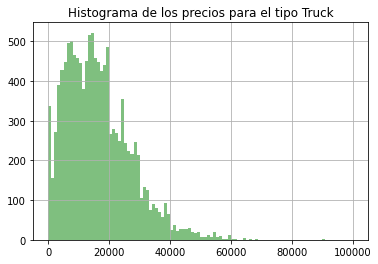

In [ ]:
vehicles_prices_dataframes['price'].hist(bins=100, range=(0, 100000), color='blue', alpha=0.5)
plt.title('Histograma de los precios totales de la base de datos')
plt.show()
muestra_ford_f150['price'].hist(bins=100, range=(0, 100000), color='red', alpha=0.7)
plt.title('Histograma de los precios para el modelo Ford F-150')
plt.show()
muestra_truck['price'].hist(bins=100, range=(0, 100000), color='green', alpha=0.5)
plt.title('Histograma de los precios para el tipo Truck')
plt.show()

Como se puede apreciar, en los tres casos las curvas muestran un pico en 0. Notamos que el DataFrame original se comporta bastante similar con el Ford F-150. En ambos, notamos el pico a la altura de los 6.000.

En el caso del histograma de los Truck, pareciera que a partir de los 6.000 va a comportarse de la manera esperada decendiendo, pero vuelve a tener un pico, y tiene caidas más abruptas. 

Tenemos que tener en consideración que tanto Truck como Ford F-150 tienen menos datos por lo que es normal que tengan un poco más de ruido.

De cualquier manera, podemos concluir que a partir de los 60.000 ya son valores excepcionales, claramente. Pero tomando en cuenta nuestro diagrama de cajas, podríamos bajar el rango más drasticamente y revisar como cambian nuestros gráficos.

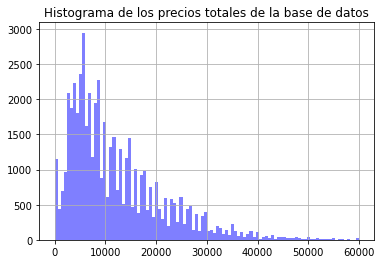

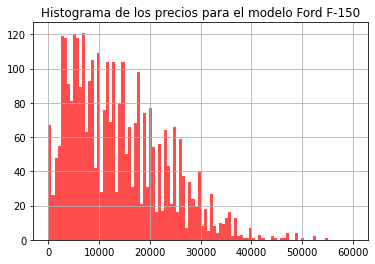

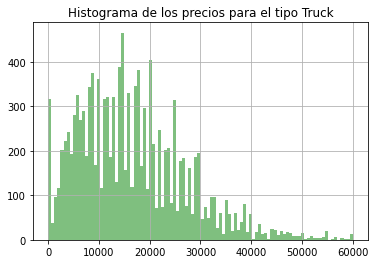

In [ ]:
vehicles_prices_dataframes['price'].hist(bins=100, range=(0, 60000), color='blue', alpha=0.5)
plt.title('Histograma de los precios totales de la base de datos')
plt.show()
muestra_ford_f150['price'].hist(bins=100, range=(0, 60000), color='red', alpha=0.7)
plt.title('Histograma de los precios para el modelo Ford F-150')
plt.show()
muestra_truck['price'].hist(bins=100, range=(0, 60000), color='green', alpha=0.5)
plt.title('Histograma de los precios para el tipo Truck')
plt.show()

Efectivamente, podríamos todavía quitar los valores de 40.000 hacia arriba y no causaría ninguna (o casi ninguna) variación. Revisaremos si recortamos nuestra nueva base con valores por debajo de los 30.000 o 35.000, considerando nuestros gráficos de cajas.

Vamos a explorar rápidamente los valores en 0 ya que es extraño que un vehículo se regale. Si fueran pocos casos, entonces podría ser que sea chatarra, pero en los tres histogramas teníamos un pico en 0.

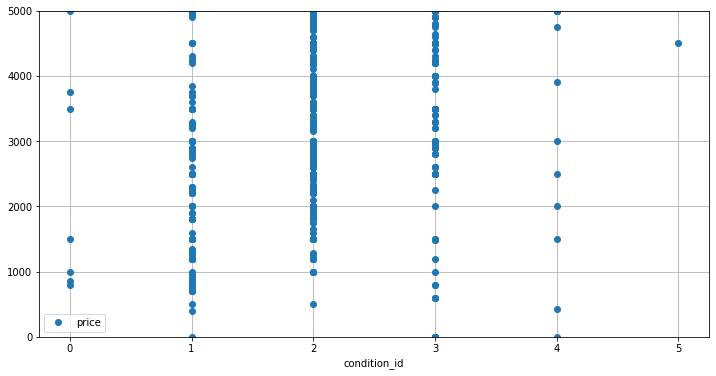

In [ ]:
muestra_ford_f150.plot(x='condition_id', y='price', style='o', ylim=(0, 5000), grid=True, figsize=(12,6))
plt.show()

La hipotesis de que podría ser por la condición no funciona, de hecho en el valor cero no hay datos, mientras que en 1, 2 y 5 si encontramos! Recordemos que 5 es condición Excelente.

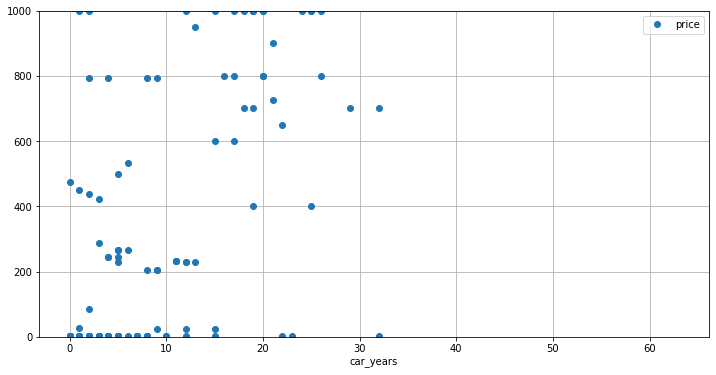

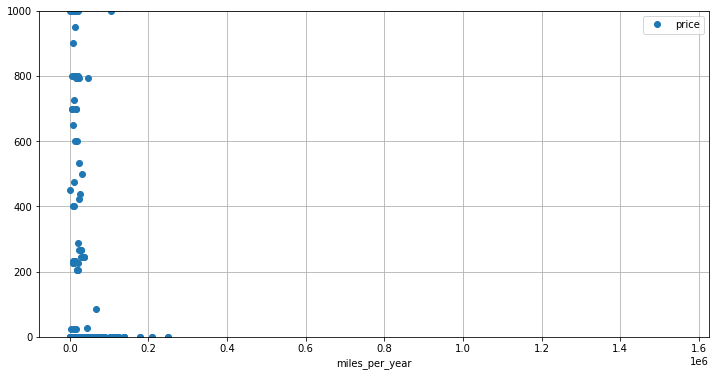

In [ ]:
muestra_truck.plot(x='car_years', y='price', style='o', ylim=(0, 1000), grid=True, figsize=(12,6))
plt.show()
muestra_truck.plot(x='miles_per_year', y='price', style='o', ylim=(0, 1000), grid=True, figsize=(12,6))
plt.show()

Revisamos tanto nuestra base de muestra de Truck como la de Ford F-150, en las columnas 'condition_id' y 'days_listed'  sin notar grandes variaciones. Sin embargo para las dos tablas de muestreo vemos en'car_years' y 'miles_per_year' notamos que los montos en cero se acumulan pero separados de todo los demás. Pareciera ser que los valores por debajo de 200 son excepcionales tambien.

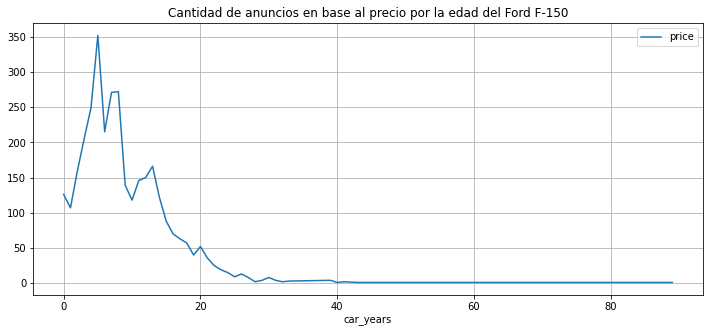

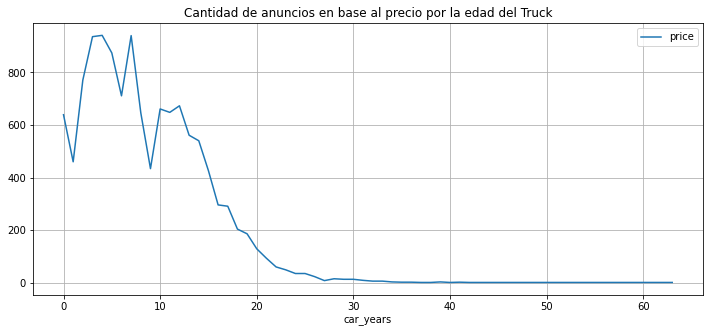

In [ ]:
muestra_ford_f150.pivot_table(index='car_years', values='price', aggfunc='count').plot(grid=True, figsize=(12,5))
plt.title('Cantidad de anuncios en base al precio por la edad del Ford F-150')
plt.show()
muestra_truck.pivot_table(index='car_years', values='price', aggfunc='count').plot(grid=True, figsize=(12,5))
plt.title('Cantidad de anuncios en base al precio por la edad del Truck')
plt.show()

Para ambos gráficos notamos que los valores en cero parten alto, pero aún no se explica si esto corresponde a excepciones, errores o algo más. Vamos a calcular el porcentaje de precios en 0 versus la cantidad total de anuncios para ver si seguimos investigando.

In [ ]:
vehicles_prices_dataframes.query('price == 0')

,price,brand,model,model_year,type,transmission,cylinders,fuel,is_4wd,paint_color,...,odometer,odometer_grouped,miles_per_year,date_posted,ads_year,ads_month,ads_month_id,ads_weekday,ads_weekday_id,days_listed


Importante, los valores que buscamos no son realmente en 0, sino que el valor más bajo es 1. Veamos el porcentaje de valores en 1.

In [ ]:
print('El porcentaje de precios con monto 0 es:', len(vehicles_prices_dataframes.query('price == 1')) / len(vehicles_prices_dataframes))
print('El porcentaje de precios con valores menores a 200 es:', len(vehicles_prices_dataframes.query('price < 200')) / len(vehicles_prices_dataframes))

El porcentaje de precios con monto 0 es: 0.015488228558119675
El porcentaje de precios con valores menores a 200 es: 0.017681423830134116


Los valores con monto 1, representan el 1.55% de nuestra base, y los valores de menos de 200 representan solo el 1.77%. Vamos a analizar estos valores extremadamente baratos y luego los extremadamente altos, la intención es deducir si esto corresponde a errores menores o algo que valdría la pena reportar.

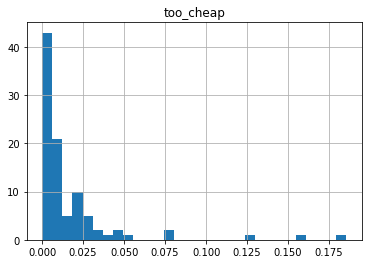

In [ ]:
vehicles_prices_dataframes['too_cheap'] = vehicles_prices_dataframes['price'] < 200
too_cheap_stat = vehicles_prices_dataframes.pivot_table(index='model', values='too_cheap')
too_cheap_stat.hist('too_cheap', bins=30)
plt.show()

Como se ve en este histograma, el pico se encuentra en el 0% o muy cercano al cero lo que significa que son muy pocos los vehiculos que se ingresan con valores extremadamente bajos.

Recordemos el valor de nuestro bigote superior:

In [ ]:
bigote_superior = Q3+1.5*IQR
bigote_superior

34606.25

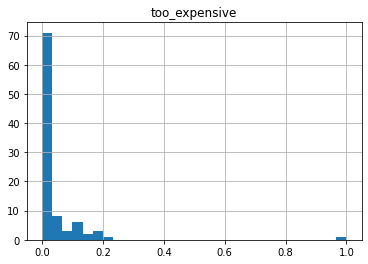

In [ ]:
vehicles_prices_dataframes['too_expensive'] = vehicles_prices_dataframes['price'] > bigote_superior
too_expensive_stat = vehicles_prices_dataframes.pivot_table(index='model', values='too_expensive')
too_expensive_stat.hist('too_expensive', bins=30)
plt.show()

In [ ]:
print('El porcentaje de precios con monto superior a 34597.5 es:', len(vehicles_prices_dataframes.query('price > 34597.5')) / len(vehicles_prices_dataframes))

El porcentaje de precios con monto superior a 34597.5 es: 0.031946897502086444


Con los valores excesivos notamos que aún quitando todos los modelos por encima de 34597.5 aun no afecta a tantos valores. Con esto, comprobamos que podemos deshacernos de ambos extremos sin poner en riesgo nuestros datos.

In [ ]:
vehicles_prices_good = vehicles_prices_dataframes.query('price > 200 and price < 34597.5')

Revisemos ahora el millaje anual:

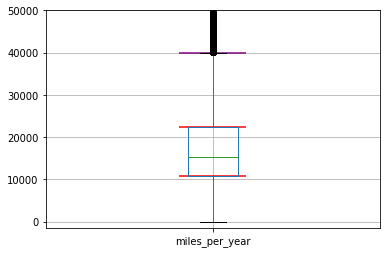

In [ ]:
Q1_miles = vehicles_prices_dataframes['miles_per_year'].quantile(0.25)
Q3_miles = vehicles_prices_dataframes['miles_per_year'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles
vehicles_prices_dataframes.boxplot(column='miles_per_year')
plt.ylim(-1500, 50000)
plt.hlines(y=[Q1_miles, Q3_miles], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_miles+1.5*IQR_miles), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_miles-1.5*IQR_miles), xmin=0.9, xmax=1.1, color='purple')
plt.show()

Como se ve en este diagrama de cajas, el límite inferior se encuentra en 0, pero el bigote superior tiene varios valores excepcionales. Vamos a recortar los valores extremos de 'miles_per_year' en base al bigote superior.

In [ ]:
limite_sup_millas = Q3_miles+1.5*IQR_miles
limite_inf_millas = Q1_miles-1.5*IQR_miles
print('El limite superior para la columna "miles_per_year" es:', limite_sup_millas)
print('El limite inferior para la columna "miles_per_year" es:', limite_inf_millas)

El limite superior para la columna "miles_per_year" es: 40040.22023809524
El limite inferior para la columna "miles_per_year" es: -6924.176587301587


Revisaremos la edad del vehículo ahora:

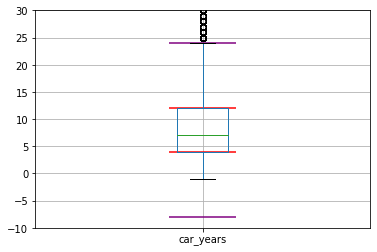

In [ ]:
Q1_year = vehicles_prices_dataframes['car_years'].quantile(0.25)
Q3_year = vehicles_prices_dataframes['car_years'].quantile(0.75)
IQR_year = Q3_year - Q1_year
vehicles_prices_dataframes.boxplot(column='car_years')
plt.ylim(-10, 30)
plt.hlines(y=[Q1_year, Q3_year], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_year+1.5*IQR_year), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_year-1.5*IQR_year), xmin=0.9, xmax=1.1, color='purple')
plt.show()

En el caso de los años del vehiculo, también utilizaremos el bigote superior como límite:

In [ ]:
limite_sup_year = Q3_year+1.5*IQR_year
limite_inf_year = Q1_year-1.5*IQR_year
print('El limite superior para la columna "car_years" es:', limite_sup_year)
print('El limite inferior para la columna "car_years" es:', limite_inf_year)

El limite superior para la columna "car_years" es: 24.0
El limite inferior para la columna "car_years" es: -8.0


En el caso de la cilindrada, veamos como se comporta nuestra base:

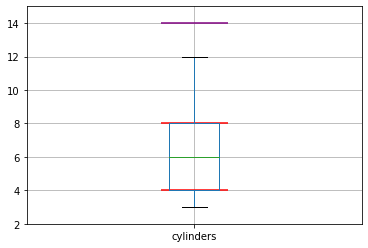

In [ ]:
Q1_cilinder = vehicles_prices_dataframes['cylinders'].quantile(0.25)
Q3_cilinder = vehicles_prices_dataframes['cylinders'].quantile(0.75)
IQR_cilinder = Q3_cilinder - Q1_cilinder
vehicles_prices_dataframes.boxplot(column='cylinders')
plt.ylim(2, 15)
plt.hlines(y=[Q1_cilinder, Q3_cilinder], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_cilinder+1.5*IQR_cilinder), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_cilinder-1.5*IQR_cilinder), xmin=0.9, xmax=1.1, color='purple')
plt.show()

In [ ]:
limite_sup_cilinder = Q3_cilinder+1.5*IQR_cilinder
limite_inf_cilinder = Q1_cilinder-1.5*IQR_cilinder
print('El limite superior para la columna "cylinders" es:', limite_sup_cilinder)
print('El limite inferior para la columna "cylinders" es:', limite_inf_cilinder)

El limite superior para la columna "cylinders" es: 14.0
El limite inferior para la columna "cylinders" es: -2.0


En el caso de la cilindrada podemos notar que el bigote superior e inferior están bastante alejados de nuestros máximos reales. Esta columna la dejaremos como está.

Finalmente, analizaremos la columna de la condición:

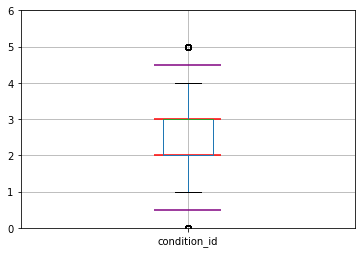

In [ ]:
Q1_condition = vehicles_prices_dataframes['condition_id'].quantile(0.25)
Q3_condition = vehicles_prices_dataframes['condition_id'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
vehicles_prices_dataframes.boxplot(column='condition_id')
plt.ylim(0, 6)
plt.hlines(y=[Q1_condition, Q3_condition], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_condition+1.5*IQR_condition), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_condition-1.5*IQR_condition), xmin=0.9, xmax=1.1, color='purple')
plt.show()

In [ ]:
limite_sup_condition = Q3_condition+1.5*IQR_condition
limite_inf_condition = Q1_condition-1.5*IQR_condition
print('El limite superior para la columna "condition_id" es:', limite_sup_condition)
print('El limite inferior para la columna "condition_id" es:', limite_inf_condition)

El limite superior para la columna "condition_id" es: 4.5
El limite inferior para la columna "condition_id" es: 0.5


En el caso de condition, podemos notar que el bigote inferior es el más relevante. Vamos a quitar todos los montos por debajo de 0.5 y por encima de 4.5.

In [ ]:
vehicles_prices_good = vehicles_prices_dataframes.query('price > 200 and price < 34597.5 and miles_per_year < 40040 and car_years < 24 and condition_id < 4.5 and condition_id > 0.5')

## Estudiar parámetros principales sin valores atípicos:<a id='clean_data'></a>

Compararemos entonces las distintas columnas para ir viendo si nuestros datos han variado:

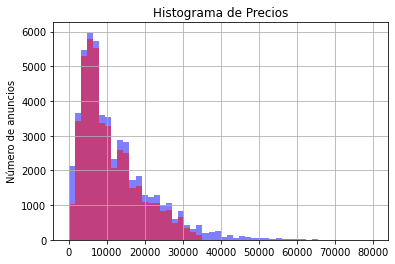

In [ ]:
vehicles_prices_dataframes['price'].hist(bins=50, range=(0,80000), color='blue', alpha=0.5)
vehicles_prices_good['price'].hist(bins=50, range=(0,80000), color='red', alpha=0.5)
plt.title('Histograma de Precios')
plt.ylabel('Número de anuncios')
plt.show()

Podemos ver en el gráfico de arriba que nuestra nueva base en rojo, es mucho más acotada, sus picos se redujieron. El número de valores bajo los 5000 bajó drásticamente, se ajustó el pico a la altura de los 6.500. Los gráficos hacen más sentido, tener menos vehiculos baratos luego la gran mayoría en una valor que se encuentra entre los 6mil y 10mil, y luego van bajando paulatinamente. 

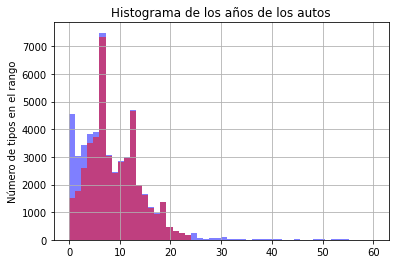

In [ ]:
vehicles_prices_dataframes['car_years'].hist(bins=50, range=(0,60), color='blue', alpha=0.5)
vehicles_prices_good['car_years'].hist(bins=50, range=(0,60), color='red', alpha=0.5)
plt.title('Histograma de los años de los autos')
plt.ylabel('Número de tipos en el rango')
plt.show()

Para la columna de 'car_years' desaparece el pico a los 0 años, y si bien se mantienen dos picos importantes, el gráfico queda limpio de valores excepcionales.

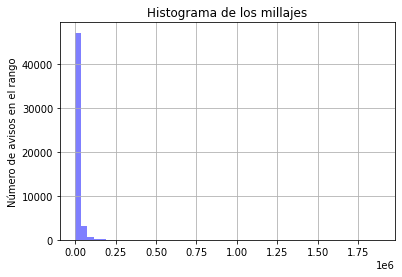

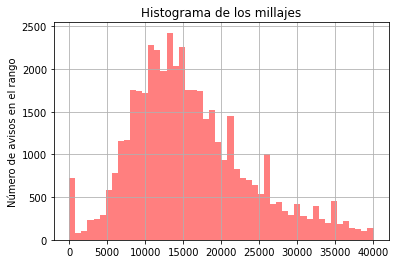

In [ ]:
vehicles_prices_dataframes['miles_per_year'].hist(bins=50, color='blue', alpha=0.5)
plt.title('Histograma de los millajes')
plt.ylabel('Número de avisos en el rango')
plt.show()
vehicles_prices_good['miles_per_year'].hist(bins=50, color='red', alpha=0.5)
plt.title('Histograma de los millajes')
plt.ylabel('Número de avisos en el rango')
plt.show()

En la columna de millas notamos una diferencia radical entre nuestra base original y la base con datos correctos. El pico en el monto 0 se atenua, y podemos notar que la mayoría de los vehiculos se anuncian entre los 10.000 y 15.000 millas.

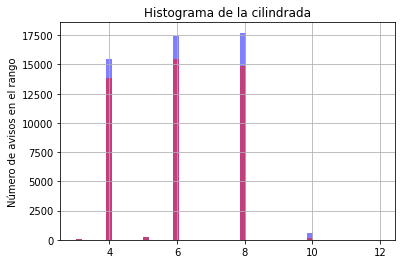

In [ ]:
vehicles_prices_dataframes['cylinders'].hist(bins=50, color='blue', alpha=0.5)
vehicles_prices_good['cylinders'].hist(bins=50, color='red', alpha=0.5)
plt.title('Histograma de la cilindrada')
plt.ylabel('Número de avisos en el rango')
plt.show()

Para nuestra columna de cilindrada, notamos que nuestros 3 valores se emparejan bastante. Es interesante ver que los 8 cilindros se ven sobrepasados por un poco por los 6 cilindros.

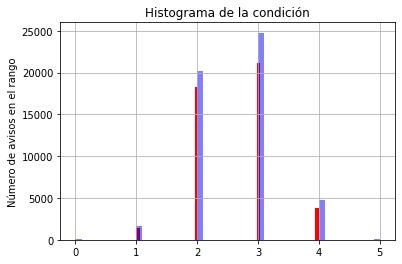

In [ ]:
vehicles_prices_good['condition_id'].hist(bins=50, color='red')
vehicles_prices_dataframes['condition_id'].hist(bins=50, color='blue', alpha=0.5)
plt.title('Histograma de la condición')
plt.ylabel('Número de avisos en el rango')
plt.show()

En la columna condition, desaparecen todas las condiciones menos 4 y 5. 

## Periodo de colocación de los anuncios:<a id='ads_listed'></a>

Ahora que tenemos una base de datos seccionada, vamos a revisar los datos que más nos interesan. Primero revisaremos los días que ha durado un anuncio en el sitio.

In [ ]:
vehicles_prices_good['days_listed'].describe(percentiles=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))

count    44620.000000
mean        39.576625
std         28.250174
min          0.000000
10%         10.000000
20%         16.000000
30%         22.000000
40%         27.000000
50%         33.000000
60%         40.000000
70%         48.000000
80%         59.000000
90%         77.000000
max        271.000000
Name: days_listed, dtype: float64

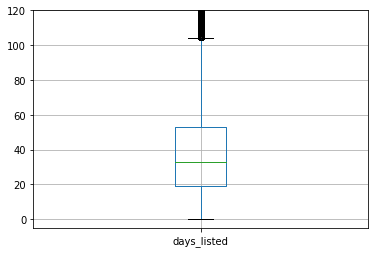

In [ ]:
vehicles_prices_good.boxplot('days_listed')
plt.ylim(-5, 120)
plt.show()

Podemos ver que la duración media de un afiche en el sitio es de 40 días, sin embargo la mediana es de 33 días (casi una semana menos). Esto nos indica que hay varios anuncios que se quedan por periodos muy largos (el más largo se quedó 271 días). También podemos observar que el mínimo es 0 días!

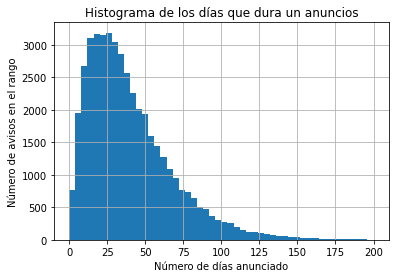

In [ ]:
vehicles_prices_good['days_listed'].hist(bins=50, range=(0, 200))
plt.title('Histograma de los días que dura un anuncios')
plt.ylabel('Número de avisos en el rango')
plt.xlabel('Número de días anunciado')
plt.show()

Sin embargo, si revisamos un histograma de los días listados, notamos el momento más algido a la altura de los 25 días y luego nuestros números bajan progresivamente.

In [ ]:
model_count = vehicles_prices_good.pivot_table(index='model', values='type', aggfunc='count')
model_count.columns = ['count']
print(model_count)

                   count
model                   
acura tl             236
bmw x5               262
buick enclave        259
cadillac escalade    279
chevrolet camaro     294
...                  ...
toyota sienna        309
toyota tacoma        762
toyota tundra        514
volkswagen jetta     490
volkswagen passat    336

[94 rows x 1 columns]


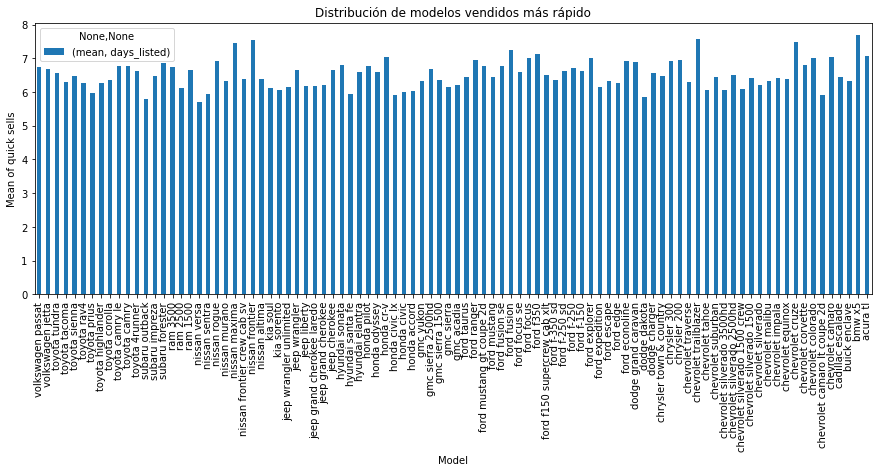

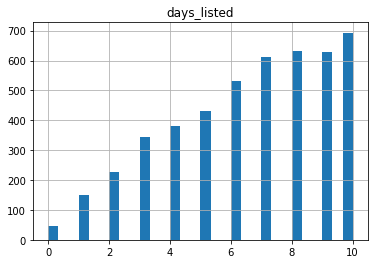

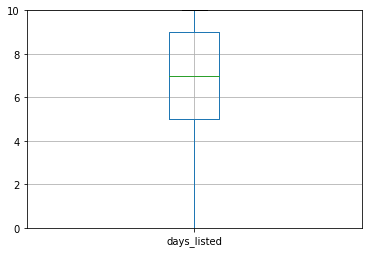

In [ ]:
sold_quick = vehicles_prices_good.query('days_listed <= 10')
sold_quick.pivot_table(index='model', values='days_listed', aggfunc=['mean']).sort_values(by=['model'], ascending=False).plot(kind='bar', title='Distribución de modelos vendidos más rápido', figsize=(15, 5))
plt.xlabel('Model')
plt.ylabel('Mean of quick sells')
plt.show()
sold_quick.hist('days_listed', bins=30)
plt.show()
sold_quick.boxplot('days_listed')
plt.ylim(0, 10)
plt.show()

Lo primero que podemos notar en nuestros datos de vehiculos vendidos en los 10 primeros días, es que la media es muy pareja para todos los modelos no hay uno que sobresalga como el que se vende más rápido. Además pudimos ver que la cantidad de vehiculos vendidos van creciendo a medida que pasan los días. O sea, no hay un día que sea como el día de ventas seguras, por lo menos en en cuantil más bajo. Los vehiculos que se venden más rápido normalmente salen el séptimo día. 

Los modelos que se venden más rápido porcentualmente son los siguientes. Sin embargo vale la pena tener en cuenta que los porcentajes no son excesivos.

In [ ]:
percentage_sold_quick = sold_quick['model'].value_counts() * 100 / vehicles_prices_good['model'].value_counts()
percentage_sold_quick.sort_values(ascending=False).head()

toyota highlander           16.077170
volkswagen passat           14.880952
ford f-250                  13.522538
ford mustang gt coupe 2d    13.223140
buick enclave               13.127413
Name: model, dtype: float64

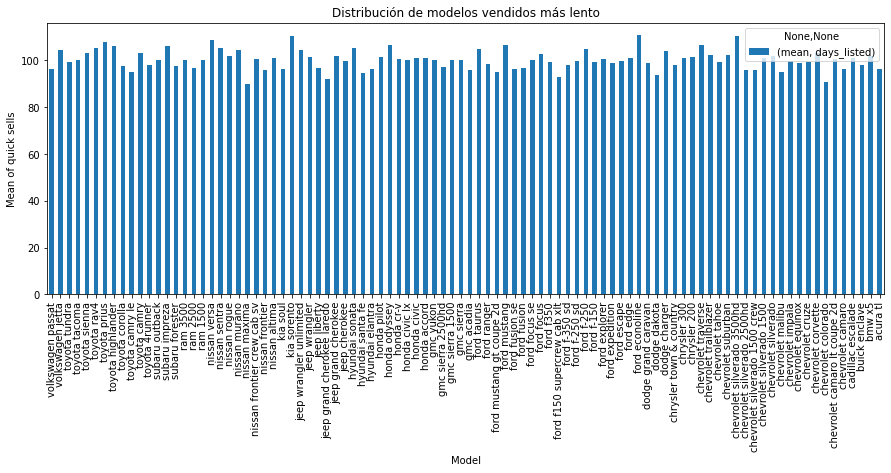

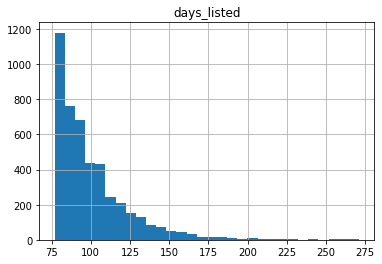

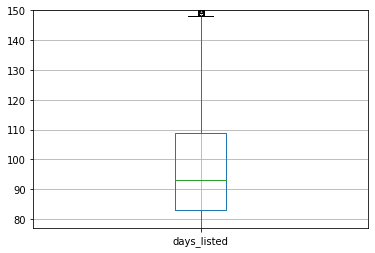

In [ ]:
sold_slow = vehicles_prices_good.query('days_listed >= 77')
sold_slow.pivot_table(index='model', values='days_listed', aggfunc=['mean']).sort_values(by=['model'], ascending=False).plot(kind='bar', title='Distribución de modelos vendidos más lento', figsize=(15, 5))
plt.xlabel('Model')
plt.ylabel('Mean of quick sells')
plt.show()
sold_slow.hist('days_listed', bins=30)
plt.show()
sold_slow.boxplot('days_listed')
plt.ylim(77, 150)
plt.show()

Con los vehiculos que se venden más lento, podemos notar que la mediana es pareja para todos los modelos. Y el histograma también es bastante claro, la mayoría de los vehiculos más lentos tiene el pico muy pronto, el gráfico decrece rápido y más de 125 días es bastante inusual. Lo normal es que un vehiculo que se vende lento sale entre los 90 y 95 días.

In [ ]:
percentage_sold_slow = sold_slow['model'].value_counts() * 100 / vehicles_prices_good['model'].value_counts()
percentage_sold_slow.sort_values(ascending=False).head()

gmc acadia            14.134276
subaru impreza        13.865546
chevrolet suburban    13.483146
kia soul              13.395639
ford f-350 sd         13.223140
Name: model, dtype: float64

Es interesante ver que nuevamente los porcentajes son bastante bajos. Con esto, podemos concluir que el modelo no es un factor para que se venda rápido o no un modelo.

En conclusión, lo más normal es que un vehiculo se venda a los 33 días. Los que se venden más rápido normalmente se venden el séptimo día, y los que se venden más lento en general no pasan de los 100 días. 

## Precio promedio por cada tipo de vehículo:<a id='average_type'></a>

Vamos a revisar los tipos de vehiculos más vendidos.

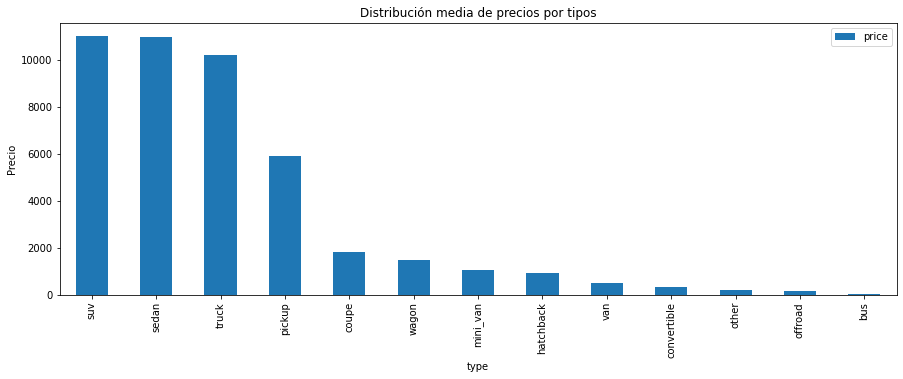

In [ ]:
type_stat_good = pivot(vehicles_prices_good, 'type', 'price', 'count')
type_stat_good.sort_values(by=['price'], ascending=False).plot(kind='bar', title='Distribución media de precios por tipos', figsize=(15, 5))
plt.xlabel('type')
plt.ylabel('Precio')
plt.show()

Los dos tipos más vendidos en nuestro sitio son los Sedan y los SUV, pero van seguidos de cerca por los Truck. Veamos el precio promedio de estos vehículos:

In [ ]:
print('El precio medio por el que se vende un sedan es de:', vehicles_prices_good.query('type == "sedan"')['price'].mean())
print('El precio medio por el que se vende un SUV es de:', vehicles_prices_good.query('type == "suv"')['price'].mean())

El precio medio por el que se vende un sedan es de: 6712.62562745277
El precio medio por el que se vende un SUV es de: 10193.37263979666


Concluimos que los precios más populares son los Sedan (que se venden en promedio por 7063) y los SUV (que se venden en general por 10.599).

## Factores de precio:<a id='price_factor'></a>

Ahora, veremos algunos puntos más detallados, estudiaremos si el precio depende de la edad, millaje, condición, tipo de transmisión y color, entre otros. Con estas observaciones, intentaremos determinar cuales son los factores que más influyen en el precio de un vehículo. Antes de empezar, crearemos una pequeña fórmula para encontrar los datos que tienen más de 50 anuncios por tipo de vehiculo. De esta manera, podremos filtrar cualquier categoría que no sea tan relevante para nuestro estudio, o que pudiese ser un caso excepcional.

In [ ]:
def fifty_plus_ads(tipo, ind):
    return vehicles_prices_good[vehicles_prices_good['type'] == tipo].pivot_table(index=ind, values='price', aggfunc='count').query('price > 50')

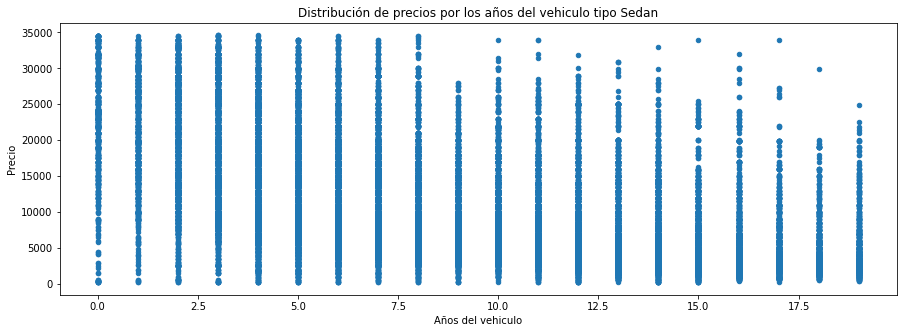

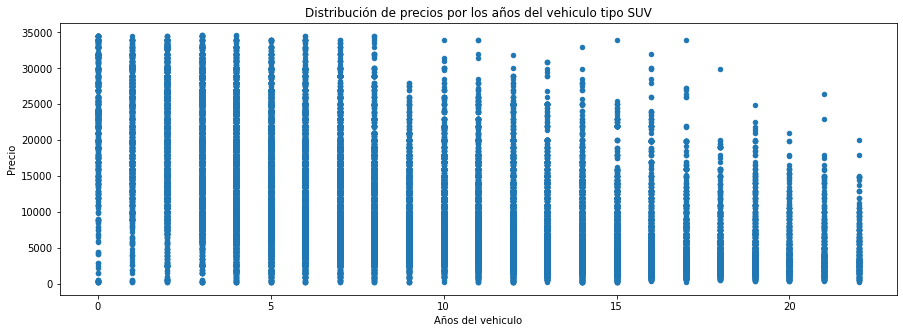

In [ ]:
years_counted_sedan = fifty_plus_ads('sedan', 'car_years')
years_counted_suv = fifty_plus_ads('suv', 'car_years')
years_good_sedan = vehicles_prices_good.query('car_years in @years_counted_sedan.index')
years_good_suv = vehicles_prices_good.query('car_years in @years_counted_suv.index')
years_good_sedan.plot(x='car_years' , y='price' , kind='scatter', title='Distribución de precios por los años del vehiculo tipo Sedan', figsize=(15, 5))
plt.xlabel('Años del vehiculo')
plt.ylabel('Precio')
plt.show()
years_good_suv.plot(x='car_years' , y='price' , kind='scatter', title='Distribución de precios por los años del vehiculo tipo SUV', figsize=(15, 5))
plt.xlabel('Años del vehiculo')
plt.ylabel('Precio')
plt.show()

En estos gráficos podemos notar que los vehiculos de ambos tipos tienen su máximos valor hasta los 8 años, luego su valor comienza a decrecer. Se puede ver también que los vehiculos SUV tienden a durar un par de años más en el mercado.

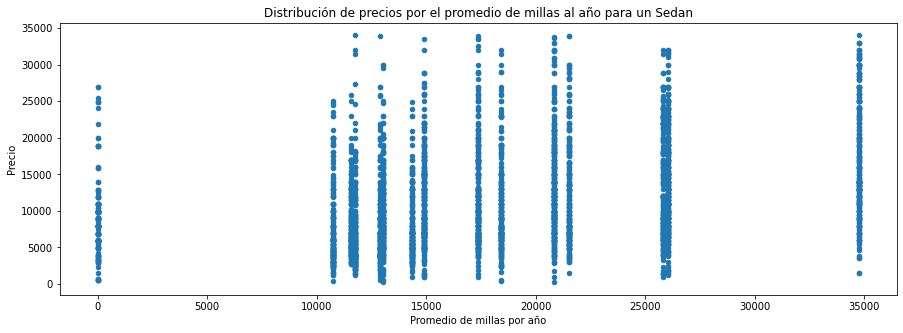

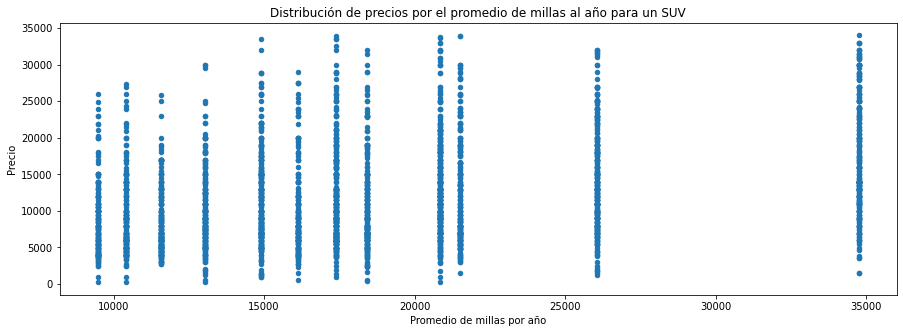

In [ ]:
miles_counted_sedan = fifty_plus_ads('sedan', 'miles_per_year')
miles_counted_suv = fifty_plus_ads('suv', 'miles_per_year')
miles_good_sedan = vehicles_prices_good.query('miles_per_year in @miles_counted_sedan.index')
miles_good_suv = vehicles_prices_good.query('miles_per_year in @miles_counted_suv.index')
miles_good_sedan.plot(x='miles_per_year' , y='price' , kind='scatter', title='Distribución de precios por el promedio de millas al año para un Sedan', figsize=(15, 5))
plt.xlabel('Promedio de millas por año')
plt.ylabel('Precio')
plt.show()
miles_good_suv.plot(x='miles_per_year' , y='price' , kind='scatter', title='Distribución de precios por el promedio de millas al año para un SUV', figsize=(15, 5))
plt.xlabel('Promedio de millas por año')
plt.ylabel('Precio')
plt.show()

Con las millas recorridas. Es interesante ver que si bien se venden vehiculos cero kilometros (normalmente para el tipo Sedan), en general, una vez comprado un vehiculo este no se vuelve a vender hasta pasado las 10.000 millas. La gran mayoría de los vehiculos se venden en el rango de los 10.000 y 20.000 millas. Siendo lo más normal que ambos tipos se vendan más caro entre los 17.000 y los 21.000.

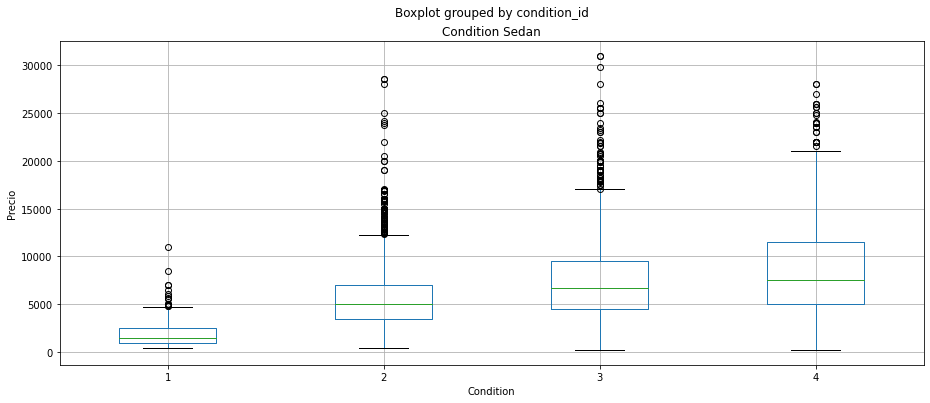

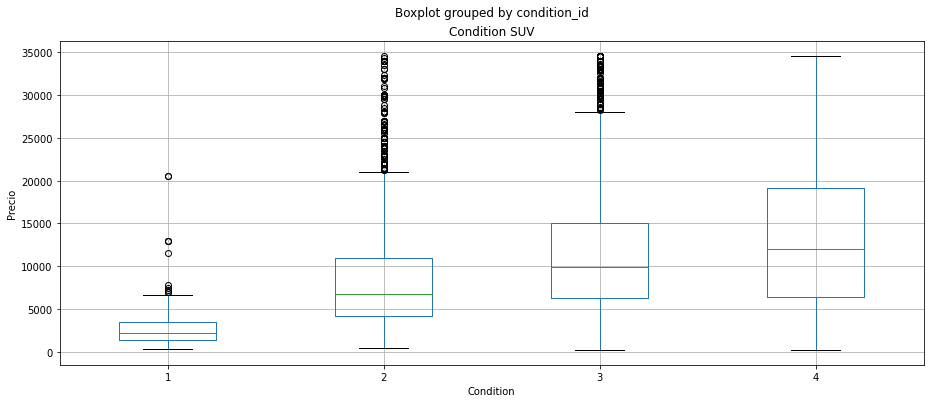

In [ ]:
condition_counted_sedan = fifty_plus_ads('sedan', 'condition_id')
condition_counted_suv = fifty_plus_ads('suv', 'condition_id')
condition_good_sedan = vehicles_prices_good.query('type == "sedan" and condition_id in @condition_counted_sedan.index')
condition_good_suv = vehicles_prices_good.query('type == "suv" and condition_id in @condition_counted_suv.index')
condition_good_sedan.boxplot(column='price', by='condition_id', figsize=(15, 6))
plt.title('Condition Sedan')
plt.xlabel('Condition')
plt.ylabel('Precio')
plt.show()
condition_good_suv.boxplot(column='price', by='condition_id', figsize=(15, 6))
plt.title('Condition SUV')
plt.xlabel('Condition')
plt.ylabel('Precio')
plt.show()

Para los dos tipos de vehiculos notamos que no se venden normalmente vehiculos en salvataje ni nuevos, ambos extremos desaparecieron de nuestros gráficos. Luego la condición sigue un orden ascendente normal. Siendo los más caros los vehiculos como nuevos.

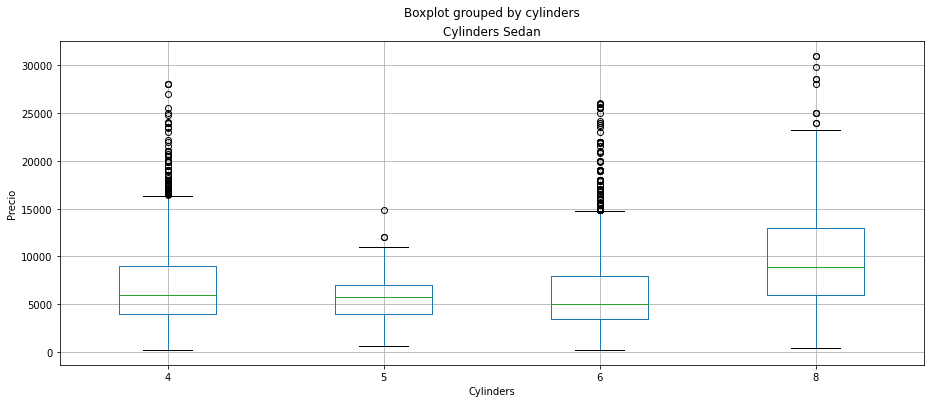

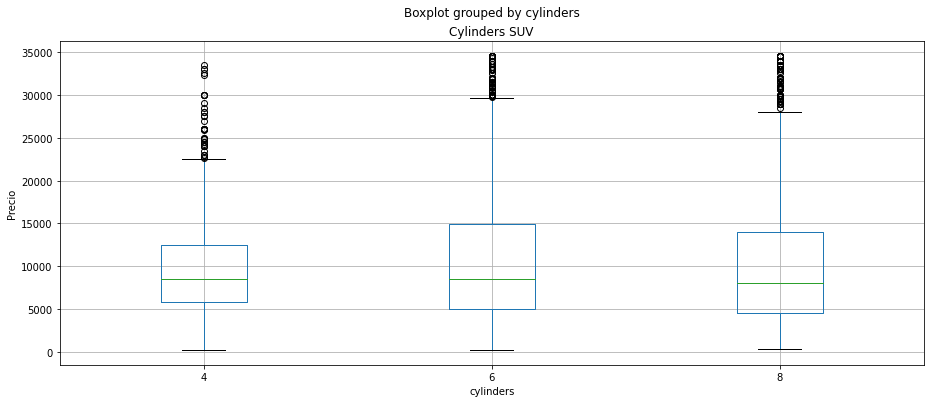

In [ ]:
cylinders_counted_sedan = fifty_plus_ads('sedan', 'cylinders')
cylinders_counted_suv = fifty_plus_ads('suv', 'cylinders')
cylinders_good_sedan = vehicles_prices_good.query('type == "sedan" and cylinders in @cylinders_counted_sedan.index')
cylinders_good_suv = vehicles_prices_good.query('type == "suv" and cylinders in @cylinders_counted_suv.index')
cylinders_good_sedan.boxplot(column='price', by='cylinders', figsize=(15, 6))
plt.title('Cylinders Sedan')
plt.xlabel('Cylinders')
plt.ylabel('Precio')
plt.show()
cylinders_good_suv.boxplot(column='price', by='cylinders', figsize=(15, 6))
plt.title('Cylinders SUV')
plt.xlabel('cylinders')
plt.ylabel('Precio')
plt.show()

Para los vehiculos Sedan los vehiculos más caros tienden a ser de 8 cilindros, mientras que para los SUV la cilindrada más cara son los de 6 cilindros.

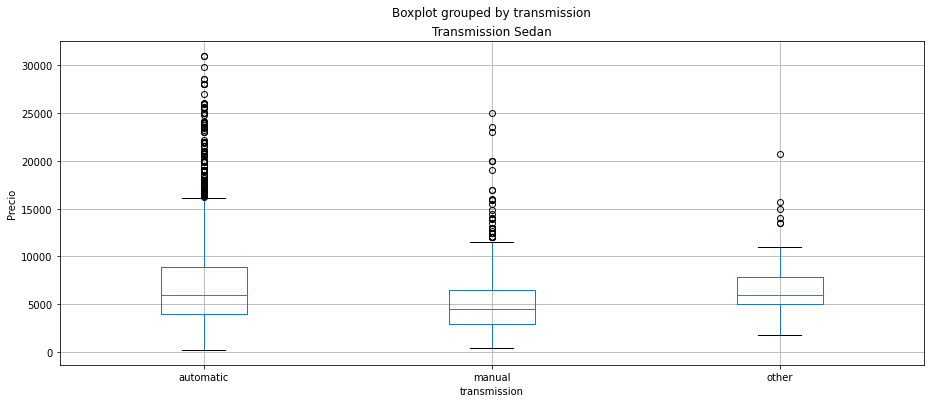

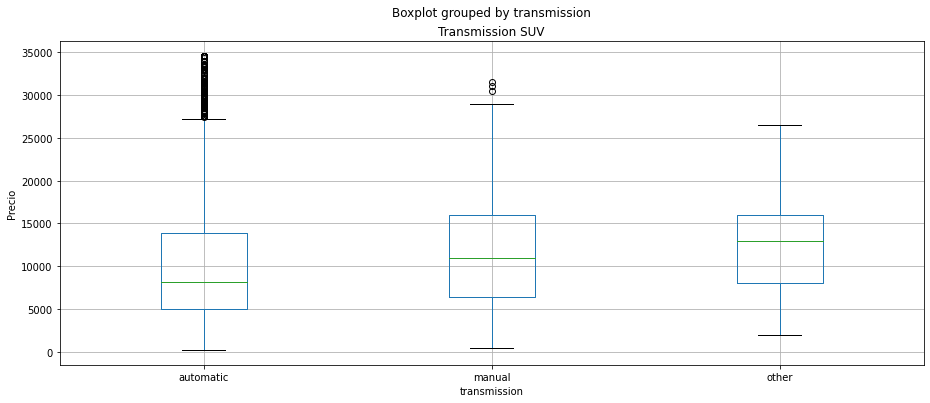

In [ ]:
transmission_counted_sedan = fifty_plus_ads('sedan', 'transmission')
transmission_counted_suv = fifty_plus_ads('suv', 'transmission')
transmission_good_sedan = vehicles_prices_good.query('type == "sedan" and transmission in @transmission_counted_sedan.index')
transmission_good_suv = vehicles_prices_good.query('type == "suv" and transmission in @transmission_counted_suv.index')
transmission_good_sedan.boxplot(column='price', by='transmission', figsize=(15, 6))
plt.title('Transmission Sedan')
plt.xlabel('transmission')
plt.ylabel('Precio')
plt.show()
transmission_good_suv.boxplot(column='price', by='transmission', figsize=(15, 6))
plt.title('Transmission SUV')
plt.xlabel('transmission')
plt.ylabel('Precio')
plt.show()

Podemos notar que para los vehiculos Sedan la preferencia es por transmision automatica, en cambio para los SUV para los manuales. Un dato no menor, es que la columna other, para los SUV, tiene su precio del tope superior casí a la misma altura que el valor de transmisión manual.

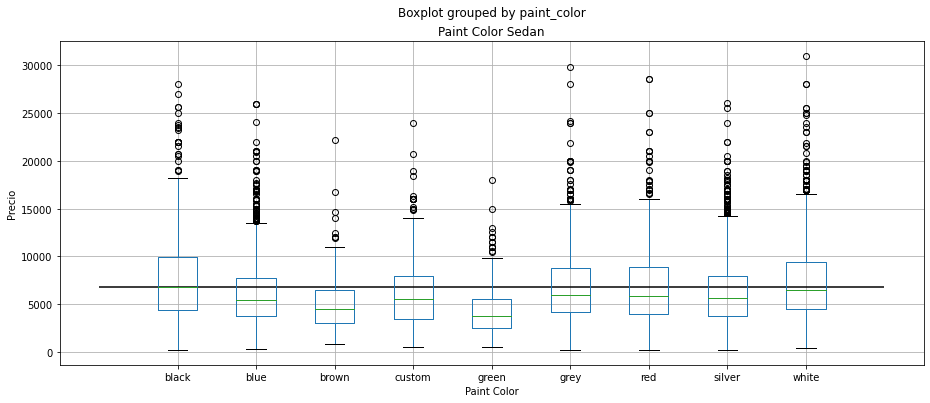

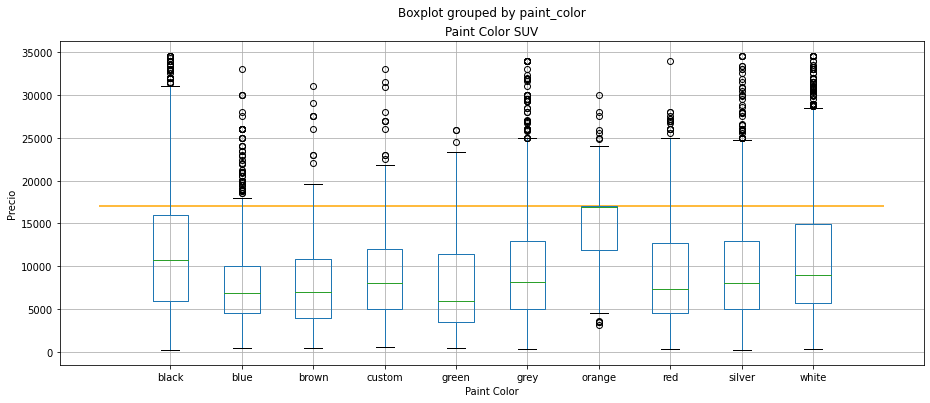

In [ ]:
paint_color_counted_sedan = fifty_plus_ads('sedan', 'paint_color')
paint_color_counted_suv = fifty_plus_ads('suv', 'paint_color')
paint_color_good_sedan = vehicles_prices_good.query('type == "sedan" and paint_color in @paint_color_counted_sedan.index')
paint_color_good_suv = vehicles_prices_good.query('type == "suv" and paint_color in @paint_color_counted_suv.index')
paint_color_good_sedan.boxplot(column='price', by='paint_color', figsize=(15, 6))
plt.title('Paint Color Sedan')
plt.hlines(y=[6800], xmin=0, xmax=10, color='black')
plt.xlabel('Paint Color')
plt.ylabel('Precio')
plt.show()
paint_color_good_suv.boxplot(column='price', by='paint_color', figsize=(15, 6))
plt.title('Paint Color SUV')
plt.hlines(y=[17000], xmin=0, xmax=11, color='orange')
plt.xlabel('Paint Color')
plt.ylabel('Precio')
plt.show()

En terminos de colores. Para los vehiculos del tipo Sedan la mediana más alta para los vehiculos negros, seguida muy de cerca por los blancos. El color con anuncios de mayor precio en promedio es el negro para los Sedan.
En cambio, para los vehiculos del tipo SUV, la mediana más alta corresponde al color naranja, seguido por el negro. El precio más caro corresponde en promedio a los SUV naranjas.

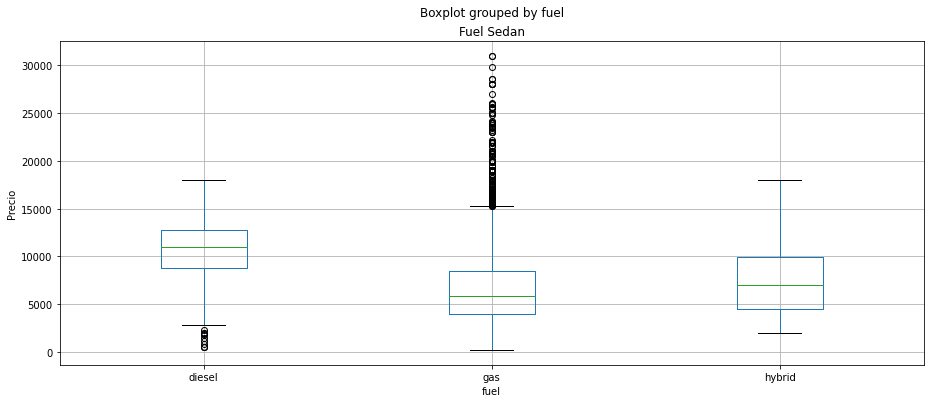

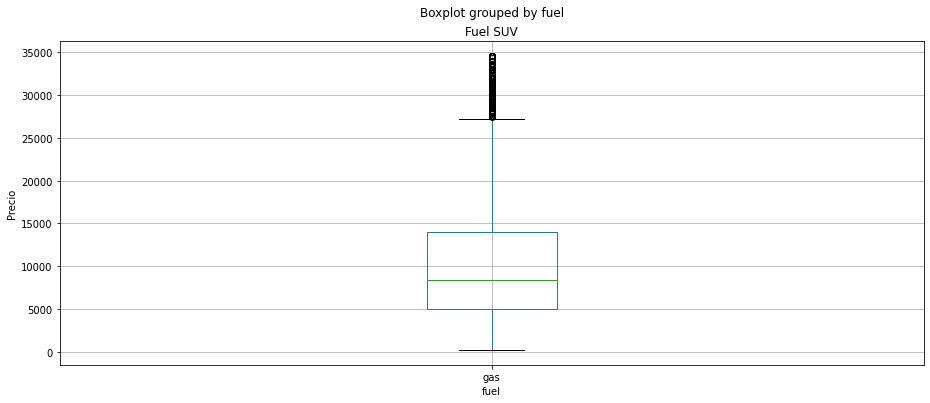

In [ ]:
fuel_counted_sedan = fifty_plus_ads('sedan' , 'fuel')
fuel_counted_suv = fifty_plus_ads('suv' , 'fuel')
fuel_good_sedan = vehicles_prices_good.query('type == "sedan" and fuel in @fuel_counted_sedan.index')
fuel_good_suv = vehicles_prices_good.query('type == "suv" and fuel in @fuel_counted_suv.index')
fuel_good_sedan.boxplot(column='price', by='fuel', figsize=(15, 6))
plt.title('Fuel Sedan')
plt.xlabel('fuel')
plt.ylabel('Precio')
plt.show()
fuel_good_suv.boxplot(column='price', by='fuel', figsize=(15, 6))
plt.title('Fuel SUV')
plt.xlabel('fuel')
plt.ylabel('Precio')
plt.show()

Para los vehiculos del tipo Sedan los vehiculos diesel son los más caros, algo interesante es la entrada fuerte de los vehiculos hybridos que sobrepasaron a los de gas. Pero, para los vehiculos SUV solo encontramos vehiculos a gas.

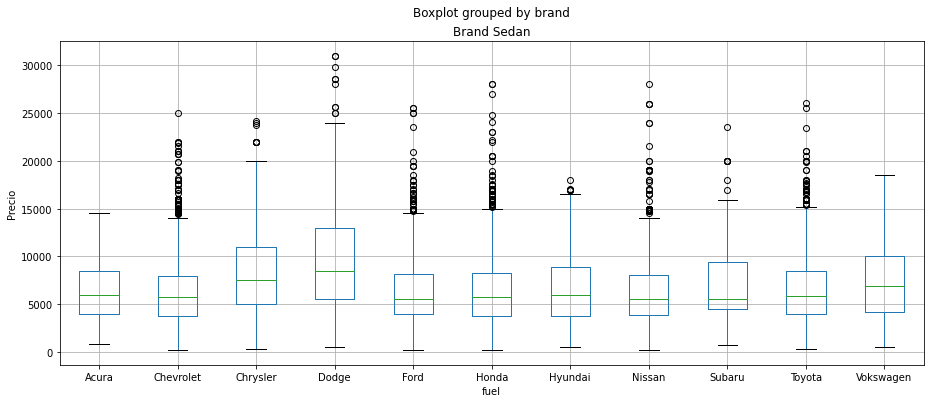

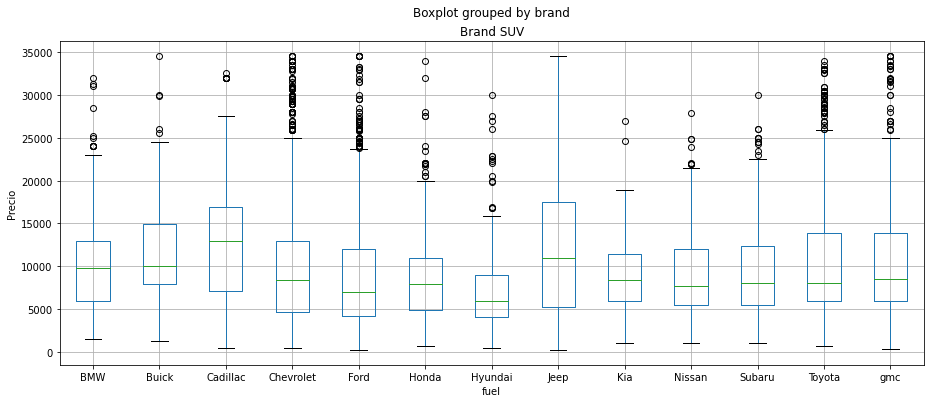

In [ ]:
brand_counted_sedan = fifty_plus_ads('sedan', 'brand')
brand_counted_suv = fifty_plus_ads('suv', 'brand')
brand_good_sedan = vehicles_prices_good.query('type == "sedan" and brand in @brand_counted_sedan.index')
brand_good_suv = vehicles_prices_good.query('type == "suv" and brand in @brand_counted_suv.index')
brand_good_sedan.boxplot(column='price', by='brand', figsize=(15, 6))
plt.title('Brand Sedan')
plt.xlabel('fuel')
plt.ylabel('Precio')
plt.show()
brand_good_suv.boxplot(column='price', by='brand', figsize=(15, 6))
plt.title('Brand SUV')
plt.xlabel('fuel')
plt.ylabel('Precio')
plt.show()

En cuanto a la marca que se vende más caro. Para los vehiculos del tipo Sedan, la marca que en promedio se vende más caro es Dodge. Con respecto a los SUV, la mediana más alta es para los Cadillac, pero el valor promedio más alto para los jeep.

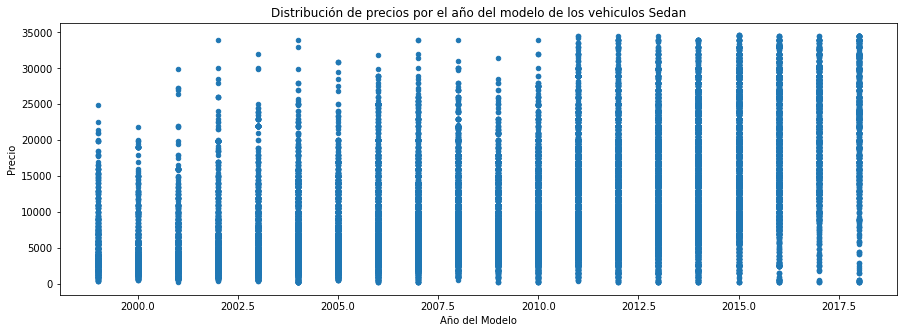

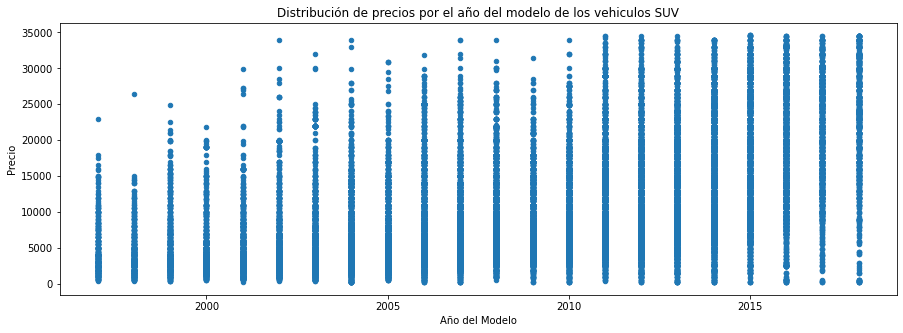

In [ ]:
model_year_counted_sedan = fifty_plus_ads('sedan', 'model_year')
model_year_counted_suv = fifty_plus_ads('suv', 'model_year')
model_year_good_sedan = vehicles_prices_good.query('model_year in @model_year_counted_sedan.index')
model_year_good_suv = vehicles_prices_good.query('model_year in @model_year_counted_suv.index')
model_year_good_sedan.plot(x='model_year' , y='price' , kind='scatter', title='Distribución de precios por el año del modelo de los vehiculos Sedan', figsize=(15, 5))
plt.xlabel('Año del Modelo')
plt.ylabel('Precio')
plt.show()
model_year_good_suv.plot(x='model_year' , y='price' , kind='scatter', title='Distribución de precios por el año del modelo de los vehiculos SUV', figsize=(15, 5))
plt.xlabel('Año del Modelo')
plt.ylabel('Precio')
plt.show()

Finalmente, los modelos más nuevos se venden más caros que los más antiguos. En el caso de los vehiculos Sedan a partir del año 2010 comienzan a devaluarse. El rango más normal es entre 1999 y el 2018. En cambio, en los vehiculos SUV, los vehiculos se devaluan a partir del 2010 también. Al parecer los precios de los sedan bajan más gradualmente que los de los SUV, pero los SUV tienen un rango más grande entre 1997 y 2018.

In [ ]:
#vehicles_prices_good_v2 corresponde a la base de datos bueno guardando solo las siguientes columnas:
# 'price', 'model_year', 'cylinders', 'condition_id', 'car_years', 'odometer', 'miles_per_year'
vehicles_prices_good_v2 = vehicles_prices_good.loc[:,['price', 'model_year','cylinders', 'condition_id', 'car_years', 'odometer', 'miles_per_year']]

In [ ]:
vehicles_prices_good_v2.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,price,model_year,cylinders,condition_id,car_years,odometer,miles_per_year
price,1.00,0.55,0.35,0.21,-0.55,-0.45,0.26
model_year,0.55,1.00,-0.18,0.29,-1.00,-0.57,0.57
cylinders,0.35,-0.18,1.00,-0.09,0.18,0.14,-0.06
condition_id,0.21,0.29,-0.09,1.00,-0.28,-0.31,0.06
car_years,-0.55,-1.00,0.18,-0.28,1.00,0.56,-0.57
odometer,-0.45,-0.57,0.14,-0.31,0.56,1.00,0.17
miles_per_year,0.26,0.57,-0.06,0.06,-0.57,0.17,1.00


Viendo nuestra tabla de correlación, podemos notar que lo que más afecta de manera positiva al precio de un vehiculo, es el año del modelo con una correlación de 0.55. Una correlación de 0.55 implica una conección leve (podría se más fuerte), pero quiere decir que si el año del modelo es más nuevo el precio aumenta. Mientrás que los años del mismo lo afectan casi de la misma manera pero negativamente (correlación de -0.55), mientras más viejo el vehiculo más barato se vende. La cilindrada afecta positivamente al precio del vehiculo con una correlación de 0.35, mientras que la condición del vehiculo casi no afecta en nada al precio con una correlación de 0.21 positiva. El millaje promedio por año, afecta un poco más con una correlación de 0.26. Para la cilindrada y el millaje promedio por año, a mayor valor mayor precio (pero nuevamente, estas conecciones son muy debiles). En cuanto a la columna de odometer (millaje total) afecta negativamente al precio con una correlación de -0.45.

## Conclusión general:<a id='conclution'></a>

Recibimos una DataFrame con 13 columnas y 51525 líneas. La tabla tenía las siguientes columnas con datos ausentes, marcaré entre parentesis el porcentaje de valores ausentes con respecto a la columna completa: 'model_year' (7%), 'cylinders' (10%), 'odometer' (15%), 'paint_color' (17%) y 'is_4wd' (50%). Dividimos la tabla en columnas con valores ausentes (ya mencionados), columnas del tipo object  'model', 'condition', 'fuel', 'transmision' y 'type' y columnas de fechas que deberian haber sido del tipo DateTime.

1. Primeros pasos: Limpieza de la base de datos

Lo primero que realizamos fue revisar las columnas del tipo object corrigiendo ortografía o mejorando los nombres de los valores para que sean más sencillos de leer. También corregimos los valores duplicados obvios de la 'columna model'.
Luego tratamos los valores ausentes, concentrandonos primero en la columna 'is_4wd' (que tenía el mayor número de valores ausentes), esta columna por definición es del tipo booleana. Concluimos que los valores ausentes en realidad correspondían al valor 0. Luego revisamos la columna 'odometer', en este caso, primero reemplazamos los valores ausentes en base al año del modelo, y luego en base a la condición del vehículo.

Para la columna 'model_year', concluimos que el kilometraje era uno de los factores más preponderante, por lo que decidimos crear una tabla agrupando los kilometrajes de acuerdo a los valores más relevantes de la columna odometer en base a los años del modelo del vehiculo. Con nuestra nueva columna 'odometer_grouped' creamos una fórmula para encontrar el año que más aparecía de acuerdo a cada grupo de kilometraje y rellenamos nuestros valores ausentes con ese dato. Cabe destacar que con esta fórmula nos quedó solo un vehiculo (Chrysler 200 de 139.000km) al que no le encontramos un año con este método. Para ese caso, buscamos el año que más se repetía para el modelo. Revisamos despúes los valores ausentes de la columna 'cylinders', en este caso comprobamos que el tipo del vehiculo y el modelo del mismo eran los más relevantes para encontrar las cilindradas faltantes. Para esta columna, nos quedaron 15 (0,03% del total de valores) valores ausentes que no respondían a la formula creada. Para completar estos 15 valores utilizamos solo el tipo de vehiculo. Finalmente revisamos la columna 'paint_color', para esta columna utilizamos el color más relevante para el año del modelo, el modelo y el tipo de vehiculo con el fin de rellenar los valores ausentes. De los 9.267 valores ausentes que teniamos, logramos rellenar la mayoría con este método dejando solo 210 valores sin completar. El resto de los valores los completamos utilizando el tipo de vehiculo y el modelo, y solo 18 valores (0.04% del total) se rellenaron utilizando solo el tipo.

2. Corrección de los tipos de datos y enriquecimiento de la DataFrame:

Con nuestra base de datos sin valores ausentes, nos enfocamos en corregir el tipo de datos de las columnas 'cylinders' y 'odometer' que pasaron de float in64 (números con decimales) a int64 (números enteros) para simplificar su lectura en general. Por otro, lado se cambió el tipo de la columna 'date_posted' de object a DateTime, para poder manipular las fechas de mejor forma.

Al transformar la columna 'date_posted' a DateTime, esto nos permitió sacar más información de esa columna. Obtuvimos entonces una columna para los días de la semana, meses y el año en que el aviso fue subido a la plataforma. Con el año en que el anuncio fue ingresado y el año del modelo, pudimos encontrar cuantos años tiene cada vehículo. Finalmente, con los años del vehiculo y los valores de la columna 'odometer' pudimos encontrar el millaje promedio anual para cada vehiculo.
Para mejor lectura, creamos diccionarios que traducen de código a glosa o vice versa las columnas 'condition', 'weekday_id' y 'months_id'. Una última columna que agregamos fue la de marcas ('brand'), que reune los distintos modelos por su marca. Luego reordenamos las columnas para que hagan más sentidos al momento de leer la tabla. 

Habiendo realizado todo esto, la base de datos revisada pasó de 13 columnas a 23 columnas con sus tipos de datos correctos y sin valores ausentes.

3. Revisión de la nueva base de datos:

Nos encontramos entonces con un universo de 51.525 anuncios, la cantidad de marcas en la base de datos son 19. Estás marcas se dividen en 95 modelos distintos en total. Pudimos comprobar que los anuncios se ingresaron en el periodo de un año (más, menos algunos días). Esto se traduce a una cantida de anuncios promedio por marca de 2.711, o un promedio de 542 anuncios por modelo de vehiculo. Con estos datos en mente, hicimos una revisión por distintas columnas y como relacionan una con otras encontrando los siguientes puntos interesantes:
- Revisando la columna 'brand' nos dimos cuenta que la distribución por marca es muy dispareja, tenemos marcas como Ford y Chevrolet con más de 12.000 y 10.000 anuncios respectivamente, y luego otras como Acura o Mercedes-Benz que están muy por lo bajo, hablamos de menos de 300 anuncios.
- Nos enfocamos en la columna 'model', que muestra una distribución más parecida a lo que esperabamos con muchos modelos en el rango de los 540. Sin embargo notamos que algunos modelos duplican y otros sobrepasan con creces estos números. Por ejemplo, la Ram 1500 que consta con más de 1500 anuncios, el Chevrolet Silverado 1500 que tiene más de 2.000 y el ford f-150 que tiene más de 3.000 anuncios o sea un 556% más que la media! Cuando revisamos la distribución media de los precios en base a los modelos, nos encontramos con un pico de 35.000 que corresponde a un Mercedes-Benz sin embargo notamos que hay una media del orden de los 10.000. Probamos, revisando el mismo gráfico pero en vez de la media, con la mediana (para evitar los valores extremos) y no se notaron muchas variaciones, algunos modelos cambiaron ligeramente, por ejemplo el Ford Mustang GT Coupee 2d que pasó de ser el cuarto más caro al tercero. O el Ford Taurus que paso de ser el penultimo más barato al más barato. Notamos entonces que los precios en general rondaban los 5.000 y 10.000, pero que existían valores bastante elevados. Para revisar si estos efectivamente corresponden a excepciones, revisamos un histograma de los precios en base a modelos, con lo que pudimos comprobar que efectivamente los valores por sobre 18.000 se pueden considerar excepcionales.
- Luego revisamos la tabla en base al tipo de vehiculo. Notamos que los precios más bajos correspondían al modelo Sedan y Hatchback (en el orden de los 6.000) esto hace sentido ya que por ejemplo el Ford F-150 (recordemos el modelo con más anuncios) es del tipo Sedan. Por otro lado, los valores más altos aparecen para los camiones (truck) y los pickup. En el caso de los tipos, notamos una distribución pareja con dos picos que podrían ser excepciones (los camiones por ejemplo). 
- Luego nos enfocamos en la columna 'car_years', en ella notamos nuevamente picos por sobre los 20.000 en los años de vehiculos más viejos (69, 58, 49, 55 y 60) esto nos indicó que quizás los precios excesivos corresponden efectivamente a valores excepcionales que podrían ser vehiculos vintage por ejemplo. Un tema, que se notó es que los precios para vehiculos con 0 años (en teoría nuevos) están por sobre la media en los 20.000. Esto tiene sentido, tomando en consideración que los vehiculos se deprecian rápido.
- Con respecto a la columna de millas por año, notamos que a partir de los 25.000 son todos casos excepcionales. 
- Con respecto a la columna de cilindrada, notamos que elpico se produce en los 12 cilindros, pero el resto de valores es bastante parejo. Los 12 cilindros podrían ser los camiones que vimos en la columna de tipo. 
- Con la condición del vehiculo, notamos algo similar, a partir nuestro histograma se concentra en los precios entre los 2.500 y los 22.500.

4. Revisión y tratar valores atípicos:

Con la información obtenida, decidimos centrarnos en la columna 'price', revisando un diagrama de cajas pudimos comprobar que hay valores muy excepcionales. Cuando quitamos los valores atípicos de la columna 'price' nos encontramos con gráficos mucho más normales. Con todos las revisiones realizadas, concluimos que se podían eliminar todos los valores por sobre 35.000 sin afectar los datos medios. Este ajusto considera quitar el 3% de datos excepcionales por lo alto. 

También revisamos los valores excepcionalmente bajos, y nos dimos cuenta que todos los valores menores a 200, también podían ser considerados como excepciones que se podían sacar. Estos valores corresponden a solo el 1.7% del total, y no afectan en nada nuestro estudio.

Revisamos el millaje anual y decidimos filtrar todos los valores superiores a 40040. Con respecto a la edad del vehiculo, nos dimos cuenta que todos los valores por sobre los 24 años no eran necesarios. La cilindrada la dejamos tal cúal y finalmente en relación a la condición del vehiculo, cortamos todos los valores por debajo de 2.5

Al comparar nuestra base original con la nueva base de datos, concluimos que esta última tenía valores mucho más acotados y cercanos a la realidad. Se emparejaron nuestro gráficos de columnas especificas, haciendolos más suaves y moderados, permitiendonos proseguir con nuestro estudio.

5. Conclusiones:

Lo primero que podemos concluir de nuestra nueva base de datos es que lo más normal es que un vehiculo se venda a los 33 días. Los que se venden más rápido normalmente se venden el séptimo día, y los que se venden más lento en general no pasan de los 100 días.

Desde el punto de vista estetico los vehiculos que se venden más son los del tipo Sedan y los SUV. 
- El precio medio por el que se vende un sedan es de: 7063 y el precio medio por el que se vende un SUV es de: 10600. Descubrimos que los vehiculos SUV en general se venden más caro y se deprecian menos con el tiempo. 
- En terminos de colores. Para los vehiculos del tipo Sedan la mediana más alta para los vehiculos negros, seguida muy de cerca por los blancos. El color con anuncios de mayor precio en promedio es el negro para los Sedan. En cambio, para los vehiculos del tipo SUV, la mediana más alta corresponde al color naranja, seguido por el negro. El precio más caro corresponde en promedio a los SUV naranjas. ¿Podría ser que los SUV vayan a un público más joven que los Sedan? Esto es algo que se podría investigar más adelante con más datos. 
- Notamos que entre 0 y 8 años los vehiculos se venden más caros. Despúes, a medidad que van envejeciendo se vuelven cada vez más baratos.Se puede ver también que los vehiculos SUV tienden a durar un par de años más en el mercado. 
- Para los dos tipos de vehiculos, en cuanto a su condición, notamos que no se venden normalmente vehiculos en salvataje ni nuevos, ambos extremos desaparecieron de nuestros gráficos. Luego la condición sigue un orden ascendente normal. Siendo los más caros los vehiculos como nuevos.


Desde el punto de vista técnico: 
- Con las millas recorridas, es interesante ver que si bien se venden vehiculos cero kilometros (normalmente para el tipo Sedan), en general, una vez comprado un vehiculo este no se vuelve a vender hasta pasado las 10.000 millas. La gran mayoría de los vehiculos se venden en el rango de los 10.000 y 20.000 millas. Siendo lo más normal que ambos tipos se vendan más caro entre los 17.000 y los 21.000.
- Podemos notar que para los vehiculos Sedan la preferencia es por transmision automatica, en cambio para los SUV para los manuales. Un dato no menor, es que la columna other, para los SUV, tiene su precio del tope superior casí a la misma altura que el valor de transmisión manual.
- Para los vehiculos Sedan los vehiculos más caros tienden a ser de 8 cilindros, mientras que para los SUV la cilindrada más cara son los de 6 cilindros. 
- Para los vehiculos del tipo Sedan los vehiculos diesel son los más caros, algo interesante es la entrada fuerte de los vehiculos hybridos que sobrepasaron a los de gas. Pero, para los vehiculos SUV solo encontramos vehiculos a gas. 

Finalmente, cuanto a la marca que se vende más caro. Para los vehiculos del tipo Sedan, la marca que en promedio se vende más caro es Dodge. Con respecto a los SUV, la mediana más alta es para los Cadillac, pero el valor promedio más alto para los jeep. Y, los modelos más nuevos se venden más caros que los más antiguos. En el caso de los vehiculos Sedan a partir del año 2010 comienzan a devaluarse. El rango más normal es entre 1999 y el 2018. En cambio, en los vehiculos SUV, los vehiculos se devaluan a partir del 2010 también. Al parecer los precios de los sedan bajan más gradualmente que los de los SUV, pero los SUV tienen un rango más grande entre 1997 y 2018.

Viendo nuestra tabla de correlación, podemos notar que lo que más afecta de manera positiva al precio de un vehiculo, es el año del modelo con una correlación de 0.55. Una correlación de 0.55 implica una conección leve (podría se más fuerte), pero quiere decir que si el año del modelo es más nuevo el precio aumenta. Mientrás que los años del mismo lo afectan casi de la misma manera pero negativamente (correlación de -0.55), mientras más viejo el vehiculo más barato se vende. La cilindrada afecta positivamente al precio del vehiculo con una correlación de 0.35, mientras que la condición del vehiculo casi no afecta en nada al precio con una correlación de 0.21 positiva. El millaje promedio por año, afecta un poco más con una correlación de 0.26. Para la cilindrada y el millaje promedio por año, a mayor valor mayor precio (pero nuevamente, estas conecciones son muy debiles). En cuanto a la columna de odometer (millaje total) afecta negativamente al precio con una correlación de -0.45, esto quiere decir que a mayor kilometraje total menor es el precio.